<a href="https://colab.research.google.com/github/AmanMinhas/Eth-Price-Prediction-Time-Series/blob/main/eth_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import ETH CSV Data from Google Drive

In [415]:
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
import sys

drive.mount('/content/gdrive')
base_dir_path = "gdrive/My Drive/UpGrad/LJMU_ETH"
sys.path.insert(0, base_dir_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [416]:
# import libraties
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [417]:
# Create ratings dataframe from csv
eth_history_df = pd.read_csv(f"{base_dir_path}/ETH-USD-2017-to-2022.csv")
eth_history_df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1  2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2  2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3  2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4  2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  
0   893249984  
1   885985984  
2   842300992  
3  1613479936  
4  1041889984

In [418]:
eth_history_df.shape

(1656, 7)

## EDA

In [419]:
# Check null values
eth_history_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [420]:
eth_history_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [421]:
eth_history_df['Date']= pd.to_datetime(eth_history_df['Date'])

In [422]:
eth_history_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [423]:
eth_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1656 non-null   datetime64[ns]
 1   Open       1656 non-null   float64       
 2   High       1656 non-null   float64       
 3   Low        1656 non-null   float64       
 4   Close      1656 non-null   float64       
 5   Adj Close  1656 non-null   float64       
 6   Volume     1656 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 90.7 KB


In [424]:
eth_history_df.head(5)

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  
0   893249984  
1   885985984  
2   842300992  
3  1613479936  
4  1041889984

In [425]:
print(min(eth_history_df.Date))
print(max(eth_history_df.Date))

2017-11-09 00:00:00
2022-05-22 00:00:00


In [426]:
max(eth_history_df.Date) - min(eth_history_df.Date)

Timedelta('1655 days 00:00:00')

In [427]:
eth_history_df["Volume_in_mil"] = eth_history_df.Volume/1000000
eth_history_df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  Volume_in_mil  
0   893249984     893.249984  
1   885985984     885.985984  
2   842300992     842.300992  
3  1613479936    1613.479936  
4  1041889984    1041.889984

In [428]:
eth_history_df.describe()

Open         High          Low        Close    Adj Close  \
count  1656.000000  1656.000000  1656.000000  1656.000000  1656.000000   
mean   1089.564423  1125.743039  1048.515601  1090.346649  1090.346649   
std    1257.446529  1296.179233  1212.577886  1256.993990  1256.993990   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     198.959374   204.750748   194.701446   199.109505   199.109505   
50%     401.863403   416.879440   390.609222   403.069519   403.069519   
75%    1894.838776  1970.725159  1811.366547  1901.912811  1901.912811   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  Volume_in_mil  
count  1.656000e+03    1656.000000  
mean   1.265775e+10   12657.748528  
std    1.116089e+10   11160.885794  
min    6.217330e+08     621.732992  
25%    3.394947e+09    3394.947292  
50%    9.917412e+09    9917.412067  
75%    1.802079e+10   18020.789932  
max    8.448291e+10   84482.912776

In [429]:
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  
0      320.884003    893249984     893.249984  
1      299.252991    885985984     885.985984  
2      314.681000    842300992     842.300992  
3      307.907990   1613479936    1613.479936  
4      316.716003   1041889984    1041.889984  
...           ...          ...            ...  
1646  2014.418213  24816096567   24816.096567  
1647  2056.273926  15457044616   15457.044616  
1648  2145.706787  14846088335   14846.088335  
1649  2022.725952  21459552191   21459.552191  
1650  2090.409180  18509929297   18509.929297  

[1651 rows x 8 columns]

In [430]:
eth_history_df = eth_history_df.sort_values(by="Date")
eth_history_df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  Volume_in_mil  
0   893249984     893.249984  
1   885985984     885.985984  
2   842300992     842.300992  
3  1613479936    1613.479936  
4  1041889984    1041.889984

In [431]:
eth_history_df.describe()

Open         High          Low        Close    Adj Close  \
count  1656.000000  1656.000000  1656.000000  1656.000000  1656.000000   
mean   1089.564423  1125.743039  1048.515601  1090.346649  1090.346649   
std    1257.446529  1296.179233  1212.577886  1256.993990  1256.993990   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     198.959374   204.750748   194.701446   199.109505   199.109505   
50%     401.863403   416.879440   390.609222   403.069519   403.069519   
75%    1894.838776  1970.725159  1811.366547  1901.912811  1901.912811   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  Volume_in_mil  
count  1.656000e+03    1656.000000  
mean   1.265775e+10   12657.748528  
std    1.116089e+10   11160.885794  
min    6.217330e+08     621.732992  
25%    3.394947e+09    3394.947292  
50%    9.917412e+09    9917.412067  
75%    1.802079e+10   18020.789932  
max    8.448291e+10   84482.912776

In [432]:
# Minimum close price
eth_history_df[eth_history_df.Close == eth_history_df.Close.min()]

Date       Open       High        Low      Close  Adj Close  \
400 2018-12-14  86.630356  87.144943  83.226479  84.308296  84.308296   

         Volume  Volume_in_mil  
400  1651491877    1651.491877

In [433]:
# Maximum close price
eth_history_df[eth_history_df.Close == eth_history_df.Close.max()]

Date         Open         High          Low        Close  \
1460 2021-11-08  4619.649414  4822.363281  4619.649414  4812.087402   

        Adj Close       Volume  Volume_in_mil  
1460  4812.087402  19290896267   19290.896267

In [434]:
# Minimum trade volume
eth_history_df[eth_history_df.Volume_in_mil == eth_history_df.Volume_in_mil.min()]

Date        Open        High        Low       Close   Adj Close  \
8 2017-11-17  330.166992  334.963989  327.52301  332.394012  332.394012   

      Volume  Volume_in_mil  
8  621732992     621.732992

In [435]:
# Maximum trade volume
eth_history_df[eth_history_df.Volume_in_mil == eth_history_df.Volume_in_mil.max()]

Date         Open         High          Low        Close  \
1287 2021-05-19  3382.657227  3437.935791  1952.460205  2460.679199   

        Adj Close       Volume  Volume_in_mil  
1287  2460.679199  84482912776   84482.912776

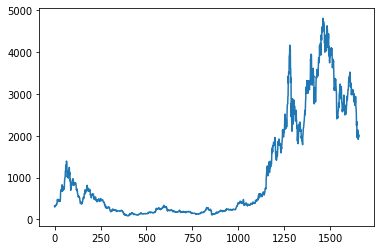

In [436]:
plt.plot(eth_history_df.Close)

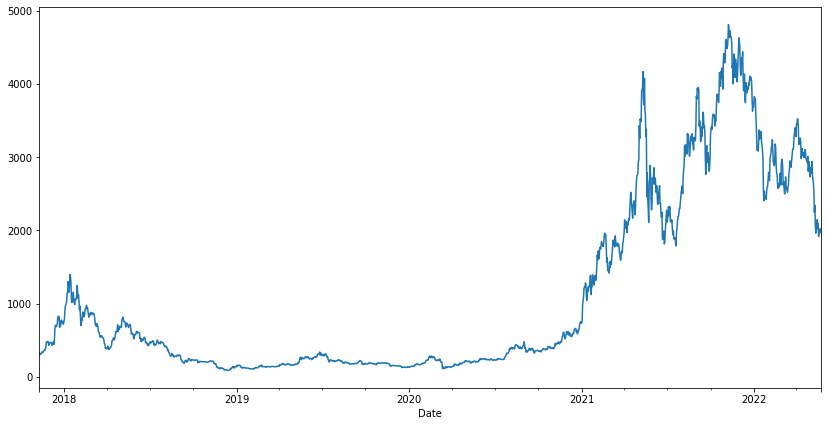

In [437]:
eth_history_date_index_df = eth_history_df.copy()
eth_history_date_index_df = eth_history_date_index_df.set_index('Date')
eth_history_date_index_df.Close.plot(figsize=(14,7))

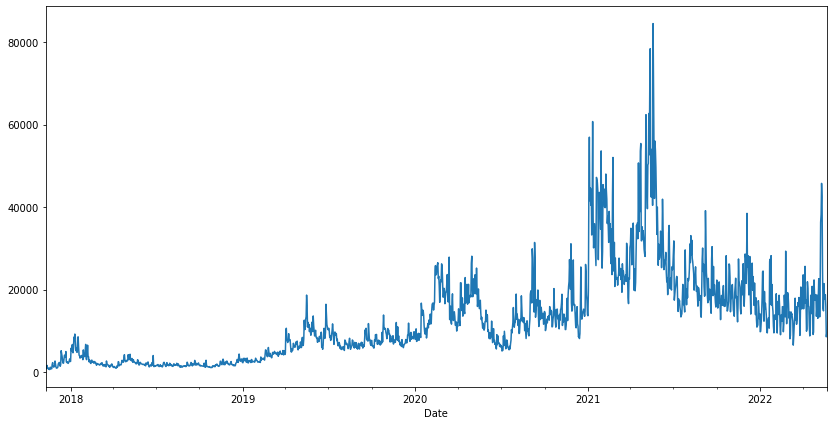

In [438]:
eth_history_date_index_df.Volume_in_mil.plot(figsize=(14,7))

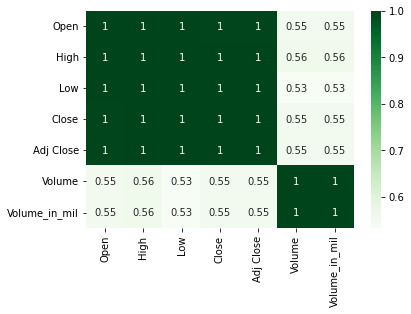

In [439]:
sns.heatmap(eth_history_date_index_df.corr(), annot=True, cmap="Greens")
plt.show()

In [440]:
eth_history_df.Close

0        320.884003
1        299.252991
2        314.681000
3        307.907990
4        316.716003
           ...     
1651    1916.656128
1652    2018.336182
1653    1961.315674
1654    1974.518311
1655    2017.376343
Name: Close, Length: 1656, dtype: float64

In [441]:
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  
0      320.884003    893249984     893.249984  
1      299.252991    885985984     885.985984  
2      314.681000    842300992     842.300992  
3      307.907990   1613479936    1613.479936  
4      316.716003   1041889984    1041.889984  
...           ...          ...            ...  
1646  2014.418213  24816096567   24816.096567  
1647  2056.273926  15457044616   15457.044616  
1648  2145.706787  14846088335   14846.088335  
1649  2022.725952  21459552191   21459.552191  
1650  2090.409180  18509929297   18509.929297  

[1651 rows x 8 columns]

In [442]:
# Calculate deltaClose and deltaPctClose
eth_history_df['deltaClose'] = eth_history_df['Close'].diff()
eth_history_df['deltaPctClose'] = eth_history_df['Close'].pct_change()
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  deltaClose  deltaPctClose  
0      320.884003    893249984     893.249984         NaN            NaN  
1      299.252991    885985984     885.985984  -21.631012      -0.067411  
2      314.681000    842300992     842.300992   15.428009       0.051555  
3      307.907990   1613479936    1613.479936   -6.773010      -0.021523  
4      316.716003   1041889984    1041.889984    8.808013       0.028606  
...           ...          ...            ...         ...            ...  
1646  2014.418213  24816096567   24816.096567   52.716675       0.026873  
1647  2056.273926  15457044616   15457.044616   41.855713       0.020778  
1648  2145.706787  14846088335   14846.088335   89.432861       0.043493  
1649  2022.725952  21459552191   21459.552191 -122.980835      -0.057315  
1650  2090.409180  18509929297   18509.929297   67.683228       0.033461  

[1651 rows x 10 columns]

In [443]:
eth_history_df.shape

(1656, 10)

In [444]:
# Drop first row where deltaClose is NaN
eth_history_df = eth_history_df.iloc[1:, :]
eth_history_df.shape

(1655, 10)

In [445]:
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
5    2017-11-14   316.763000   340.177002   316.763000   337.631012   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  deltaClose  deltaPctClose  
1      299.252991    885985984     885.985984  -21.631012      -0.067411  
2      314.681000    842300992     842.300992   15.428009       0.051555  
3      307.907990   1613479936    1613.479936   -6.773010      -0.021523  
4      316.716003   1041889984    1041.889984    8.808013       0.028606  
5      337.631012   1069680000    1069.680000   20.915009       0.066037  
...           ...          ...            ...         ...            ...  
1646  2014.418213  24816096567   24816.096567   52.716675       0.026873  
1647  2056.273926  15457044616   15457.044616   41.855713       0.020778  
1648  2145.706787  14846088335   14846.088335   89.432861       0.043493  
1649  2022.725952  21459552191   21459.552191 -122.980835      -0.057315  
1650  2090.409180  18509929297   18509.929297   67.683228       0.033461  

[1650 rows x 10 columns]

In [446]:
def print_col_min_max(df, col):
  display(df[(df[col] == df[col].max()) | (df[col] == df[col].min())])

print_col_min_max(eth_history_df, 'deltaClose')
print_col_min_max(eth_history_df, 'deltaPctClose')

Date         Open         High          Low        Close  \
1287 2021-05-19  3382.657227  3437.935791  1952.460205  2460.679199   
1292 2021-05-24  2099.936035  2672.595703  2090.639648  2643.591064   

        Adj Close       Volume  Volume_in_mil  deltaClose  deltaPctClose  
1287  2460.679199  84482912776   84482.912776 -919.390869      -0.272003  
1292  2643.591064  53697121740   53697.121740  534.011230       0.253136

Date        Open        High         Low       Close   Adj Close  \
33  2017-12-12  522.286011  657.317993  504.493988  651.431030  651.431030   
854 2020-03-12  194.738922  195.147934  111.210709  112.347122  112.347122   

          Volume  Volume_in_mil  deltaClose  deltaPctClose  
33    5179829760    5179.829760  136.295044       0.264581  
854  22134741655   22134.741655  -82.521408      -0.423472

In [447]:
eth_history_df.loc['2020-03-10':'2020-03-15']

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Volume_in_mil, deltaClose, deltaPctClose]
Index: []

In [448]:
eth_history_df.loc['2017-12-10':'2017-12-15']
# eth_history_df.loc[(eth_history_df.index.month==12)].head(15)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Volume_in_mil, deltaClose, deltaPctClose]
Index: []

In [449]:
eth_history_df.head(20)

Date        Open        High         Low       Close   Adj Close  \
1  2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2  2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3  2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4  2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
5  2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   
6  2017-11-15  337.963989  340.911987  329.812988  333.356995  333.356995   
7  2017-11-16  333.442993  336.158997  323.605988  330.924011  330.924011   
8  2017-11-17  330.166992  334.963989  327.523010  332.394012  332.394012   
9  2017-11-18  331.980011  349.615997  327.687012  347.612000  347.612000   
10 2017-11-19  347.401001  371.290985  344.739990  354.385986  354.385986   
11 2017-11-20  354.093994  372.136993  353.289001  366.730011  366.730011   
12 2017-11-21  367.442993  372.470001  350.692993  360.401001  360.401001   
13 2017-11-22  360.312012  381.420013  360.147003  380.652008  380.652008   
14 2017-11-23  381.438995  425.548004  376.088013  410.165985  410.165985   
15 2017-11-24  412.501007  480.972992  402.757996  474.911011  474.911011   
16 2017-11-25  475.675995  485.191986  461.053009  466.276001  466.276001   
17 2017-11-26  465.973999  472.722992  451.605988  471.329987  471.329987   
18 2017-11-27  471.531006  493.404999  468.484985  480.355011  480.355011   
19 2017-11-28  480.518005  482.480011  466.346985  472.902008  472.902008   
20 2017-11-29  473.281006  522.307007  425.071014  427.523010  427.523010   

        Volume  Volume_in_mil  deltaClose  deltaPctClose  
1    885985984     885.985984  -21.631012      -0.067411  
2    842300992     842.300992   15.428009       0.051555  
3   1613479936    1613.479936   -6.773010      -0.021523  
4   1041889984    1041.889984    8.808013       0.028606  
5   1069680000    1069.680000   20.915009       0.066037  
6    722665984     722.665984   -4.274017      -0.012659  
7    797254016     797.254016   -2.432984      -0.007298  
8    621732992     621.732992    1.470001       0.004442  
9    649638976     649.638976   15.217988       0.045783  
10  1181529984    1181.529984    6.773986       0.019487  
11   807027008     807.027008   12.344025       0.034832  
12   949912000     949.912000   -6.329010      -0.017258  
13   800819008     800.819008   20.251007       0.056190  
14  1845680000    1845.680000   29.513977       0.077535  
15  2292829952    2292.829952   64.745026       0.157851  
16  1422080000    1422.080000   -8.635010      -0.018182  
17  1197779968    1197.779968    5.053986       0.010839  
18  1396480000    1396.480000    9.025024       0.019148  
19  1346499968    1346.499968   -7.453003      -0.015516  
20  2675940096    2675.940096  -45.378998      -0.095959

In [450]:
eth_history_df = eth_history_df.set_index('Date')

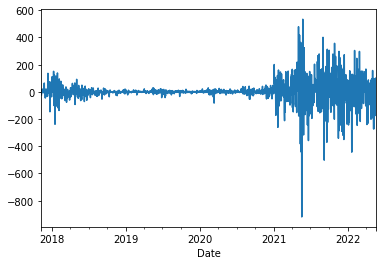

In [451]:
# Plot deltaClose
eth_history_df.deltaClose.plot()

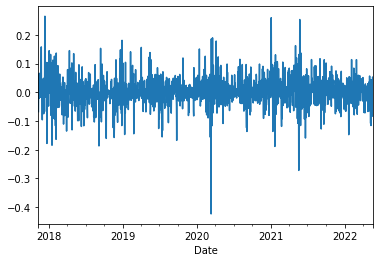

In [452]:
# Plot deltaPctClose
# plt.plot(eth_history_df.deltaPctClose)
eth_history_df.deltaPctClose.plot()

In [453]:
eth_history_df.describe()

Open         High          Low        Close    Adj Close  \
count  1655.000000  1655.000000  1655.000000  1655.000000  1655.000000   
mean   1090.036278  1126.224181  1048.963612  1090.811581  1090.811581   
std    1257.679934  1296.423071  1212.807284  1257.231479  1257.231479   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     198.936753   204.721497   194.634827   199.030334   199.030334   
50%     402.142944   417.159210   390.609985   403.997040   403.997040   
75%    1896.623963  1971.903321  1811.487244  1905.000427  1905.000427   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  Volume_in_mil   deltaClose  deltaPctClose  
count  1.655000e+03    1655.000000  1655.000000    1655.000000  
mean   1.266486e+10   12664.856986     1.025071       0.002436  
std    1.116051e+10   11160.508713    80.388975       0.051012  
min    6.217330e+08     621.732992  -919.390869      -0.423472  
25%    3.426054e+09    3426.054254    -9.499260      -0.021530  
50%    9.926712e+09    9926.711979     0.371323       0.001544  
75%    1.803431e+10   18034.306122    13.964226       0.028021  
max    8.448291e+10   84482.912776   534.011230       0.264581

In [454]:
df_close = eth_history_df.reset_index()['Close']
df_deltaClose = eth_history_df.reset_index()['deltaClose']
df_deltaPctClose = eth_history_df.reset_index()['deltaPctClose']

In [455]:
eth_history_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   

                Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                              
2017-11-10   885985984     885.985984  -21.631012      -0.067411  
2017-11-11   842300992     842.300992   15.428009       0.051555  
2017-11-12  1613479936    1613.479936   -6.773010      -0.021523  
2017-11-13  1041889984    1041.889984    8.808013       0.028606  
2017-11-14  1069680000    1069.680000   20.915009       0.066037

In [456]:
print(df_close)
print(df_deltaClose)
print(df_deltaPctClose)

0        299.252991
1        314.681000
2        307.907990
3        316.716003
4        337.631012
           ...     
1650    1916.656128
1651    2018.336182
1652    1961.315674
1653    1974.518311
1654    2017.376343
Name: Close, Length: 1655, dtype: float64
0       -21.631012
1        15.428009
2        -6.773010
3         8.808013
4        20.915009
           ...    
1650   -173.753052
1651    101.680054
1652    -57.020508
1653     13.202637
1654     42.858032
Name: deltaClose, Length: 1655, dtype: float64
0      -0.067411
1       0.051555
2      -0.021523
3       0.028606
4       0.066037
          ...   
1650   -0.083119
1651    0.053051
1652   -0.028251
1653    0.006732
1654    0.021706
Name: deltaPctClose, Length: 1655, dtype: float64


### Time Resampling

In [457]:
eth_history_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   

                Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                              
2017-11-10   885985984     885.985984  -21.631012      -0.067411  
2017-11-11   842300992     842.300992   15.428009       0.051555  
2017-11-12  1613479936    1613.479936   -6.773010      -0.021523  
2017-11-13  1041889984    1041.889984    8.808013       0.028606  
2017-11-14  1069680000    1069.680000   20.915009       0.066037

In [458]:
# Rules 
rule_desc = {
    "MS": "Montly Start Frequency",
    "QS": "Quarterly Start Frequency",
    "A": "Year End Frequency",
}

In [459]:
# Check Max price of ETH at the end of every year
eth_history_df.resample(rule='A').max()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-31   827.515991   881.943970   792.689026   826.822998   826.822998   
2018-12-31  1397.479980  1432.880005  1290.599976  1396.420044  1396.420044   
2019-12-31   336.959900   361.398682   315.954865   336.753174   336.753174   
2020-12-31   751.626648   754.303223   726.511902   751.618958   751.618958   
2021-12-31  4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   
2022-12-31  3829.535645  3876.785156  3727.357422  3829.564941  3829.564941   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-12-31   5179829760    5179.829760  136.295044       0.264581  
2018-12-31   9214950400    9214.950400  151.209961       0.180750  
2019-12-31  18661465873   18661.465873   30.004486       0.156042  
2020-12-31  31421134556   31421.134556   50.385926       0.189404  
2021-12-31  84482912776   84482.912776  534.011230       0.259475  
2022-12-31  45743399154   45743.399154  304.424316       0.113627

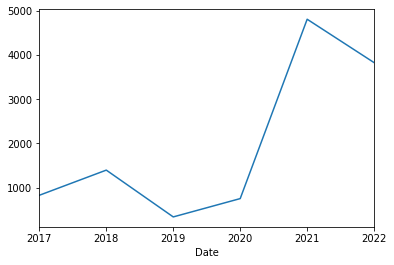

In [460]:
# Plot Max price of ETH at the end of every year
eth_history_df.resample(rule='A').max()['Close'].plot()

In [461]:
# Check Max price of ETH at every quarter
eth_history_df.resample(rule='QS').max()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-10-01   827.515991   881.943970   792.689026   826.822998   826.822998   
2018-01-01  1397.479980  1432.880005  1290.599976  1396.420044  1396.420044   
2018-04-01   816.088013   835.057007   784.237000   816.119995   816.119995   
2018-07-01   500.838013   513.432983   488.416992   501.002014   501.002014   
2018-10-01   233.220001   234.145004   226.945007   230.768005   230.768005   
2019-01-01   158.902405   165.549622   154.337418   158.795425   158.795425   
2019-04-01   336.959900   361.398682   315.954865   336.753174   336.753174   
2019-07-01   313.325165   318.223114   305.285828   313.251404   313.251404   
2019-10-01   193.191071   195.942505   188.667679   193.293259   193.293259   
2020-01-01   284.561310   287.123688   264.279663   284.217499   284.217499   
2020-04-01   247.548538   252.222000   242.819748   247.444946   247.444946   
2020-07-01   477.007874   487.211884   432.079193   477.051910   477.051910   
2020-10-01   751.626648   754.303223   726.511902   751.618958   751.618958   
2021-01-01  1959.902954  2036.286499  1896.684448  1960.164795  1960.164795   
2021-04-01  4174.635742  4362.350586  3785.848633  4168.701172  4168.701172   
2021-07-01  3951.520752  4022.469238  3868.994385  3952.133545  3952.133545   
2021-10-01  4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   
2022-01-01  3829.535645  3876.785156  3727.357422  3829.564941  3829.564941   
2022-04-01  3522.364990  3573.960205  3442.000244  3522.833496  3522.833496   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-10-01   5179829760    5179.829760  136.295044       0.264581  
2018-01-01   9214950400    9214.950400  151.209961       0.144702  
2018-04-01   4316120064    4316.120064   92.394043       0.144937  
2018-07-01   2836200000    2836.200000   30.807984       0.152855  
2018-10-01   4370343387    4370.343387   21.071106       0.180750  
2019-01-01   5957715043    5957.715043   14.732445       0.140933  
2019-04-01  18661465873   18661.465873   30.004486       0.156042  
2019-07-01  11757739233   11757.739233   18.153443       0.071311  
2019-10-01  13831784986   13831.784986   19.354660       0.119349  
2020-01-01  27864623061   27864.623061   29.554932       0.189404  
2020-04-01  28089191904   28089.191904   25.589234       0.178264  
2020-07-01  31421134556   31421.134556   41.972168       0.114729  
2020-10-01  31104004592   31104.004592   50.385926       0.098177  
2021-01-01  60733630300   60733.630300  200.972717       0.259475  
2021-04-01  84482912776   84482.912776  534.011230       0.253136  
2021-07-01  39131346397   39131.346397  401.095459       0.116810  
2021-10-01  38478999182   38478.999182  357.061524       0.101889  
2022-01-01  29312342666   29312.342666  304.424316       0.113627  
2022-04-01  45743399154   45743.399154  167.909424       0.056465

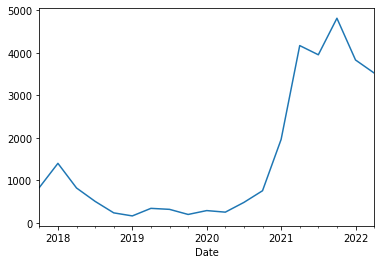

In [462]:
# Plot Max price of ETH at every quarter
eth_history_df.resample(rule='QS').max()['Close'].plot()

In [463]:
# Check Min price of ETH at the end of every year
eth_history_df.resample(rule='A').min()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-31   298.585999   319.153015   294.541992   299.252991   299.252991   
2018-12-31    84.279694    85.342743    82.829887    84.308296    84.308296   
2019-12-31   104.645050   106.058876   102.934563   104.535301   104.535301   
2020-12-31   110.406784   116.021622    95.184303   110.605873   110.605873   
2021-12-31   730.402649   749.201843   718.109497   730.367554   730.367554   
2022-12-31  1916.149536  1985.395996  1748.303101  1916.656128  1916.656128   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-12-31    621732992     621.732992 -146.203003      -0.178066  
2018-12-31    948488000     948.488000 -238.230103      -0.186866  
2019-12-31   2212109224    2212.109224  -42.485535      -0.167444  
2020-12-31   5109032700    5109.032700  -82.521408      -0.423472  
2021-12-31  10894785525   10894.785525 -919.390869      -0.272003  
2022-12-31   6532996574    6532.996574 -443.188476      -0.147674

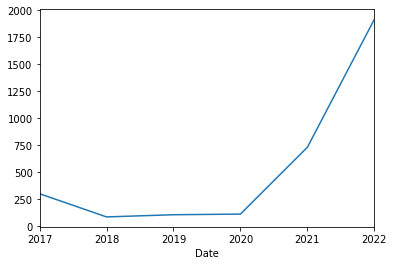

In [464]:
# Plot Min price of ETH at the end of every year
eth_history_df.resample(rule='A').min()['Close'].plot()

In [465]:
# Check Min price of ETH at every quarter
eth_history_df.resample(rule='QS').min()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-10-01   298.585999   319.153015   294.541992   299.252991   299.252991   
2018-01-01   385.904999   409.928986   368.632996   385.967987   385.967987   
2018-04-01   370.380005   385.195007   363.804993   370.285004   370.285004   
2018-07-01   183.679001   185.587006   170.257004   183.330994   183.330994   
2018-10-01    84.279694    85.342743    82.829887    84.308296    84.308296   
2019-01-01   104.645050   106.058876   102.934563   104.535301   104.535301   
2019-04-01   141.465485   142.733994   140.737564   141.830322   141.830322   
2019-07-01   166.651703   170.773514   157.130325   166.727127   166.727127   
2019-10-01   122.656837   128.097565   119.780060   122.603889   122.603889   
2020-01-01   110.406784   116.021622    95.184303   110.605873   110.605873   
2020-04-01   133.612320   135.634552   129.730942   135.634552   135.634552   
2020-07-01   225.288483   229.629318   224.544495   225.387070   225.387070   
2020-10-01   340.943085   342.450836   334.545563   340.815857   340.815857   
2021-01-01   730.402649   749.201843   718.109497   730.367554   730.367554   
2021-04-01  1810.884277  1850.179810  1707.600586  1813.217285  1813.217285   
2021-07-01  1786.276245  1836.998047  1722.050781  1787.510742  1787.510742   
2021-10-01  3001.129395  3329.853516  2978.654297  3307.516113  3307.516113   
2022-01-01  2406.924316  2498.507080  2172.301270  2405.181152  2405.181152   
2022-04-01  1916.149536  1985.395996  1748.303101  1916.656128  1916.656128   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-10-01    621732992     621.732992 -146.203003      -0.178066  
2018-01-01   1151170048    1151.170048 -238.230103      -0.184400  
2018-04-01    948488000     948.488000  -92.742004      -0.130962  
2018-07-01   1164120000    1164.120000  -53.391998      -0.186866  
2018-10-01   1084810000    1084.810000  -36.270004      -0.160651  
2019-01-01   2212109224    2212.109224  -22.942764      -0.147065  
2019-04-01   4611999536    4611.999536  -42.485535      -0.126162  
2019-07-01   5238542572    5238.542572  -41.880737      -0.167444  
2019-10-01   5837211771    5837.211771  -14.235626      -0.082403  
2020-01-01   7430904515    7430.904515  -82.521408      -0.423472  
2020-04-01   5600408178    5600.408178  -23.000564      -0.108698  
2020-07-01   5109032700    5109.032700  -54.368561      -0.136464  
2020-10-01   8125837102    8125.837102  -51.885499      -0.090918  
2021-01-01  13652004358   13652.004358 -260.703125      -0.188605  
2021-04-01  18765854896   18765.854896 -919.390869      -0.272003  
2021-07-01  13296586731   13296.586731 -501.985108      -0.127784  
2021-10-01  10894785525   10894.785525 -350.226318      -0.084709  
2022-01-01   6532996574    6532.996574 -443.188476      -0.147674  
2022-04-01   8546822406    8546.822406 -272.029541      -0.115810

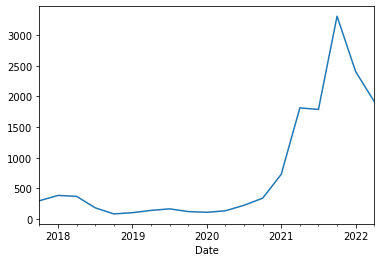

In [466]:
# Plot Min price of ETH at every quarter
eth_history_df.resample(rule='QS').min()['Close'].plot()

In [467]:
# Check mean price of ETH at the end of every year
eth_history_df.resample(rule='A').mean()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-31   528.091883   557.766153   503.196944   536.148270   536.148270   
2018-12-31   485.397384   502.704094   463.143234   483.507727   483.507727   
2019-12-31   181.771947   186.367671   176.947580   181.770137   181.770137   
2020-12-31   305.899433   315.010121   297.221470   307.542978   307.542978   
2021-12-31  2771.215477  2872.125942  2658.899019  2778.354149  2778.354149   
2022-12-31  2884.363482  2956.100795  2795.452046  2872.725646  2872.725646   

                  Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                                
2017-12-31  2.037049e+09    2037.048527    8.381711       0.018814  
2018-12-31  2.276869e+09    2276.869352   -1.707849      -0.003163  
2019-12-31  6.967028e+09    6967.027840   -0.010294       0.000771  
2020-12-31  1.424528e+10   14245.276813    1.661728       0.006070  
2021-12-31  2.728082e+10   27280.819105    8.068026       0.005983  
2022-12-31  1.626140e+10   16261.401599  -11.727158      -0.003378

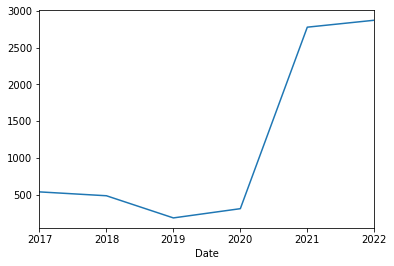

In [468]:
# Plot mean price of ETH at the end of every year
eth_history_df.resample(rule='A').mean()['Close'].plot()

In [469]:
# Check mean price of ETH at every quarter
eth_history_df.resample(rule='QS').mean()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-10-01   528.091883   557.766153   503.196944   536.148270   536.148270   
2018-01-01   871.791709   911.641502   818.832786   867.320934   867.320934   
2018-04-01   574.128099   591.948726   553.943782   574.633165   574.633165   
2018-07-01   341.340281   349.463186   329.785836   338.810457   338.810457   
2018-10-01   163.693786   167.622957   158.729876   162.600609   162.600609   
2019-01-01   130.946503   133.907482   128.210433   131.030422   131.030422   
2019-04-01   218.524983   226.252934   212.650139   220.182696   220.182696   
2019-07-01   212.830744   217.485638   205.900593   211.642078   211.642078   
2019-10-01   164.080147   167.117726   160.357724   163.539845   163.539845   
2020-01-01   184.166511   190.282980   177.310988   184.195056   184.195056   
2020-04-01   204.400526   209.576307   200.072916   205.440528   205.440528   
2020-07-01   341.606476   351.650596   331.544364   343.038269   343.038269   
2020-10-01   490.997786   506.028851   477.598274   495.047509   495.047509   
2021-01-01  1528.509033  1594.946289  1458.077849  1541.277395  1541.277395   
2021-04-01  2593.181946  2719.470675  2442.737247  2597.435252  2597.435252   
2021-07-01  2841.780110  2937.660499  2740.083865  2850.271792  2850.271792   
2021-10-01  4092.440313  4207.002234  3966.242721  4095.572674  4095.572674   
2022-01-01  2939.659597  3018.542529  2849.177338  2935.221465  2935.221465   
2022-04-01  2788.658666  2848.028562  2702.465964  2764.559805  2764.559805   

                  Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                                
2017-10-01  2.037049e+09    2037.048527    8.381711       0.018814  
2018-01-01  3.341332e+09    3341.331567   -4.003066      -0.004936  
2018-04-01  2.170332e+09    2170.331749    0.645308       0.002875  
2018-07-01  1.702962e+09    1702.961632   -2.416652      -0.006083  
2018-10-01  1.914835e+09    1914.834926   -1.081302      -0.004483  
2019-01-01  3.615201e+09    3615.201047    0.090509       0.001510  
2019-04-01  8.675775e+09    8675.775150    1.639361       0.009012  
2019-07-01  7.352821e+09    7352.821448   -1.204606      -0.004241  
2019-10-01  8.170021e+09    8170.021255   -0.546319      -0.003090  
2020-01-01  1.543945e+10   15439.454149    0.043766       0.003119  
2020-04-01  1.417553e+10   14175.526180    1.018917       0.006600  
2020-07-01  1.243379e+10   12433.794811    1.452422       0.005978  
2020-10-01  1.494455e+10   14944.554142    4.107234       0.008558  
2021-01-01  3.244661e+10   32446.605572   13.117318       0.012545  
2021-04-01  3.647458e+10   36474.583603    3.914127       0.004509  
2021-07-01  2.118185e+10   21181.848898    7.903602       0.004106  
2021-10-01  1.923247e+10   19232.470275    7.401672       0.002898  
2022-01-01  1.493472e+10   14934.716189   -4.455444      -0.000440  
2022-04-01  1.855759e+10   18557.587885  -24.312817      -0.008462

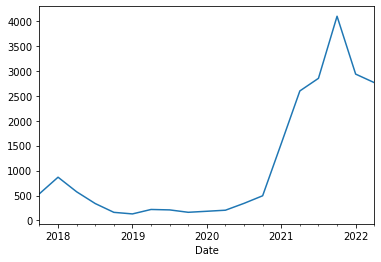

In [470]:
# Plot mean price of ETH at every quarter
eth_history_df.resample(rule='QS').mean()['Close'].plot()

In [471]:
def plot_resample_with_rule(rule):
  fig, axs = plt.subplots(1, 3, figsize=(20, 4))
  plt.tight_layout()
  fig.autofmt_xdate()

  # plt.title(f"Min Max and Mean for Rule: {rule}")
  axs[0].set_title(f"Min Close Price for Rule: {rule_desc[rule]}")
  axs[0].plot(eth_history_df.resample(rule=rule).min()['Close'])

  axs[1].set_title(f"Max Close Price for Rule: {rule_desc[rule]}")
  axs[1].plot(eth_history_df.resample(rule=rule).max()['Close'])

  axs[2].set_title(f"Avg Close Price for Rule: {rule_desc[rule]}")
  axs[2].plot(eth_history_df.resample(rule=rule).mean()['Close'])

  plt.show()

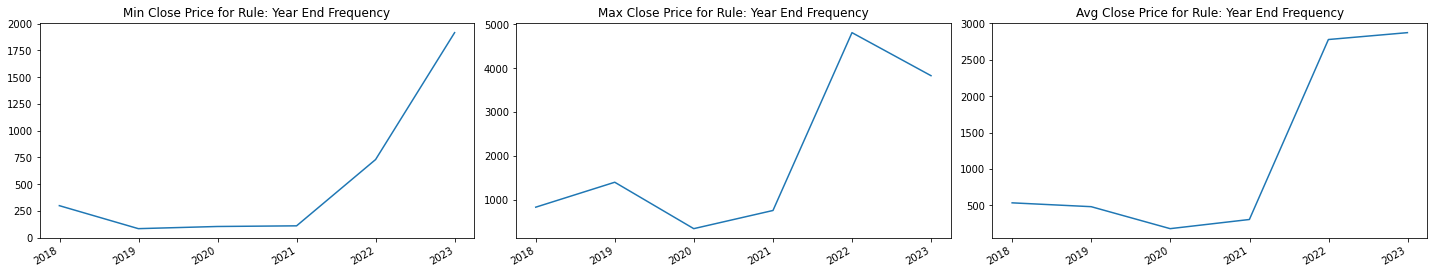

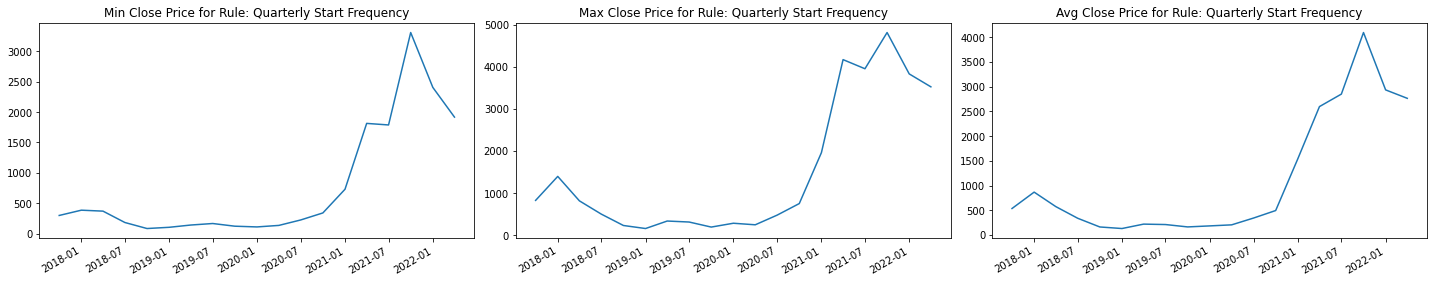

In [472]:
plot_resample_with_rule('A')
plot_resample_with_rule('QS')

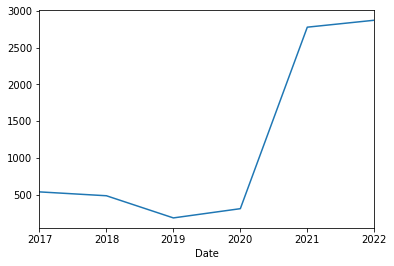

In [473]:
eth_history_df.resample(rule='A').mean()['Close'].plot()

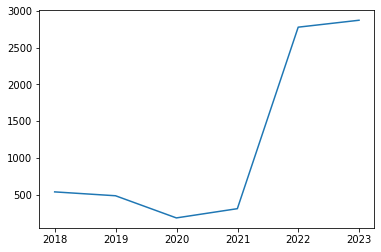

In [474]:
plt.plot(eth_history_df.resample(rule='A').mean()['Close'])

In [475]:
eth_history_df.resample(rule='A').mean()['Close']

Date
2017-12-31     536.148270
2018-12-31     483.507727
2019-12-31     181.770137
2020-12-31     307.542978
2021-12-31    2778.354149
2022-12-31    2872.725646
Freq: A-DEC, Name: Close, dtype: float64

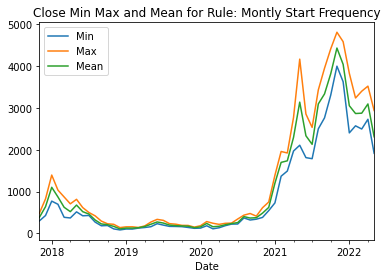

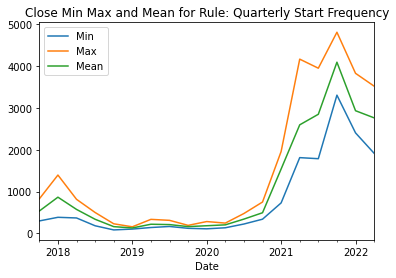

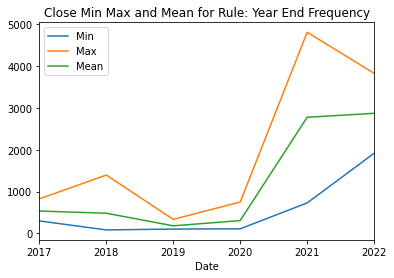

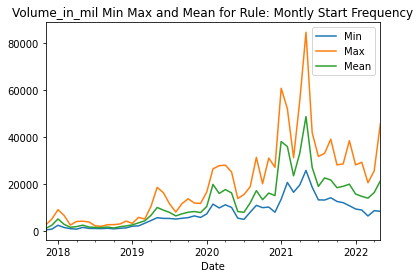

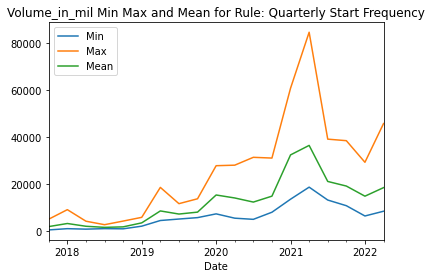

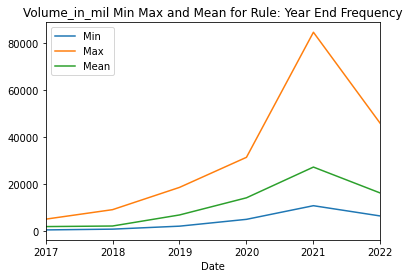

In [476]:
def plot_resample_with_rule_2(rule, column):
  eth_history_df.resample(rule=rule).min()[column].plot(legend=True, label="Min")
  eth_history_df.resample(rule=rule).max()[column].plot(legend=True, label="Max")
  eth_history_df.resample(rule=rule).mean()[column].plot(legend=True, label="Mean")
  plt.title(f"{column} Min Max and Mean for Rule: {rule_desc[rule]}")
  plt.show()

plot_resample_with_rule_2('MS', 'Close')
plot_resample_with_rule_2('QS', 'Close')
plot_resample_with_rule_2('A', 'Close')
plot_resample_with_rule_2('MS', 'Volume_in_mil')
plot_resample_with_rule_2('QS', 'Volume_in_mil')
plot_resample_with_rule_2('A', 'Volume_in_mil')

In [477]:
# eth_history_df.resample(rule="MS").min()['Close']

### Seasonality & Trend Check

In [478]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [479]:
eth_history_df_copy = eth_history_df.copy()
eth_history_df_copy.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   

                Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                              
2017-11-10   885985984     885.985984  -21.631012      -0.067411  
2017-11-11   842300992     842.300992   15.428009       0.051555  
2017-11-12  1613479936    1613.479936   -6.773010      -0.021523  
2017-11-13  1041889984    1041.889984    8.808013       0.028606  
2017-11-14  1069680000    1069.680000   20.915009       0.066037

In [480]:
# eth_history_df_copy.set_index('Date', inplace=True)
# eth_history_df_copy.head()

In [481]:
eth_history_df_copy = eth_history_df_copy[['Close']]
eth_history_df_copy.head()

Close
Date                  
2017-11-10  299.252991
2017-11-11  314.681000
2017-11-12  307.907990
2017-11-13  316.716003
2017-11-14  337.631012

In [482]:
def checkSeasonality(df):
  result = seasonal_decompose(df, model="multiplicative")

  trend = result.trend
  seasonal = result.seasonal
  residual = result.resid

  result.plot()

  return trend, seasonal, residual

(                  Close
 Date                   
 2017-11-10          NaN
 2017-11-11          NaN
 2017-11-12          NaN
 2017-11-13   320.067143
 2017-11-14   324.801575
 ...                 ...
 2022-05-18  2018.524031
 2022-05-19  2000.191110
 2022-05-20          NaN
 2022-05-21          NaN
 2022-05-22          NaN
 
 [1655 rows x 1 columns],                Close
 Date                
 2017-11-10  0.996570
 2017-11-11  1.001954
 2017-11-12  1.002124
 2017-11-13  1.001597
 2017-11-14  1.001585
 ...              ...
 2022-05-18  1.001356
 2022-05-19  0.994813
 2022-05-20  0.996570
 2022-05-21  1.001954
 2022-05-22  1.002124
 
 [1655 rows x 1 columns],                Close
 Date                
 2017-11-10       NaN
 2017-11-11       NaN
 2017-11-12       NaN
 2017-11-13  0.987952
 2017-11-14  1.037854
 ...              ...
 2022-05-18  0.948248
 2022-05-19  1.014333
 2022-05-20       NaN
 2022-05-21       NaN
 2022-05-22       NaN
 
 [1655 rows x 1 columns])

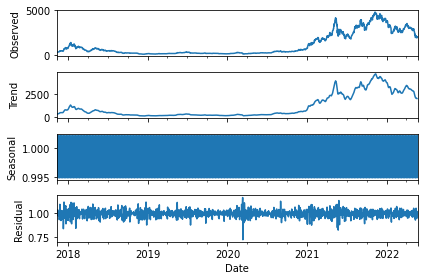

In [483]:
checkSeasonality(eth_history_df_copy)

### Plot Histogram

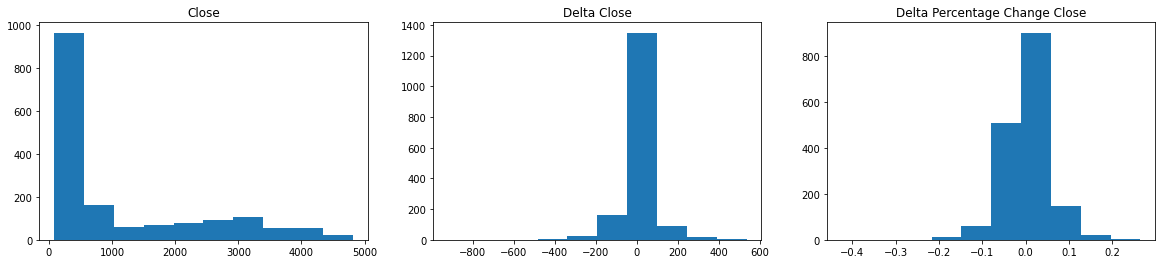

In [484]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

axs[0].set_title('Close')
axs[0].hist(eth_history_df['Close'])

axs[1].set_title('Delta Close')
axs[1].hist(eth_history_df['deltaClose'])

axs[2].set_title('Delta Percentage Change Close')
axs[2].hist(eth_history_df['deltaPctClose'])

plt.show()

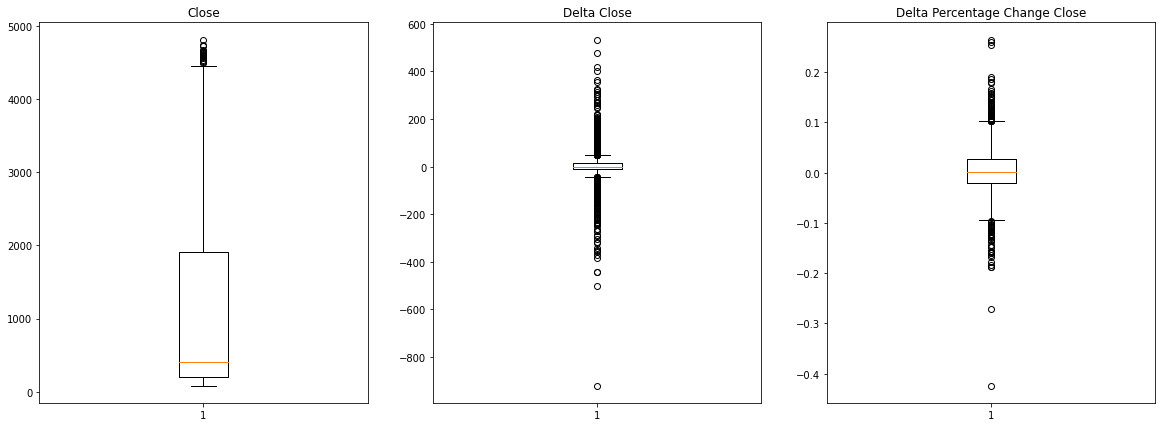

In [485]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

axs[0].set_title('Close')
axs[0].boxplot(eth_history_df['Close'])

axs[1].set_title('Delta Close')
axs[1].boxplot(eth_history_df['deltaClose'])

axs[2].set_title('Delta Percentage Change Close')
axs[2].boxplot(eth_history_df['deltaPctClose'])

plt.show()

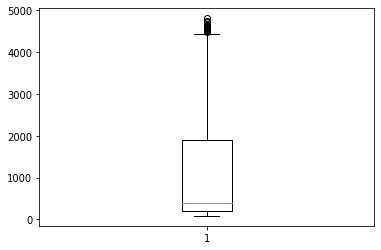

In [486]:
# eth_history_df['Close'].boxplot()
plt.boxplot(eth_history_df['Close'])
plt.show()

In [487]:
print("Close")
print(eth_history_df['Close'].describe())
print("")
print("DeltaClose")
print(eth_history_df['deltaClose'].describe())
print("")
print("DeltaPctClose")
print(eth_history_df['deltaPctClose'].describe())

Close
count    1655.000000
mean     1090.811581
std      1257.231479
min        84.308296
25%       199.030334
50%       403.997040
75%      1905.000427
max      4812.087402
Name: Close, dtype: float64

DeltaClose
count    1655.000000
mean        1.025071
std        80.388975
min      -919.390869
25%        -9.499260
50%         0.371323
75%        13.964226
max       534.011230
Name: deltaClose, dtype: float64

DeltaPctClose
count    1655.000000
mean        0.002436
std         0.051012
min        -0.423472
25%        -0.021530
50%         0.001544
75%         0.028021
max         0.264581
Name: deltaPctClose, dtype: float64


In [488]:
# eth_history_df.loc(2019)['Close']

print(eth_history_df['2019']['Close'].describe())

print(eth_history_df['2021']['Close'].describe())

count    365.000000
mean     181.770137
std       50.382666
min      104.535301
25%      142.398178
50%      173.889969
75%      210.522598
max      336.753174
Name: Close, dtype: float64
count     365.000000
mean     2778.354149
std      1023.543690
min       730.367554
25%      1895.552124
50%      2633.518311
75%      3638.122070
max      4812.087402
Name: Close, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """


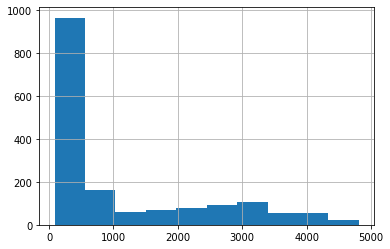

In [489]:
eth_history_df['Close'].hist()

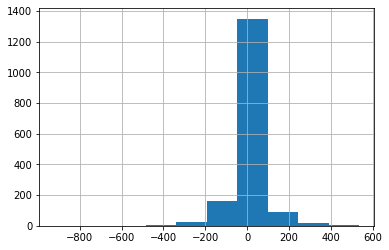

In [490]:
eth_history_df['deltaClose'].hist()

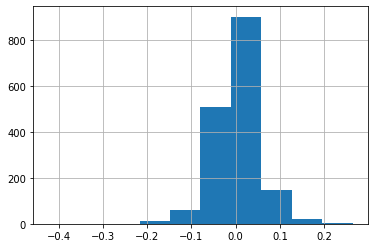

In [491]:
eth_history_df['deltaPctClose'].hist()

### Check Mean and Variance
We will check mean and variance after splitting the data in half

In [492]:
def checkMeanAndVariance(df, col_name):
  # X = series.values
  X = df[[col_name]].copy()
  split = int(len(X)/2)
  X1, X2 = X[0:split], X[split:]

  # mean1, mean2 = round(float(X1.mean()), 2), round(float(X2.mean()), 2)
  # var1, var2 = round(float(X1.var()), 2), round(float(X2.var()), 2)
  mean1, mean2 = float(X1.mean()), float(X2.mean())
  var1, var2 = float(X1.var()), float(X2.var())

  print(f"Analysis for {col_name}")
  print(f"mean1={float(mean1)}, mean2={float(mean2)}")
  print(f"variance1={float(var1)}, variance2={float(var2)}")

  # X1.hist()
  # X2.hist()
  # plt.show()

  fig, axs = plt.subplots(1, 2, figsize=(20, 4))

  # axs[0].set_title(col_name)
  axs[0].hist(X1[col_name])
  axs[1].hist(X2[col_name])

  plt.show()


Analysis for Close
mean1=336.99130479685624, mean2=1843.7214459396118
variance1=66678.96376660561, variance2=1958859.9142969397


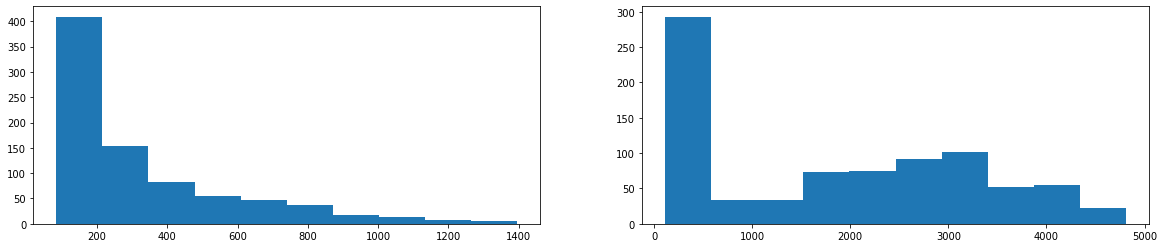

---
Analysis for deltaClose
mean1=-0.044336764207980967, mean2=2.0931870096618352
variance1=711.6047444288109, variance2=12211.744361361849


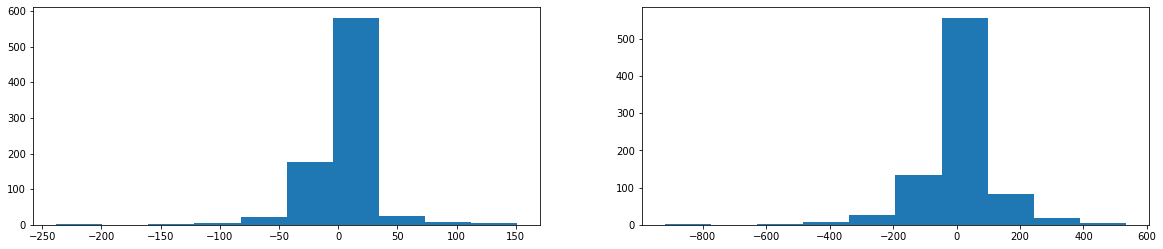

---
Analysis for deltaPctClose
mean1=0.0011225718930756613, mean2=0.003747398607861875
variance1=0.002536055377473825, variance2=0.002668042041104589


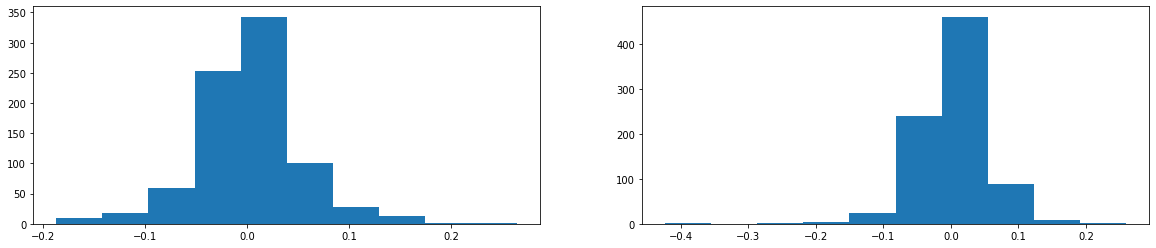

In [493]:
checkMeanAndVariance(eth_history_df, 'Close')
print('---')
checkMeanAndVariance(eth_history_df, 'deltaClose')
print('---')
checkMeanAndVariance(eth_history_df, 'deltaPctClose')

In [494]:
df_deltaPctClose.min(), df_deltaPctClose.max()

(-0.42347221483119923, 0.2645807082093463)

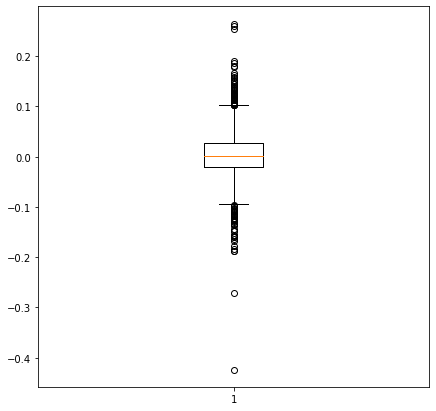

In [495]:
plt.figure(figsize =(7, 7))
plt.boxplot(df_deltaPctClose)
plt.show()

### Augmented Dickey-Fuller test
Read more : https://machinelearningmastery.com/time-series-data-stationary-python/

In [496]:
from statsmodels.tsa.stattools import adfuller

In [497]:
def checkAdfuller(df, col_name):
  s = df[col_name].values
  result = adfuller(s)
  adf_val, p_val = result[0], result[1]
  print(col_name)
  # print('ADF Statistic: %f' % result[0])
  # print('p-value: %f' % result[1])
  print('ADF Statistic: %f' % adf_val)
  print('p-value: %f' % p_val)
  print(f"{col_name} series is", "Stationary" if p_val < 0.05 else "NOT Stationary")

In [498]:
checkAdfuller(eth_history_df, 'Close')
print('---')
checkAdfuller(eth_history_df, 'deltaClose')
print('---')
checkAdfuller(eth_history_df, 'deltaPctClose')

Close
ADF Statistic: -1.115920
p-value: 0.708682
Close series is NOT Stationary
---
deltaClose
ADF Statistic: -10.255242
p-value: 0.000000
deltaClose series is Stationary
---
deltaPctClose
ADF Statistic: -14.812627
p-value: 0.000000
deltaPctClose series is Stationary


In [499]:
# create dataset 
# In this step we use a window length and format the train and test data so that they are in time series format.
# Ex, X = [1, 2, 3], y = [4]
# Ex, X = [2, 3, 4], y = [5]
# Ex, X = [4, 5, 6], y = [6]
# And so on....

def create_Xy_dataset(df, interval, print_samples = False):
  dataX, dataY = [], []

  # print(f"interval = {interval}")
  rangeSize = len(df) - interval

  for i in range(rangeSize):
    x = df[i:i+interval, 0]
    y = df[i+interval, 0]

    if (print_samples):
      # Print some samples
      if (i<5 or i>len(df) - interval - 1 - 5):
        print(f"x = {x}")
        print(f"y = {y}")
        print("")

    dataX.append(x)
    dataY.append(y)
  
  X = np.array(dataX)
  X = X.reshape(X.shape[0], X.shape[1], 1) # reshape for LSTM. Add 3rd dimension
  y = np.array(dataY)

  return X, y

In [500]:
# X, y = create_Xy_dataset(df_close, 3)
print(len(df_close))
# print(X)
# print(y)

1655


## Create Models

In [580]:
# Create LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D

In [581]:
def getNextNPredictions(interval, X_train, model, num_next_n_predictions):
  # Initialize Prediction Set
  predictions = []
  predictions_flat = []

  eval_batch = X_train[-1:]

  for i in range(num_next_n_predictions):
    # Predict the evaluation batch
    pred = model.predict(eval_batch)[0]

    # Add prediction to predictions array
    predictions.append(pred)
    predictions_flat.append(pred[0])

    # shift eval batch by one by removing the 1st element and adding pred as last element 
    eval_batch = np.append(eval_batch[:, 1:, :], [[pred]], axis=1)
  
  return predictions, predictions_flat


In [607]:
# split into train and test data. By default use 70% data for training and rest for testing.
def df_train_test_split(df, train_size_pct = 0.70):
  training_size = int(len(df) * train_size_pct) # use 70% data to train
  test_size = len(df) - training_size # use the remaining 30% for test

  train_data = df[0:training_size,:]
  test_data = df[training_size:len(df), :1]

  return train_data, test_data

def getScaledDf(df, scaler):
  print('Plot Before Scaling')
  print(plt.plot(df))
  plt.show()
  scaled_df = scaler.fit_transform(np.array(df).reshape(-1, 1))
  print('Plot After Scaling')
  print(plt.plot(scaled_df))
  plt.show()
  return scaled_df

def getTrainTestPrediction(model, scaler, X_train, y_train, X_test, y_test):
  train_predict = model.predict(X_train)
  test_predict = model.predict(X_test)

  # Inverse scale
  if (scaler):
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

  return train_predict, test_predict

def getPredSeries(df, interval, train_predict, test_predict):
  print(f"train_predict length = {len(train_predict)} ")
  print(f"test_predict length = {len(test_predict)} ")

  # shift train predictions for plotting
  trainPredictPlot = np.empty_like(df)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[interval:len(train_predict)+interval, :] = train_predict

  print(f"test_predict range start = {len(train_predict)+(interval*2)+1}")
  print(f"test_predict range end = {len(df)-1}")
  # shift test predictions for plotting
  testPredictPlot = np.empty_like(df)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(train_predict)+(interval*2):, :] = test_predict

  return trainPredictPlot, testPredictPlot

def plotSequence(df, interval, scaler, train_predict, test_predict):
  # get train and test predictions for plotting
  # shift train predictions for plotting
  trainPredictPlot, testPredictPlot = getPredSeries(df, interval, train_predict, test_predict)

  # plot baseline and predictions
  if (scaler):
    plt.plot(scaler.inverse_transform(df))
  else:
    plt.plot(df)

  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()

def plotResiduals(pred_train_df, pred_test_df):
  fig, axs = plt.subplots(1, 2, figsize=(16, 4))
  train_residual_df = pred_train_df.copy()
  train_residual_df['residual'] = train_residual_df['y_train_actual'] - train_residual_df['train_predict']
  test_residual_df = pred_test_df.copy()
  test_residual_df['residual'] = test_residual_df['y_test_actual'] - test_residual_df['test_predict']

  sns.residplot(x="y_train_actual", y="residual", data=train_residual_df, ax=axs[0])
  axs[0].set(xlabel="Train Actual", ylabel="Residual")
  axs[0].set_title("Train Residuals")

  sns.residplot(x="y_test_actual", y="residual", data=test_residual_df, ax=axs[1])
  axs[1].set(xlabel="Test Actual", ylabel="Residual")
  axs[1].set_title("Test Residuals")

  plt.suptitle("Residual Plot")
  plt.show()

def evaluateIntervalPerformance(model, df, interval, scaler, X_train, y_train, X_test, y_test):
  train_predict, test_predict = getTrainTestPrediction(model, scaler, X_train, y_train, X_test, y_test)

  if (scaler):
    y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
  else:
    y_train_actual = y_train.reshape(-1, 1)
    y_test_actual = y_test.reshape(-1, 1)

  pred_train_df = pd.DataFrame({
      "y_train": y_train,
      "y_train_actual": y_train_actual[:, 0],
      "train_predict": train_predict[:, 0]
  })
  pred_test_df = pd.DataFrame({
      "y_test": y_test,
      "y_test_actual": y_test_actual[:, 0],
      "test_predict": test_predict[:, 0],
  })
  print("Train")
  display(pred_train_df.head(10))
  print("Test")
  display(pred_test_df.head(10))

  # Calculate RMSE
  rmse_train = math.sqrt(mean_squared_error(y_train_actual, train_predict))
  rmse_test = math.sqrt(mean_squared_error(y_test_actual, test_predict))

  mape_train = mean_absolute_percentage_error(y_train_actual, train_predict)
  mape_test = mean_absolute_percentage_error(y_test_actual, test_predict)

  print(f"RMSE Train = {rmse_train}")
  print(f"RMSE Test = {rmse_test}")
  print(f"MAPE Train = {mape_train}")
  print(f"MAPE Test = {mape_test}")

  plotSequence(df, interval, scaler, train_predict, test_predict)
  plotResiduals(pred_train_df, pred_test_df)

  return pred_train_df, pred_test_df, rmse_train, rmse_test, mape_train, mape_test


In [608]:
class IntervalBasedModel:
  def __init__(self, df_close, df_deltaClose, df_deltaPctClose):
    self.df_close = df_close
    self.df_deltaClose = df_deltaClose
    self.df_deltaPctClose = df_deltaPctClose
    self.df_metrics = pd.DataFrame({
        "model": [],
        "interval": [],
        "target": [],
        "rmse_train": [],
        "rmse_test": [],
        "mape_train": [],
        "mape_test": [],
    })

    ##################
    # Scale
    ##################
    self.scale()
  
  def scale(self):
    # Initialize Scaler 
    print("Initialize Scaler ")
    self.scalerClose = MinMaxScaler(feature_range=(0,1))
    # scalerDeltaClose = MinMaxScaler(feature_range=(-1,1))
    self.scalerDeltaClose = MinMaxScaler(feature_range=(-0.5,0.5))

    # Scale 
    print("Scaling Close")
    self.close_scaled = getScaledDf(self.df_close, self.scalerClose)
    print("Scaling Delta Close")
    self.deltaClose_scaled = getScaledDf(self.df_deltaClose, self.scalerDeltaClose)
    print("Scaling Delta Pct Close")
    self.deltaPctClose_scaled = np.array(self.df_deltaPctClose).reshape(-1, 1)

  def train_test_split(self):
    # 1. Split data
    # Close
    print("Split Train and Test Data")
    close_train_data, close_test_data = df_train_test_split(self.close_scaled)
    print(f"Close Total data Size = {len(self.close_scaled)}")
    print(f"Close Train data Size = {len(close_train_data)}")
    print(f"Close Test data Size = {len(close_test_data)}")
    print("---------------------")

    # Delta Close
    deltaClose_train_data, deltaClose_test_data = df_train_test_split(self.deltaClose_scaled)
    print(f"Delta Close Total data Size = {len(self.deltaClose_scaled)}")
    print(f"Delta Close Train data Size = {len(deltaClose_train_data)}")
    print(f"Delta Close Test data Size = {len(deltaClose_test_data)}")
    print("---------------------")

    # Delta Pct Close
    deltaPctClose_train_data, deltaPctClose_test_data = df_train_test_split(self.deltaPctClose_scaled)
    print(f"Delta Close Total data Size = {len(self.deltaPctClose_scaled)}")
    print(f"Delta Close Train data Size = {len(deltaPctClose_train_data)}")
    print(f"Delta Close Test data Size = {len(deltaPctClose_test_data)}")
    print("---------------------")
    print("")

    # 2. Format data for time series modeling
    print("Create (X, y) from Train and Test Data")
    # Close
    self.close_X_train, self.close_y_train = create_Xy_dataset(close_train_data, self.interval)
    self.close_X_test, self.close_y_test = create_Xy_dataset(close_test_data, self.interval)
    print("Close train, test length ", len(self.close_X_train), len(self.close_X_test))
    print("Close train shape, test shape ", self.close_X_train.shape, self.close_y_train.shape)
    print("Close test shape, test shape ", self.close_X_test.shape, self.close_y_test.shape)
    print("")

    # Delta Close
    self.deltaClose_X_train, self.deltaClose_y_train = create_Xy_dataset(deltaClose_train_data, self.interval)
    self.deltaClose_X_test, self.deltaClose_y_test = create_Xy_dataset(deltaClose_test_data, self.interval)
    print("Delta Close train, test length ", len(self.deltaClose_X_train), len(self.deltaClose_X_test))
    print("Close train shape, test shape ", self.deltaClose_X_train.shape, self.deltaClose_y_train.shape)
    print("Close test shape, test shape ", self.deltaClose_X_test.shape, self.deltaClose_y_test.shape)
    print("")

    # Delta Percentage Close
    self.deltaPctClose_X_train, self.deltaPctClose_y_train = create_Xy_dataset(deltaPctClose_train_data, self.interval)
    self.deltaPctClose_X_test, self.deltaPctClose_y_test = create_Xy_dataset(deltaPctClose_test_data, self.interval)
    print("Delta Percentage Close train, test length ", len(self.deltaPctClose_X_train), len(self.deltaPctClose_X_test))
    print("Close train shape, test shape ", self.deltaPctClose_X_train.shape, self.deltaPctClose_y_train.shape)
    print("Close test shape, test shape ", self.deltaPctClose_X_test.shape, self.deltaPctClose_y_test.shape)
    print("")
  
  def fit_lstm(self, interval, X_train, y_train, epochs=20, batch_size=128, loss="mean_squared_error", verbose=0):
    model=Sequential()
    model.add(LSTM(100, input_shape=(interval, 1)))
    # model.add(Dropout(0.2))
    model.add(Dense(1))
    # model.add(Dense(1, activation="relu"))
    model.compile(loss=loss, optimizer="adam")

    print("Model Summary")
    print(model.summary())

    history = model.fit(
      X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      verbose=verbose,
      validation_split=0.33
    )

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    return model

  def fit_stacked_lstm(self, interval, X_train, y_train, epochs=20, batch_size=128, loss="mean_squared_error", verbose=0):
    model=Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(interval, 1)))
    model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss=loss, optimizer="adam")

    print("Model Summary")
    print(model.summary())

    history = model.fit(
      X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      verbose=verbose,
      validation_split=0.33
    )

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    return model


  def fit_cnn_lstm(self, interval, X_train, y_train, epochs=50, batch_size=128, loss="mean_squared_error", verbose=0):
    model = Sequential()
    model.add(Conv1D(filters=8, kernel_size=3, input_shape=(interval, 1)))
    # model.add(LSTM(100, input_shape=(interval, 1)))
    model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss=loss, optimizer="adam")

    print("Model Summary")
    print(model.summary())

    history = model.fit(
      X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      verbose=verbose,
      validation_split=0.33
    )

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    return model

  def get_lstm_models(self):
    ##### LSTM MODELS #####

    # Fit LSTM model on close 
    print("(LSTM) Fit Model for Close. Interval = ", self.interval)
    lstm_close_model = self.fit_lstm(self.interval, self.close_X_train, self.close_y_train, epochs=30)
    
    # Fit LSTM model on delta close 
    print("(LSTM) Fit Model for Delta Close. Interval = ", self.interval)
    lstm_deltaClose_model = self.fit_lstm(self.interval, self.deltaClose_X_train, self.deltaClose_y_train, epochs=30)
    
    # Fit LSTM model on delta pct close 
    print("(LSTM) Fit Model for Delta Pct Change Close. Interval = ", self.interval)
    lstm_deltaPctClose_model = self.fit_lstm(self.interval, self.deltaPctClose_X_train, self.deltaPctClose_y_train, epochs=50)

    return lstm_close_model, lstm_deltaClose_model, lstm_deltaPctClose_model

  def get_stacked_lstm_models(self):
    ##### Stacked LSTM MODELS #####
    
    # Fit LSTM model on close 
    print("(Stacked LSTM) Fit Model for Close. Interval = ", self.interval)
    stacked_lstm_close_model = self.fit_stacked_lstm(self.interval, self.close_X_train, self.close_y_train, epochs=30)
    
    # Fit LSTM model on delta close 
    print("(Stacked LSTM) Fit Model for Delta Close. Interval = ", self.interval)
    stacked_lstm_deltaClose_model = self.fit_stacked_lstm(self.interval, self.deltaClose_X_train, self.deltaClose_y_train, epochs=30)
    
    # Fit LSTM model on delta pct close 
    print("(Stacked LSTM) Fit Model for Delta Pct Change Close. Interval = ", self.interval)
    stacked_lstm_deltaPctClose_model = self.fit_stacked_lstm(self.interval, self.deltaPctClose_X_train, self.deltaPctClose_y_train, epochs=50)

    return stacked_lstm_close_model, stacked_lstm_deltaClose_model, stacked_lstm_deltaPctClose_model

  def get_cnn_lstm_models(self):
    ##### CNN-LSTM MODELS #####
    
    # Fit CNN-LSTM model on close 
    print("(CNN-LSTM) Fit Model for Close. Interval = ", self.interval)
    cnn_lstm_close_model = self.fit_cnn_lstm(self.interval, self.close_X_train, self.close_y_train, epochs=30)
    
    # Fit model on delta close 
    print("(CNN-LSTM) Fit Model for Delta Close. Interval = ", self.interval)
    cnn_lstm_deltaClose_model = self.fit_cnn_lstm(self.interval, self.deltaClose_X_train, self.deltaClose_y_train, epochs=30)
    
    # Fit model on delta pct close 
    print("(CNN-LSTM) Fit Model for Delta Pct Change Close. Interval = ", self.interval)
    cnn_lstm_deltaPctClose_model = self.fit_cnn_lstm(self.interval, self.deltaPctClose_X_train, self.deltaPctClose_y_train, epochs=50)
    
    return cnn_lstm_close_model, cnn_lstm_deltaClose_model, cnn_lstm_deltaPctClose_model

  def execute(self, interval):
    print("################################################################")
    print("################## Executing for interval ", interval, " ##################")
    print("################################################################")

    ##################
    # 1. Set Interval
    ##################
    self.interval = interval

    ##################
    # 2. Split data into train and test
    ##################
    self.train_test_split()

    ##################
    # 3. Fit Model
    ##################
    lstm_close_model, lstm_deltaClose_model, lstm_deltaPctClose_model = self.get_lstm_models()
    stacked_lstm_close_model, stacked_lstm_deltaClose_model, stacked_lstm_deltaPctClose_model = self.get_stacked_lstm_models()
    cnn_lstm_close_model, cnn_lstm_deltaClose_model, cnn_lstm_deltaPctClose_model = self.get_cnn_lstm_models()

    ##################
    # 4. Evaluate Performance
    ##################
    
    ##### Evaluate LSTM Model Performance #####
    # Close
    print("(LSTM) Evaluate Close")
    lstm_close_train_predict, lstm_close_test_predict, lstm_close_rmse_train, lstm_close_rmse_test, lstm_close_mape_train, lstm_close_mape_test = evaluateIntervalPerformance(
      lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")

    # Delta Close
    print("(LSTM) Evaluate Delta Close")
    lstm_deltaClose_train_predict, lstm_deltaClose_test_predict, lstm_deltaClose_rmse_train, lstm_deltaClose_rmse_test, lstm_deltaClose_mape_train, lstm_deltaClose_mape_test = evaluateIntervalPerformance(
      lstm_deltaClose_model,
      self.deltaClose_scaled,
      self.interval,
      self.scalerDeltaClose,
      self.deltaClose_X_train,
      self.deltaClose_y_train,
      self.deltaClose_X_test,
      self.deltaClose_y_test
    )
    print("----------------------------")

    # Delta Pct Change
    print("(LSTM) Evaluate Percentage Change Close")
    lstm_deltaPctClose_train_predict, lstm_deltaPctClose_test_predict, lstm_deltaPctClose_rmse_train, lstm_deltaPctClose_rmse_test, lstm_deltaPctClose_mape_train, lstm_deltaPctClose_mape_test = evaluateIntervalPerformance(
      lstm_deltaPctClose_model,
      self.deltaPctClose_scaled,
      self.interval,
      "",
      self.deltaPctClose_X_train,
      self.deltaPctClose_y_train,
      self.deltaPctClose_X_test,
      self.deltaPctClose_y_test
    )
    print("----------------------------")

    ##### Evaluate Stacked LSTM Model Performance #####
    # Close
    print("(Stacked LSTM) Evaluate Close")
    stacked_lstm_close_train_predict, stacked_lstm_close_test_predict, stacked_lstm_close_rmse_train, stacked_lstm_close_rmse_test, stacked_lstm_close_mape_train, stacked_lstm_close_mape_test = evaluateIntervalPerformance(
      stacked_lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")

    # Delta Close
    print("(Stacked LSTM) Evaluate Delta Close")
    stacked_lstm_deltaClose_train_predict, stacked_lstm_deltaClose_test_predict, stacked_lstm_deltaClose_rmse_train, stacked_lstm_deltaClose_rmse_test, stacked_lstm_deltaClose_mape_train, stacked_lstm_deltaClose_mape_test = evaluateIntervalPerformance(
      stacked_lstm_deltaClose_model,
      self.deltaClose_scaled,
      self.interval,
      self.scalerDeltaClose,
      self.deltaClose_X_train,
      self.deltaClose_y_train,
      self.deltaClose_X_test,
      self.deltaClose_y_test
    )
    print("----------------------------")

    # Delta Pct Change
    print("(Stacked LSTM) Evaluate Percentage Change Close")
    stacked_lstm_deltaPctClose_train_predict, stacked_lstm_deltaPctClose_test_predict, stacked_lstm_deltaPctClose_rmse_train, stacked_lstm_deltaPctClose_rmse_test, stacked_lstm_deltaPctClose_mape_train, stacked_lstm_deltaPctClose_mape_test = evaluateIntervalPerformance(
      stacked_lstm_deltaPctClose_model,
      self.deltaPctClose_scaled,
      self.interval,
      "",
      self.deltaPctClose_X_train,
      self.deltaPctClose_y_train,
      self.deltaPctClose_X_test,
      self.deltaPctClose_y_test
    )
    print("----------------------------")

    ##### Evaluate CNN-LSTM Model Performance #####
    # Close
    print("(CNN-LSTM) Evaluate Close")
    cnn_lstm_close_train_predict, cnn_lstm_close_test_predict, cnn_lstm_close_rmse_train, cnn_lstm_close_rmse_test, cnn_lstm_close_mape_train, cnn_lstm_close_mape_test = evaluateIntervalPerformance(
      cnn_lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")

    # Delta Close
    print("(CNN-LSTM) Evaluate Delta Close")
    cnn_lstm_deltaClose_train_predict, cnn_lstm_deltaClose_test_predict, cnn_lstm_deltaClose_rmse_train, cnn_lstm_deltaClose_rmse_test, cnn_lstm_deltaClose_mape_train, cnn_lstm_deltaClose_mape_test = evaluateIntervalPerformance(
      cnn_lstm_deltaClose_model,
      self.deltaClose_scaled,
      self.interval,
      self.scalerDeltaClose,
      self.deltaClose_X_train,
      self.deltaClose_y_train,
      self.deltaClose_X_test,
      self.deltaClose_y_test
    )
    print("----------------------------")

    # Delta Pct Change
    print("(CNN-LSTM) Evaluate Percentage Change Close")
    cnn_lstm_deltaPctClose_train_predict, cnn_lstm_deltaPctClose_test_predict, cnn_lstm_deltaPctClose_rmse_train, cnn_lstm_deltaPctClose_rmse_test, cnn_lstm_deltaPctClose_mape_train, cnn_lstm_deltaPctClose_mape_test = evaluateIntervalPerformance(
      cnn_lstm_deltaPctClose_model,
      self.deltaPctClose_scaled,
      self.interval,
      "",
      self.deltaPctClose_X_train,
      self.deltaPctClose_y_train,
      self.deltaPctClose_X_test,
      self.deltaPctClose_y_test
    )
    print("----------------------------")

    ##################
    # 5. Save RMSE and MAPE for this Interval in metrics df
    ##################

    ## LSTM
    lstm_close_metrics_data = {
        "model": "LSTM",
        "interval": self.interval,
        "target": "Close",
        "rmse_train": lstm_close_rmse_train,
        "rmse_test": lstm_close_rmse_test,
        "mape_train": lstm_close_mape_train,
        "mape_test": lstm_close_mape_test,
    }
    self.df_metrics = self.df_metrics.append(lstm_close_metrics_data, ignore_index=True)

    lstm_deltaClose_metrics_data = {
        "model": "LSTM",
        "interval": self.interval,
        "target": "Change in Close Price",
        "rmse_train": lstm_deltaClose_rmse_train,
        "rmse_test": lstm_deltaClose_rmse_test,
        "mape_train": lstm_deltaClose_mape_train,
        "mape_test": lstm_deltaClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(lstm_deltaClose_metrics_data, ignore_index=True)

    lstm_deltaPctClose_metrics_data = {
        "model": "LSTM",
        "interval": self.interval,
        "target": "Percentage Change in Close Price",
        "rmse_train": lstm_deltaPctClose_rmse_train,
        "rmse_test": lstm_deltaPctClose_rmse_test,
        "mape_train": lstm_deltaPctClose_mape_train,
        "mape_test": lstm_deltaPctClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(lstm_deltaPctClose_metrics_data, ignore_index=True)

    ## Stacked LSTM
    stacked_lstm_close_metrics_data = {
        "model": "Stacked LSTM",
        "interval": self.interval,
        "target": "Close",
        "rmse_train": stacked_lstm_close_rmse_train,
        "rmse_test": stacked_lstm_close_rmse_test,
        "mape_train": stacked_lstm_close_mape_train,
        "mape_test": stacked_lstm_close_mape_test,
    }
    self.df_metrics = self.df_metrics.append(stacked_lstm_close_metrics_data, ignore_index=True)

    stacked_lstm_deltaClose_metrics_data = {
        "model": "Stacked LSTM",
        "interval": self.interval,
        "target": "Change in Close Price",
        "rmse_train": stacked_lstm_deltaClose_rmse_train,
        "rmse_test": stacked_lstm_deltaClose_rmse_test,
        "mape_train": stacked_lstm_deltaClose_mape_train,
        "mape_test": stacked_lstm_deltaClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(stacked_lstm_deltaClose_metrics_data, ignore_index=True)

    stacked_lstm_deltaPctClose_metrics_data = {
        "model": "Stacked LSTM",
        "interval": self.interval,
        "target": "Percentage Change in Close Price",
        "rmse_train": stacked_lstm_deltaPctClose_rmse_train,
        "rmse_test": stacked_lstm_deltaPctClose_rmse_test,
        "mape_train": stacked_lstm_deltaPctClose_mape_train,
        "mape_test": stacked_lstm_deltaPctClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(stacked_lstm_deltaPctClose_metrics_data, ignore_index=True)

    ## CNN-LSTM
    cnn_lstm_close_metrics_data = {
        "model": "CNN-LSTM",
        "interval": self.interval,
        "target": "Close",
        "rmse_train": cnn_lstm_close_rmse_train,
        "rmse_test": cnn_lstm_close_rmse_test,
        "mape_train": cnn_lstm_close_mape_train,
        "mape_test": cnn_lstm_close_mape_test,
    }
    self.df_metrics = self.df_metrics.append(cnn_lstm_close_metrics_data, ignore_index=True)

    cnn_lstm_deltaClose_metrics_data = {
        "model": "CNN-LSTM",
        "interval": self.interval,
        "target": "Change in Close Price",
        "rmse_train": cnn_lstm_deltaClose_rmse_train,
        "rmse_test": cnn_lstm_deltaClose_rmse_test,
        "mape_train": cnn_lstm_deltaClose_mape_train,
        "mape_test": cnn_lstm_deltaClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(cnn_lstm_deltaClose_metrics_data, ignore_index=True)

    cnn_lstm_deltaPctClose_metrics_data = {
        "model": "CNN-LSTM",
        "interval": self.interval,
        "target": "Percentage Change in Close Price",
        "rmse_train": cnn_lstm_deltaPctClose_rmse_train,
        "rmse_test": cnn_lstm_deltaPctClose_rmse_test,
        "mape_train": cnn_lstm_deltaPctClose_mape_train,
        "mape_test": cnn_lstm_deltaPctClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(cnn_lstm_deltaPctClose_metrics_data, ignore_index=True)

  def execute_all_intervals(self):
    ##################
    # Test for following intervals
    ##################
    self.execute(3)
    display(self.df_metrics)

    self.execute(5)
    display(self.df_metrics)

    self.execute(10)
    display(self.df_metrics)

    self.execute(20)
    display(self.df_metrics)

  def get_metrics_df(self):
    return self.df_metrics
  
  def play(self):
    self.interval = 3
    self.train_test_split()

    # print("self.close_y_test ", self.close_y_test)

    # cnn_lstm_close_model = fit_cnn_lstm(self.interval, self.close_X_train, self.close_y_train, epochs=20)
    cnn_lstm_close_model = fit_cnn_lstm_2(self.interval, self.close_X_train, self.close_y_train, epochs=20)

    # Close
    print("(CNN-LSTM) Evaluate Close")
    cnn_lstm_close_train_predict, cnn_lstm_close_test_predict, cnn_lstm_close_rmse_train, cnn_lstm_close_rmse_test, cnn_lstm_close_mape_train, cnn_lstm_close_mape_test = evaluateIntervalPerformance(
      cnn_lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")


Initialize Scaler 
Scaling Close
Plot Before Scaling


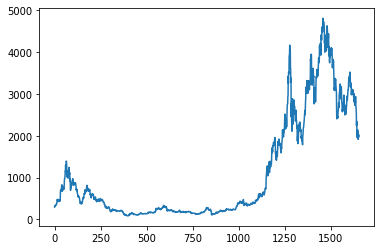

Plot After Scaling


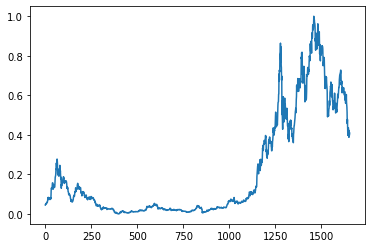

Scaling Delta Close
Plot Before Scaling


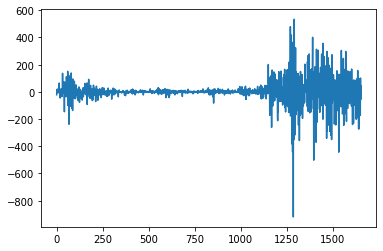

Plot After Scaling


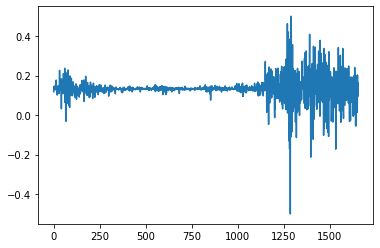

Scaling Delta Pct Close
################################################################
################## Executing for interval  3  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1155 494
Close train shape, test shape  (1155, 3, 1) (1155,)
Close test shape, test shape  (494, 3, 1) (494,)

Delta Close train, test length  1155 494
Close train shape, test shape  (1155, 3, 1) (1155,)
Close test shape, test shape  (494, 3, 1) (494,)

Delta Percentage Close train, test length  1155 494
Close train shape, test sh

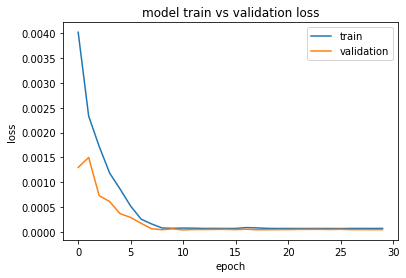

(LSTM) Fit Model for Delta Close. Interval =  3
Model Summary
Model: "sequential_326"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_434 (LSTM)             (None, 100)               40800     
                                                                 
 dense_505 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


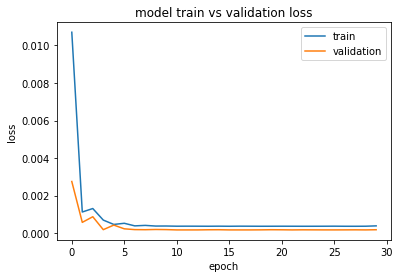

(LSTM) Fit Model for Delta Pct Change Close. Interval =  3
Model Summary
Model: "sequential_327"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_435 (LSTM)             (None, 100)               40800     
                                                                 
 dense_506 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


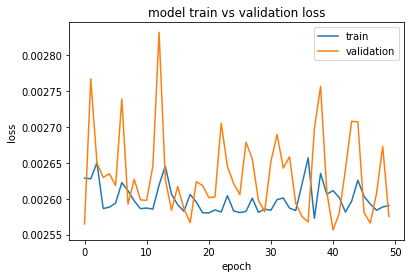

(Stacked LSTM) Fit Model for Close. Interval =  3
Model Summary
Model: "sequential_328"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_436 (LSTM)             (None, 3, 100)            40800     
                                                                 
 lstm_437 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_204 (Dropout)       (None, 100)               0         
                                                                 
 dense_507 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


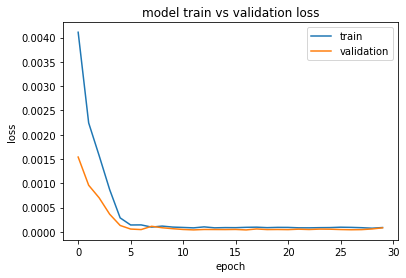

(Stacked LSTM) Fit Model for Delta Close. Interval =  3
Model Summary
Model: "sequential_329"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_438 (LSTM)             (None, 3, 100)            40800     
                                                                 
 lstm_439 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_205 (Dropout)       (None, 100)               0         
                                                                 
 dense_508 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


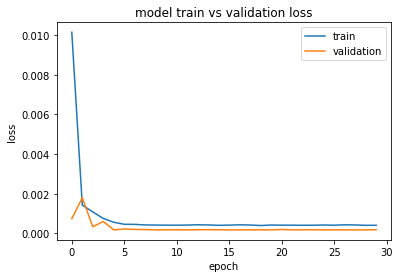

(Stacked LSTM) Fit Model for Delta Pct Change Close. Interval =  3
Model Summary
Model: "sequential_330"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_440 (LSTM)             (None, 3, 100)            40800     
                                                                 
 lstm_441 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_206 (Dropout)       (None, 100)               0         
                                                                 
 dense_509 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


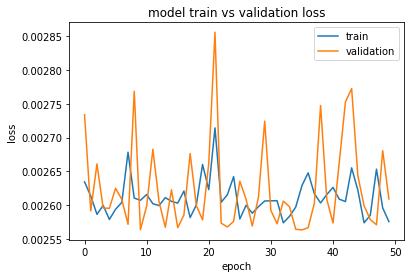

(CNN-LSTM) Fit Model for Close. Interval =  3
Model Summary
Model: "sequential_331"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_108 (Conv1D)         (None, 1, 8)              32        
                                                                 
 lstm_442 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_207 (Dropout)       (None, 100)               0         
                                                                 
 dense_510 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


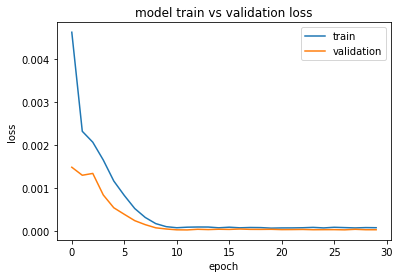

(CNN-LSTM) Fit Model for Delta Close. Interval =  3
Model Summary
Model: "sequential_332"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_109 (Conv1D)         (None, 1, 8)              32        
                                                                 
 lstm_443 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_208 (Dropout)       (None, 100)               0         
                                                                 
 dense_511 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


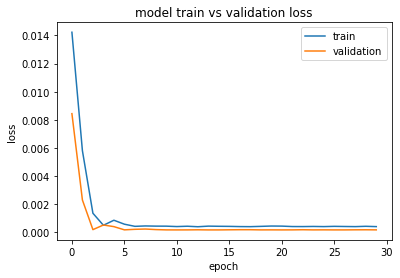

(CNN-LSTM) Fit Model for Delta Pct Change Close. Interval =  3
Model Summary
Model: "sequential_333"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_110 (Conv1D)         (None, 1, 8)              32        
                                                                 
 lstm_444 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_209 (Dropout)       (None, 100)               0         
                                                                 
 dense_512 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


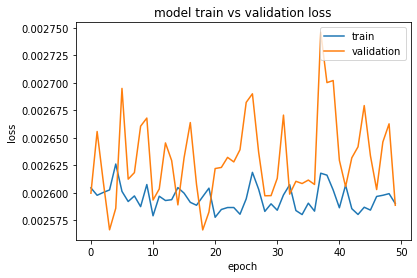

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.049158      316.716003     302.283020
1  0.053582      337.631012     308.516052
2  0.052678      333.356995     312.607086
3  0.052163      330.924011     323.332916
4  0.052474      332.394012     330.817719
5  0.055693      347.612000     328.280579
6  0.057126      354.385986     330.609772
7  0.059737      366.730011     338.061768
8  0.058398      360.401001     349.772552
9  0.062681      380.652008     356.097778

Test


y_test  y_test_actual  test_predict
0  0.239890    1218.453003   1089.398560
1  0.230029    1171.834595   1117.140747
2  0.243080    1233.537598   1180.723389
3  0.242368    1230.172241   1216.322998
4  0.248102    1257.279541   1216.811035
5  0.273487    1377.295898   1249.525391
6  0.274540    1382.274048   1281.637573
7  0.219397    1121.570923   1339.580688
8  0.243709    1236.512207   1345.701050
9  0.242541    1230.990601   1274.358521

RMSE Train = 36.78268431364809
RMSE Test = 209.51867139356938
MAPE Train = 0.053866106555276794
MAPE Test = 0.056630890774837024
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


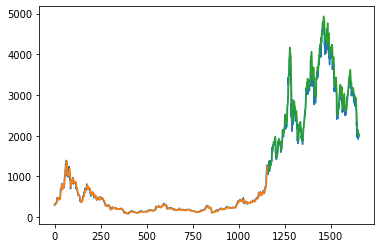

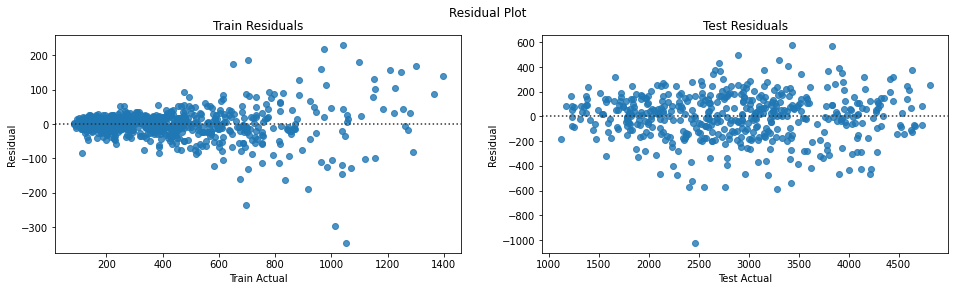

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.138639        8.808013       5.337370
1  0.146969       20.915009       8.302331
2  0.129638       -4.274017       8.251306
3  0.130904       -2.432984       9.475879
4  0.133590        1.470001       8.388592
5  0.143049       15.217988       6.030406
6  0.137239        6.773986       7.591492
7  0.141072       12.344025       8.842898
8  0.128224       -6.329010       9.907078
9  0.146512       20.251007       8.230905

Test


y_test  y_test_actual  test_predict
0  0.192929      87.713623    -11.287895
1  0.100503     -46.618408     16.450552
2  0.175033      61.703003     22.122770
3  0.130263      -3.365357     16.008718
4  0.151229      27.107300      7.501549
5  0.215155     120.016357     15.100863
6  0.136004       4.978150     17.406811
7 -0.046796    -260.703125     22.281195
8  0.211663     114.941284      2.471969
9  0.128779      -5.521606    -11.364530

RMSE Train = 25.946437438165866
RMSE Test = 143.76399761338314
MAPE Train = 8.47320185240637
MAPE Test = 1.325717103573056
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


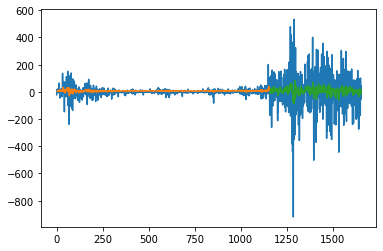

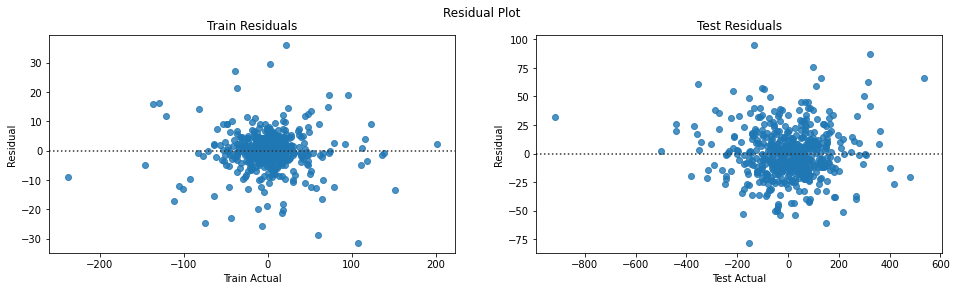

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.028606        0.028606       0.002201
1  0.066037        0.066037       0.003966
2 -0.012659       -0.012659       0.004205
3 -0.007298       -0.007298       0.006626
4  0.004442        0.004442       0.004374
5  0.045783        0.045783       0.001854
6  0.019487        0.019487       0.003263
7  0.034832        0.034832       0.005260
8 -0.017258       -0.017258       0.005804
9  0.056190        0.056190       0.004735

Test


y_test  y_test_actual  test_predict
0  0.077572       0.077572     -0.003288
1 -0.038260      -0.038260      0.006210
2  0.052655       0.052655      0.008835
3 -0.002728      -0.002728      0.004525
4  0.022035       0.022035      0.003636
5  0.095457       0.095457      0.004802
6  0.003614       0.003614      0.005079
7 -0.188605      -0.188605      0.008023
8  0.102482       0.102482      0.003621
9 -0.004465      -0.004465     -0.004741

RMSE Train = 0.050812040327702215
RMSE Test = 0.05089776181447926
MAPE Train = 1.5920156688375753
MAPE Test = 1.132647568179587
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


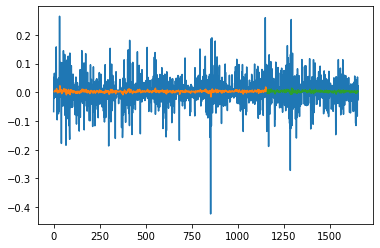

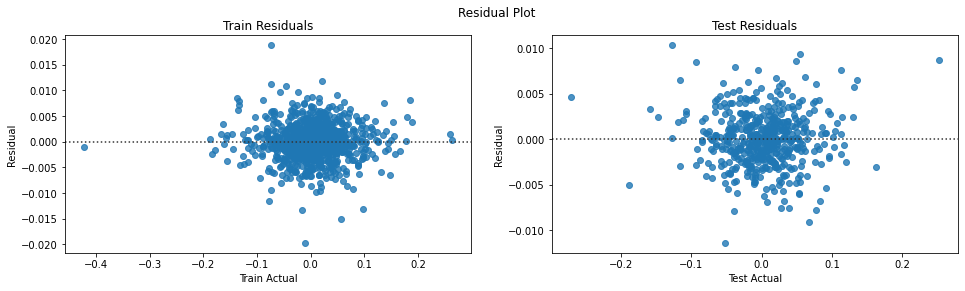

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.049158      316.716003     286.347382
1  0.053582      337.631012     292.616333
2  0.052678      333.356995     296.283691
3  0.052163      330.924011     306.391785
4  0.052474      332.394012     313.915619
5  0.055693      347.612000     311.458405
6  0.057126      354.385986     313.609650
7  0.059737      366.730011     320.539490
8  0.058398      360.401001     331.846405
9  0.062681      380.652008     337.830688

Test


y_test  y_test_actual  test_predict
0  0.239890    1218.453003   1032.764404
1  0.230029    1171.834595   1056.739380
2  0.243080    1233.537598   1116.604736
3  0.242368    1230.172241   1151.743652
4  0.248102    1257.279541   1150.686890
5  0.273487    1377.295898   1182.211792
6  0.274540    1382.274048   1211.541382
7  0.219397    1121.570923   1264.467529
8  0.243709    1236.512207   1272.547363
9  0.242541    1230.990601   1209.143799

RMSE Train = 44.299484703963344
RMSE Test = 227.36244904527635
MAPE Train = 0.08630536901984547
MAPE Test = 0.06481144451762658
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


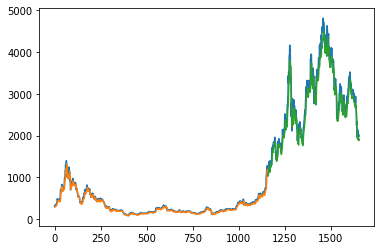

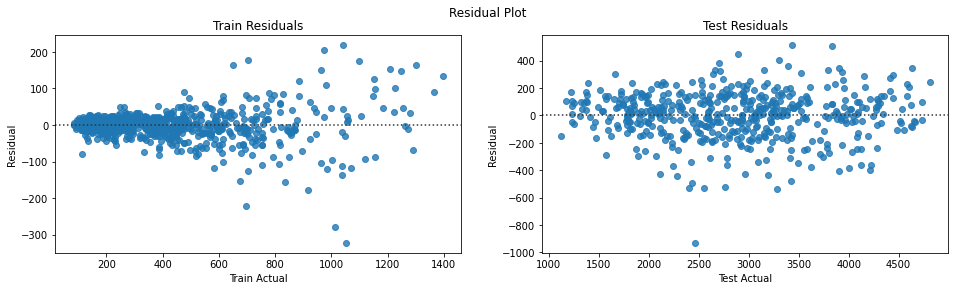

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.138639        8.808013      -2.910583
1  0.146969       20.915009      -0.652216
2  0.129638       -4.274017      -0.872428
3  0.130904       -2.432984       0.187094
4  0.133590        1.470001      -0.513154
5  0.143049       15.217988      -2.347621
6  0.137239        6.773986      -1.288900
7  0.141072       12.344025      -0.348385
8  0.128224       -6.329010       0.464893
9  0.146512       20.251007      -0.695899

Test


y_test  y_test_actual  test_predict
0  0.192929      87.713623    -15.935287
1  0.100503     -46.618408      4.399909
2  0.175033      61.703003      9.761258
3  0.130263      -3.365357      5.020112
4  0.151229      27.107300     -1.549308
5  0.215155     120.016357      4.356789
6  0.136004       4.978150      5.210675
7 -0.046796    -260.703125      9.295408
8  0.211663     114.941284     -3.071410
9  0.128779      -5.521606    -15.020068

RMSE Train = 25.27885974116992
RMSE Test = 142.73485397379667
MAPE Train = 3.574198173939181
MAPE Test = 1.1829915125434776
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


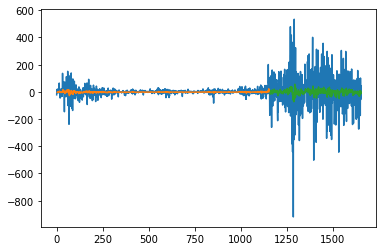

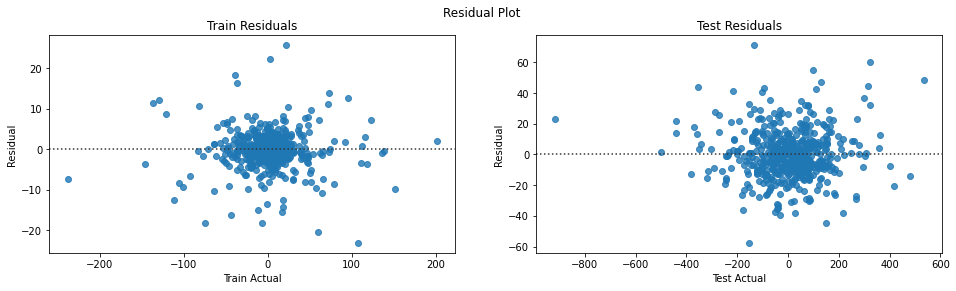

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.028606        0.028606      -0.000750
1  0.066037        0.066037       0.004248
2 -0.012659       -0.012659       0.003997
3 -0.007298       -0.007298       0.006067
4  0.004442        0.004442       0.004252
5  0.045783        0.045783       0.000297
6  0.019487        0.019487       0.002786
7  0.034832        0.034832       0.004734
8 -0.017258       -0.017258       0.006346
9  0.056190        0.056190       0.003672

Test


y_test  y_test_actual  test_predict
0  0.077572       0.077572     -0.006019
1 -0.038260      -0.038260      0.006130
2  0.052655       0.052655      0.009011
3 -0.002728      -0.002728      0.005791
4  0.022035       0.022035      0.001740
5  0.095457       0.095457      0.005082
6  0.003614       0.003614      0.005857
7 -0.188605      -0.188605      0.007867
8  0.102482       0.102482      0.000161
9 -0.004465      -0.004465     -0.004838

RMSE Train = 0.050911676323043185
RMSE Test = 0.05109985137018798
MAPE Train = 1.6102617265193488
MAPE Test = 1.1545303320400646
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


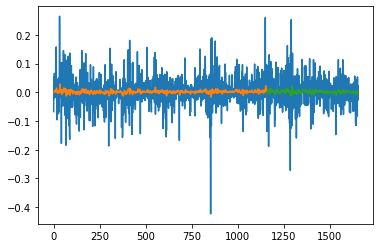

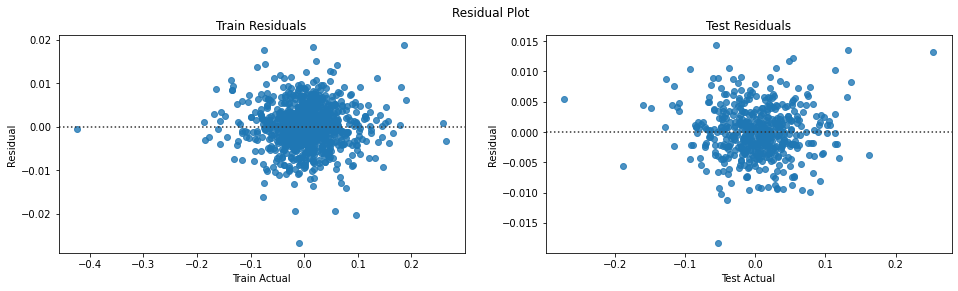

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.049158      316.716003     308.328064
1  0.053582      337.631012     313.299408
2  0.052678      333.356995     322.063416
3  0.052163      330.924011     330.391205
4  0.052474      332.394012     333.738098
5  0.055693      347.612000     332.225525
6  0.057126      354.385986     337.535095
7  0.059737      366.730011     345.788147
8  0.058398      360.401001     356.813690
9  0.062681      380.652008     360.807129

Test


y_test  y_test_actual  test_predict
0  0.239890    1218.453003   1097.414185
1  0.230029    1171.834595   1149.074585
2  0.243080    1233.537598   1189.751831
3  0.242368    1230.172241   1221.065552
4  0.248102    1257.279541   1229.248535
5  0.273487    1377.295898   1256.214111
6  0.274540    1382.274048   1310.513428
7  0.219397    1121.570923   1365.451416
8  0.243709    1236.512207   1304.354736
9  0.242541    1230.990601   1251.294067

RMSE Train = 32.45972823365233
RMSE Test = 247.4898912607682
MAPE Train = 0.04576953385633256
MAPE Test = 0.06477348376755483
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


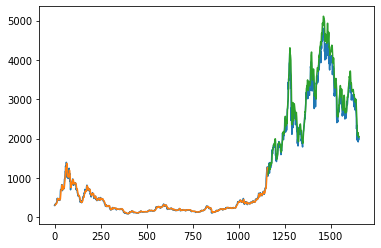

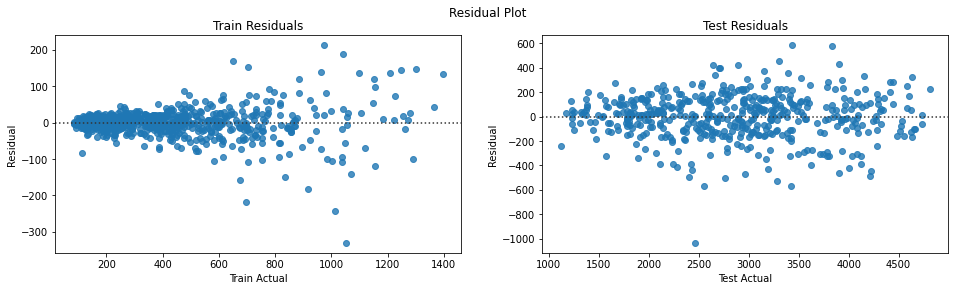

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.138639        8.808013      -1.174419
1  0.146969       20.915009       0.549920
2  0.129638       -4.274017       2.688370
3  0.130904       -2.432984       1.416345
4  0.133590        1.470001      -0.413054
5  0.143049       15.217988      -1.048373
6  0.137239        6.773986       1.349619
7  0.141072       12.344025       1.904957
8  0.128224       -6.329010       2.493150
9  0.146512       20.251007       0.093707

Test


y_test  y_test_actual  test_predict
0  0.192929      87.713623     -3.277328
1  0.100503     -46.618408     18.195118
2  0.175033      61.703003      7.180240
3  0.130263      -3.365357      7.350662
4  0.151229      27.107300      2.965108
5  0.215155     120.016357      5.928530
6  0.136004       4.978150     18.388779
7 -0.046796    -260.703125     14.489779
8  0.211663     114.941284    -29.249636
9  0.128779      -5.521606    -13.035494

RMSE Train = 25.273986306473567
RMSE Test = 144.97873847346196
MAPE Train = 2.6010706989343944
MAPE Test = 1.2749726552927316
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


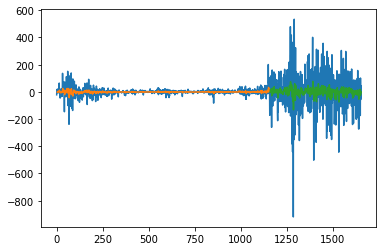

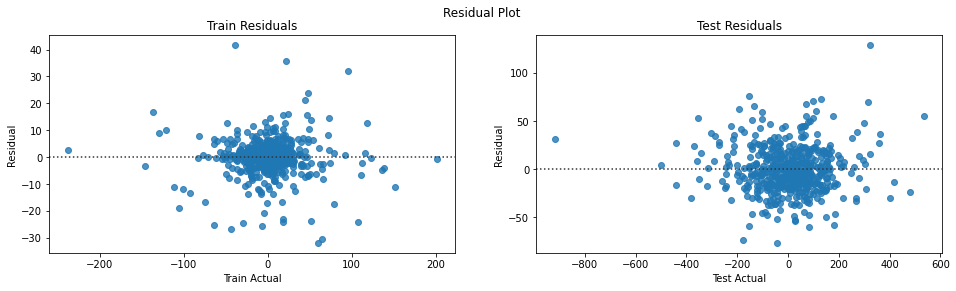

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.028606        0.028606       0.000825
1  0.066037        0.066037       0.006094
2 -0.012659       -0.012659       0.004220
3 -0.007298       -0.007298       0.007318
4  0.004442        0.004442       0.006704
5  0.045783        0.045783       0.002351
6  0.019487        0.019487       0.003815
7  0.034832        0.034832       0.005646
8 -0.017258       -0.017258       0.007388
9  0.056190        0.056190       0.005521

Test


y_test  y_test_actual  test_predict
0  0.077572       0.077572     -0.005256
1 -0.038260      -0.038260      0.005246
2  0.052655       0.052655      0.010597
3 -0.002728      -0.002728      0.007424
4  0.022035       0.022035      0.002957
5  0.095457       0.095457      0.006754
6  0.003614       0.003614      0.005601
7 -0.188605      -0.188605      0.008307
8  0.102482       0.102482      0.006164
9 -0.004465      -0.004465     -0.001879

RMSE Train = 0.05088623782729532
RMSE Test = 0.0509758625014318
MAPE Train = 1.7242092010940444
MAPE Test = 1.1886680451182436
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


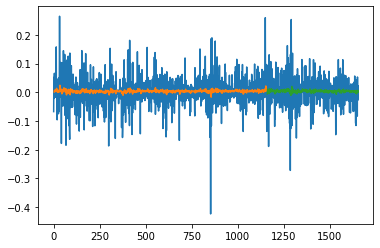

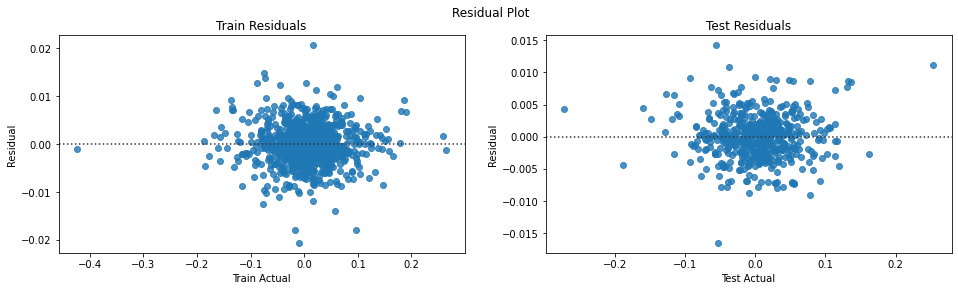

----------------------------


model  interval                            target  rmse_train  \
0          LSTM       3.0                             Close   36.782684   
1          LSTM       3.0             Change in Close Price   25.946437   
2          LSTM       3.0  Percentage Change in Close Price    0.050812   
3  Stacked LSTM       3.0                             Close   44.299485   
4  Stacked LSTM       3.0             Change in Close Price   25.278860   
5  Stacked LSTM       3.0  Percentage Change in Close Price    0.050912   
6      CNN-LSTM       3.0                             Close   32.459728   
7      CNN-LSTM       3.0             Change in Close Price   25.273986   
8      CNN-LSTM       3.0  Percentage Change in Close Price    0.050886   

    rmse_test  mape_train  mape_test  
0  209.518671    0.053866   0.056631  
1  143.763998    8.473202   1.325717  
2    0.050898    1.592016   1.132648  
3  227.362449    0.086305   0.064811  
4  142.734854    3.574198   1.182992  
5    0.051100    1.610262   1.154530  
6  247.489891    0.045770   0.064773  
7  144.978738    2.601071   1.274973  
8    0.050976    1.724209   1.188668

################################################################
################## Executing for interval  5  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1153 492
Close train shape, test shape  (1153, 5, 1) (1153,)
Close test shape, test shape  (492, 5, 1) (492,)

Delta Close train, test length  1153 492
Close train shape, test shape  (1153, 5, 1) (1153,)
Close test shape, test shape  (492, 5, 1) (492,)

Delta Percentage Close train, test length  1153 492
Close train shape, test shape  (1153, 5, 1) (1153,

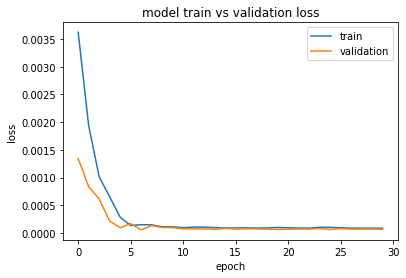

(LSTM) Fit Model for Delta Close. Interval =  5
Model Summary
Model: "sequential_335"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_446 (LSTM)             (None, 100)               40800     
                                                                 
 dense_514 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


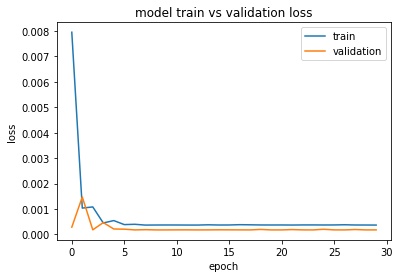

(LSTM) Fit Model for Delta Pct Change Close. Interval =  5
Model Summary
Model: "sequential_336"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_447 (LSTM)             (None, 100)               40800     
                                                                 
 dense_515 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


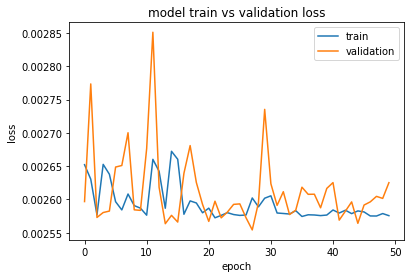

(Stacked LSTM) Fit Model for Close. Interval =  5
Model Summary
Model: "sequential_337"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_448 (LSTM)             (None, 5, 100)            40800     
                                                                 
 lstm_449 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_210 (Dropout)       (None, 100)               0         
                                                                 
 dense_516 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


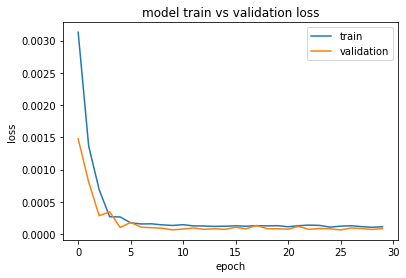

(Stacked LSTM) Fit Model for Delta Close. Interval =  5
Model Summary
Model: "sequential_338"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_450 (LSTM)             (None, 5, 100)            40800     
                                                                 
 lstm_451 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_211 (Dropout)       (None, 100)               0         
                                                                 
 dense_517 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


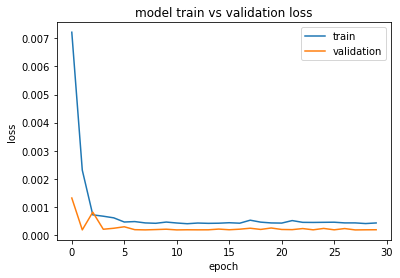

(Stacked LSTM) Fit Model for Delta Pct Change Close. Interval =  5
Model Summary
Model: "sequential_339"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_452 (LSTM)             (None, 5, 100)            40800     
                                                                 
 lstm_453 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_212 (Dropout)       (None, 100)               0         
                                                                 
 dense_518 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


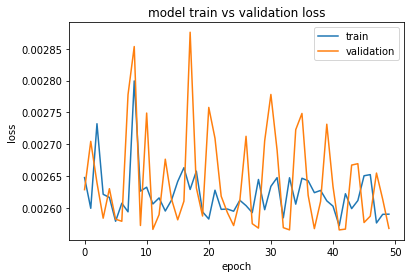

(CNN-LSTM) Fit Model for Close. Interval =  5
Model Summary
Model: "sequential_340"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_111 (Conv1D)         (None, 3, 8)              32        
                                                                 
 lstm_454 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_213 (Dropout)       (None, 100)               0         
                                                                 
 dense_519 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


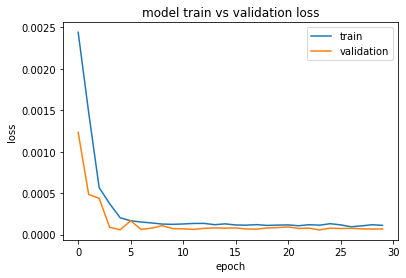

(CNN-LSTM) Fit Model for Delta Close. Interval =  5
Model Summary
Model: "sequential_341"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_112 (Conv1D)         (None, 3, 8)              32        
                                                                 
 lstm_455 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_214 (Dropout)       (None, 100)               0         
                                                                 
 dense_520 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


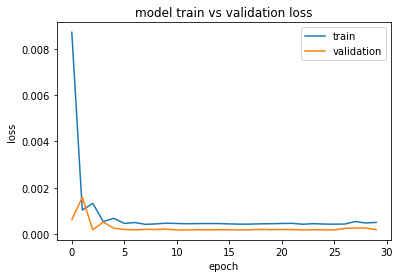

(CNN-LSTM) Fit Model for Delta Pct Change Close. Interval =  5
Model Summary
Model: "sequential_342"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_113 (Conv1D)         (None, 3, 8)              32        
                                                                 
 lstm_456 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_215 (Dropout)       (None, 100)               0         
                                                                 
 dense_521 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


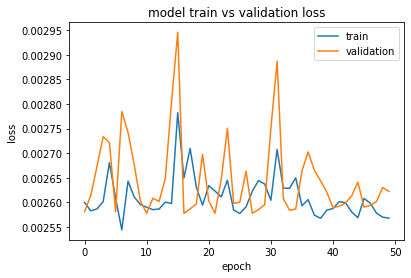

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.052678      333.356995     315.604431
1  0.052163      330.924011     322.887299
2  0.052474      332.394012     327.076477
3  0.055693      347.612000     332.211578
4  0.057126      354.385986     337.203094
5  0.059737      366.730011     340.154541
6  0.058398      360.401001     346.500885
7  0.062681      380.652008     353.410950
8  0.068924      410.165985     362.184296
9  0.082619      474.911011     372.915009

Test


y_test  y_test_actual  test_predict
0  0.243080    1233.537598   1127.259155
1  0.242368    1230.172241   1156.730713
2  0.248102    1257.279541   1195.924438
3  0.273487    1377.295898   1220.592651
4  0.274540    1382.274048   1246.532837
5  0.219397    1121.570923   1290.409912
6  0.243709    1236.512207   1288.928955
7  0.242541    1230.990601   1284.285767
8  0.276515    1391.609375   1272.318726
9  0.262302    1324.414795   1261.911865

RMSE Train = 42.50123804740075
RMSE Test = 214.90749675027465
MAPE Train = 0.0616546130000893
MAPE Test = 0.05954357180584944
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


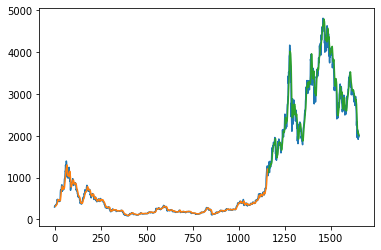

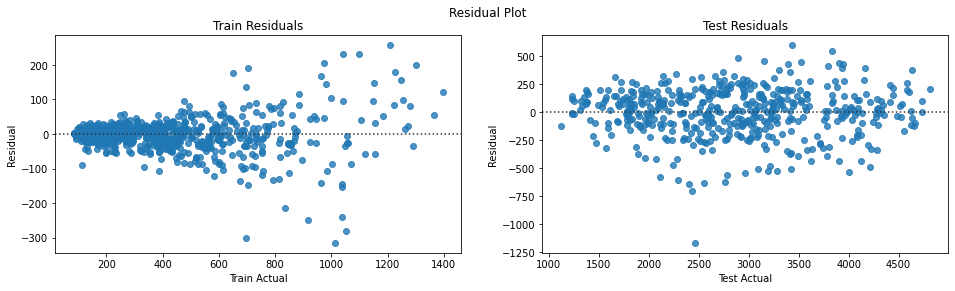

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.129638       -4.274017       1.447683
1  0.130904       -2.432984       3.158292
2  0.133590        1.470001       1.973113
3  0.143049       15.217988       2.163243
4  0.137239        6.773986       2.208854
5  0.141072       12.344025       1.678096
6  0.128224       -6.329010       2.896107
7  0.146512       20.251007       2.966234
8  0.152885       29.513977       3.596853
9  0.177126       64.745026       4.542133

Test


y_test  y_test_actual  test_predict
0  0.175033      61.703003     -2.577687
1  0.130263      -3.365357     11.181766
2  0.151229      27.107300     14.016565
3  0.215155     120.016357      9.095446
4  0.136004       4.978150     10.528709
5 -0.046796    -260.703125     16.706326
6  0.211663     114.941284     -0.938960
7  0.128779      -5.521606     -3.092959
8  0.243091     160.618774     -4.435608
9  0.086346     -67.194580     -1.684060

RMSE Train = 25.360747980405996
RMSE Test = 144.1230308087264
MAPE Train = 2.1163456431006624
MAPE Test = 1.2769274611382089
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


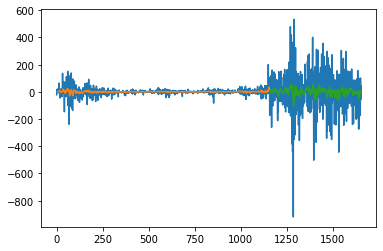

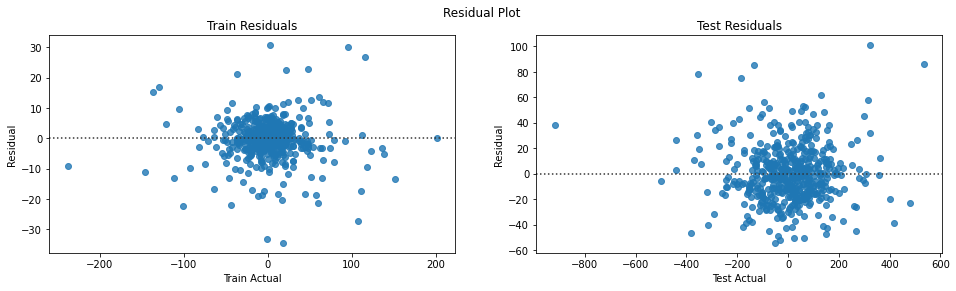

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0 -0.012659       -0.012659      -0.000482
1 -0.007298       -0.007298       0.001717
2  0.004442        0.004442       0.000101
3  0.045783        0.045783      -0.000185
4  0.019487        0.019487      -0.000275
5  0.034832        0.034832      -0.000110
6 -0.017258       -0.017258       0.000808
7  0.056190        0.056190       0.001056
8  0.077535        0.077535       0.000791
9  0.157851        0.157851       0.001916

Test


y_test  y_test_actual  test_predict
0  0.052655       0.052655     -0.000359
1 -0.002728      -0.002728      0.001251
2  0.022035       0.022035      0.002253
3  0.095457       0.095457      0.000600
4  0.003614       0.003614      0.000808
5 -0.188605      -0.188605      0.003187
6  0.102482       0.102482     -0.000321
7 -0.004465      -0.004465     -0.004139
8  0.130479       0.130479     -0.002128
9 -0.048286      -0.048286     -0.001366

RMSE Train = 0.050928422118765866
RMSE Test = 0.05095618579834046
MAPE Train = 1.5168136666449317
MAPE Test = 1.0409873460582455
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


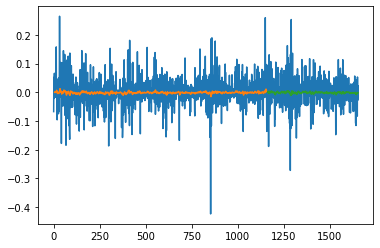

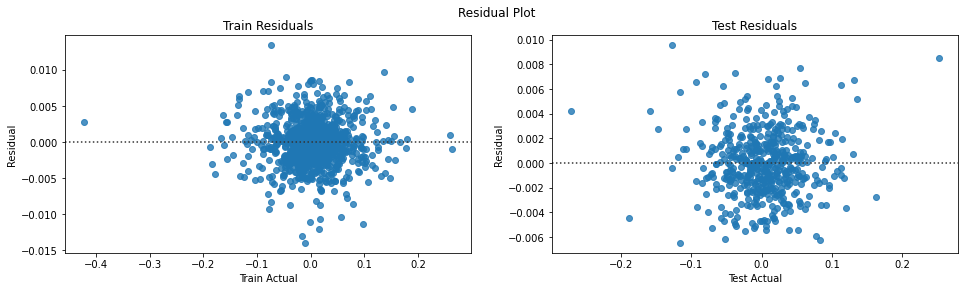

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.052678      333.356995     307.349640
1  0.052163      330.924011     314.515198
2  0.052474      332.394012     318.589935
3  0.055693      347.612000     324.003723
4  0.057126      354.385986     329.078125
5  0.059737      366.730011     331.606293
6  0.058398      360.401001     337.527069
7  0.062681      380.652008     344.373474
8  0.068924      410.165985     353.127350
9  0.082619      474.911011     363.314056

Test


y_test  y_test_actual  test_predict
0  0.243080    1233.537598   1093.968872
1  0.242368    1230.172241   1121.658936
2  0.248102    1257.279541   1161.121582
3  0.273487    1377.295898   1185.563843
4  0.274540    1382.274048   1208.277954
5  0.219397    1121.570923   1249.916626
6  0.243709    1236.512207   1251.495483
7  0.242541    1230.990601   1250.088989
8  0.276515    1391.609375   1240.411743
9  0.262302    1324.414795   1226.128662

RMSE Train = 44.90045181842818
RMSE Test = 240.2012182883602
MAPE Train = 0.061132235746344875
MAPE Test = 0.06819079108037876
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


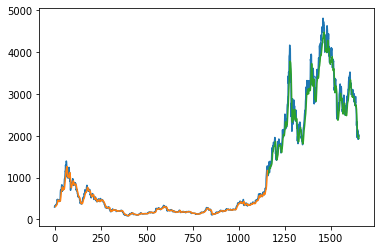

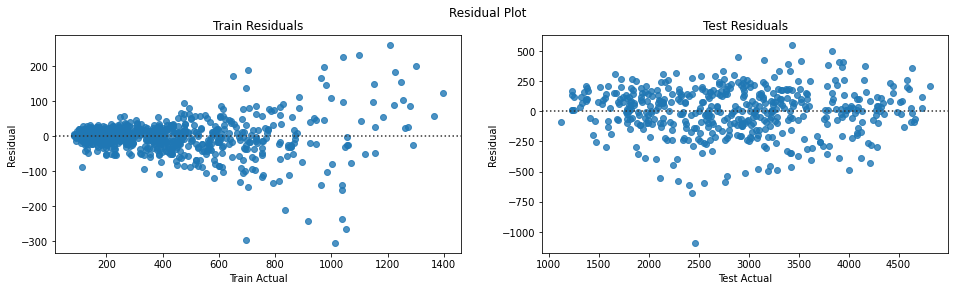

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.129638       -4.274017      -0.946258
1  0.130904       -2.432984       0.439143
2  0.133590        1.470001      -0.370908
3  0.143049       15.217988      -0.066535
4  0.137239        6.773986      -0.111236
5  0.141072       12.344025      -0.713311
6  0.128224       -6.329010       0.158788
7  0.146512       20.251007       0.339064
8  0.152885       29.513977       0.842728
9  0.177126       64.745026       1.288480

Test


y_test  y_test_actual  test_predict
0  0.175033      61.703003     -5.403000
1  0.130263      -3.365357      5.838522
2  0.151229      27.107300      8.640294
3  0.215155     120.016357      4.873036
4  0.136004       4.978150      4.783895
5 -0.046796    -260.703125      9.494180
6  0.211663     114.941284     -1.475911
7  0.128779      -5.521606     -2.152596
8  0.243091     160.618774     -4.055392
9  0.086346     -67.194580     -4.511236

RMSE Train = 25.320904966651355
RMSE Test = 143.12938005687843
MAPE Train = 2.796975594809472
MAPE Test = 1.1521592656336195
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


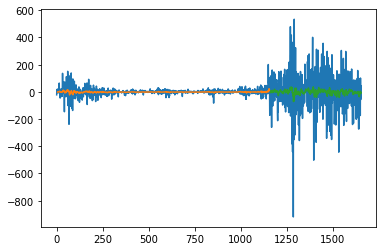

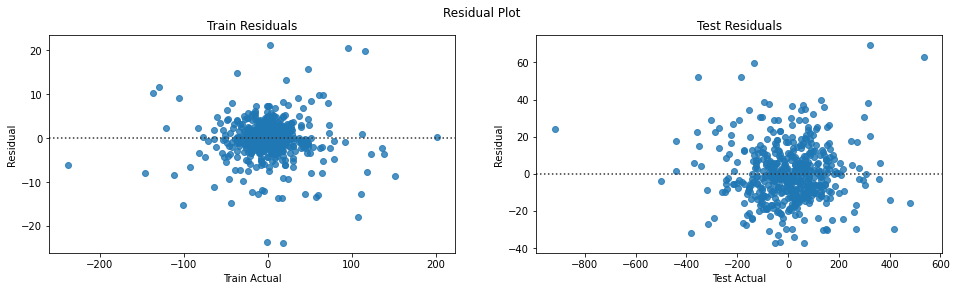

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0 -0.012659       -0.012659       0.006429
1 -0.007298       -0.007298       0.007313
2  0.004442        0.004442       0.006249
3  0.045783        0.045783       0.006374
4  0.019487        0.019487       0.006661
5  0.034832        0.034832       0.006250
6 -0.017258       -0.017258       0.007102
7  0.056190        0.056190       0.006848
8  0.077535        0.077535       0.007522
9  0.157851        0.157851       0.008346

Test


y_test  y_test_actual  test_predict
0  0.052655       0.052655      0.005036
1 -0.002728      -0.002728      0.007702
2  0.022035       0.022035      0.008072
3  0.095457       0.095457      0.007021
4  0.003614       0.003614      0.007677
5 -0.188605      -0.188605      0.008485
6  0.102482       0.102482      0.004027
7 -0.004465      -0.004465      0.004944
8  0.130479       0.130479      0.004872
9 -0.048286      -0.048286      0.006222

RMSE Train = 0.05091921001047269
RMSE Test = 0.05092456012120753
MAPE Train = 2.0158328972708723
MAPE Test = 1.2374319314494697
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


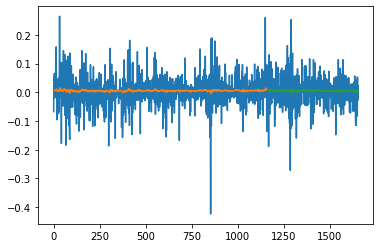

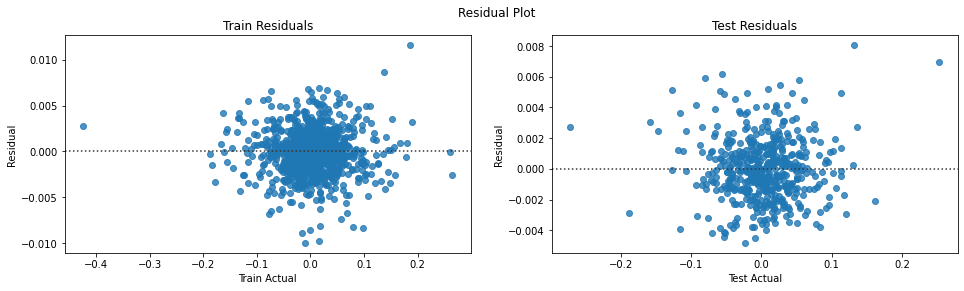

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.052678      333.356995     311.840790
1  0.052163      330.924011     318.850098
2  0.052474      332.394012     325.707214
3  0.055693      347.612000     329.567078
4  0.057126      354.385986     332.294067
5  0.059737      366.730011     335.740784
6  0.058398      360.401001     343.661041
7  0.062681      380.652008     351.236053
8  0.068924      410.165985     359.570343
9  0.082619      474.911011     368.703186

Test


y_test  y_test_actual  test_predict
0  0.243080    1233.537598   1124.291626
1  0.242368    1230.172241   1165.135376
2  0.248102    1257.279541   1191.688354
3  0.273487    1377.295898   1214.410400
4  0.274540    1382.274048   1242.063110
5  0.219397    1121.570923   1283.426392
6  0.243709    1236.512207   1298.275635
7  0.242541    1230.990601   1288.354736
8  0.276515    1391.609375   1240.069092
9  0.262302    1324.414795   1239.388184

RMSE Train = 42.05673270232921
RMSE Test = 205.71558872131573
MAPE Train = 0.05754661616895049
MAPE Test = 0.05784348379451806
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


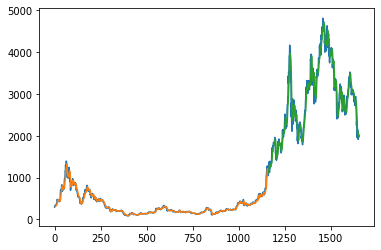

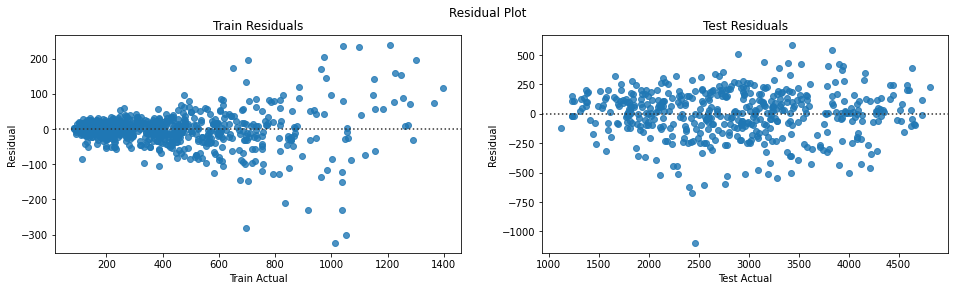

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.129638       -4.274017      -1.807854
1  0.130904       -2.432984      -0.356420
2  0.133590        1.470001      -1.511689
3  0.143049       15.217988      -2.072615
4  0.137239        6.773986      -2.419848
5  0.141072       12.344025      -1.606332
6  0.128224       -6.329010      -0.675844
7  0.146512       20.251007      -0.398738
8  0.152885       29.513977      -1.068861
9  0.177126       64.745026       0.565535

Test


y_test  y_test_actual  test_predict
0  0.175033      61.703003      3.175033
1  0.130263      -3.365357      7.006916
2  0.151229      27.107300      8.513360
3  0.215155     120.016357      2.644644
4  0.136004       4.978150      6.862916
5 -0.046796    -260.703125     14.384264
6  0.211663     114.941284      0.473513
7  0.128779      -5.521606    -17.195194
8  0.243091     160.618774    -10.942871
9  0.086346     -67.194580     -6.517034

RMSE Train = 25.70585302710073
RMSE Test = 143.56061307409945
MAPE Train = 5.614296621478482
MAPE Test = 1.2541811118600894
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


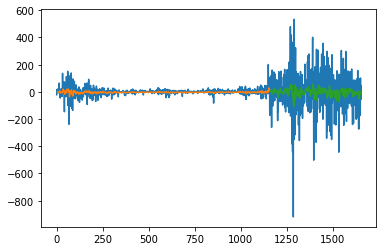

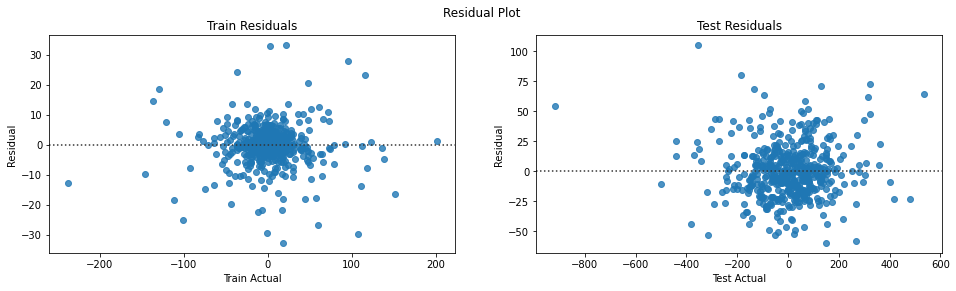

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0 -0.012659       -0.012659      -0.000738
1 -0.007298       -0.007298       0.006692
2  0.004442        0.004442       0.000439
3  0.045783        0.045783      -0.000982
4  0.019487        0.019487       0.002136
5  0.034832        0.034832       0.002742
6 -0.017258       -0.017258       0.003001
7  0.056190        0.056190       0.002356
8  0.077535        0.077535       0.001828
9  0.157851        0.157851       0.004255

Test


y_test  y_test_actual  test_predict
0  0.052655       0.052655      0.003860
1 -0.002728      -0.002728     -0.000818
2  0.022035       0.022035      0.003663
3  0.095457       0.095457      0.004287
4  0.003614       0.003614      0.000935
5 -0.188605      -0.188605      0.008680
6  0.102482       0.102482      0.000783
7 -0.004465      -0.004465     -0.011873
8  0.130479       0.130479      0.001352
9 -0.048286      -0.048286      0.006484

RMSE Train = 0.050841852546938966
RMSE Test = 0.05110417092324766
MAPE Train = 1.6680331530568002
MAPE Test = 1.0945427616951648
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


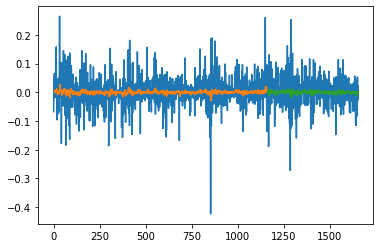

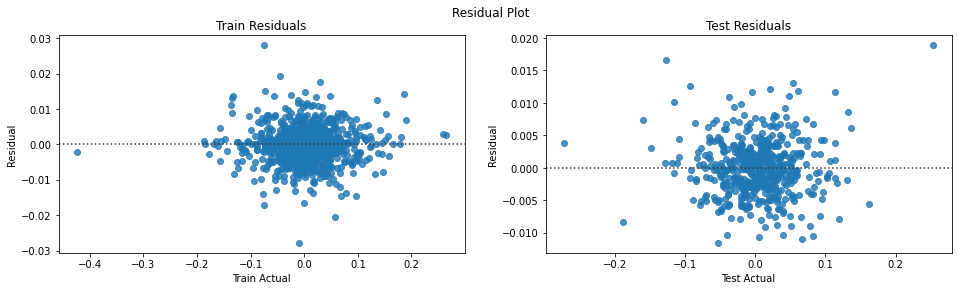

----------------------------


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   36.782684   
1           LSTM       3.0             Change in Close Price   25.946437   
2           LSTM       3.0  Percentage Change in Close Price    0.050812   
3   Stacked LSTM       3.0                             Close   44.299485   
4   Stacked LSTM       3.0             Change in Close Price   25.278860   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050912   
6       CNN-LSTM       3.0                             Close   32.459728   
7       CNN-LSTM       3.0             Change in Close Price   25.273986   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050886   
9           LSTM       5.0                             Close   42.501238   
10          LSTM       5.0             Change in Close Price   25.360748   
11          LSTM       5.0  Percentage Change in Close Price    0.050928   
12  Stacked LSTM       5.0                             Close   44.900452   
13  Stacked LSTM       5.0             Change in Close Price   25.320905   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050919   
15      CNN-LSTM       5.0                             Close   42.056733   
16      CNN-LSTM       5.0             Change in Close Price   25.705853   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050842   

     rmse_test  mape_train  mape_test  
0   209.518671    0.053866   0.056631  
1   143.763998    8.473202   1.325717  
2     0.050898    1.592016   1.132648  
3   227.362449    0.086305   0.064811  
4   142.734854    3.574198   1.182992  
5     0.051100    1.610262   1.154530  
6   247.489891    0.045770   0.064773  
7   144.978738    2.601071   1.274973  
8     0.050976    1.724209   1.188668  
9   214.907497    0.061655   0.059544  
10  144.123031    2.116346   1.276927  
11    0.050956    1.516814   1.040987  
12  240.201218    0.061132   0.068191  
13  143.129380    2.796976   1.152159  
14    0.050925    2.015833   1.237432  
15  205.715589    0.057547   0.057843  
16  143.560613    5.614297   1.254181  
17    0.051104    1.668033   1.094543

################################################################
################## Executing for interval  10  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1148 487
Close train shape, test shape  (1148, 10, 1) (1148,)
Close test shape, test shape  (487, 10, 1) (487,)

Delta Close train, test length  1148 487
Close train shape, test shape  (1148, 10, 1) (1148,)
Close test shape, test shape  (487, 10, 1) (487,)

Delta Percentage Close train, test length  1148 487
Close train shape, test shape  (1148, 10, 1) 

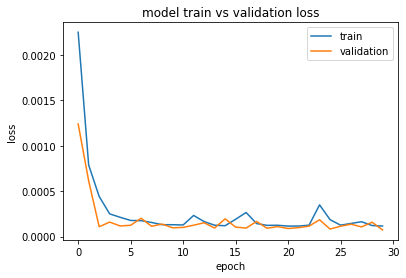

(LSTM) Fit Model for Delta Close. Interval =  10
Model Summary
Model: "sequential_344"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_458 (LSTM)             (None, 100)               40800     
                                                                 
 dense_523 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


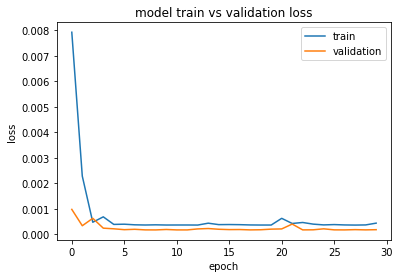

(LSTM) Fit Model for Delta Pct Change Close. Interval =  10
Model Summary
Model: "sequential_345"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_459 (LSTM)             (None, 100)               40800     
                                                                 
 dense_524 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


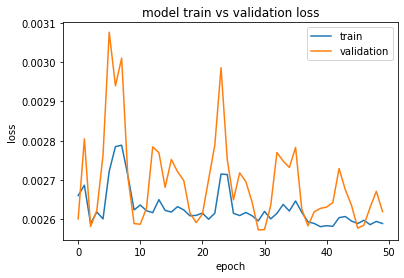

(Stacked LSTM) Fit Model for Close. Interval =  10
Model Summary
Model: "sequential_346"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_460 (LSTM)             (None, 10, 100)           40800     
                                                                 
 lstm_461 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_216 (Dropout)       (None, 100)               0         
                                                                 
 dense_525 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


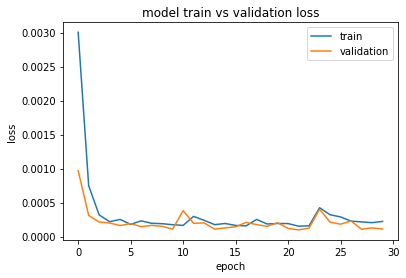

(Stacked LSTM) Fit Model for Delta Close. Interval =  10
Model Summary
Model: "sequential_347"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_462 (LSTM)             (None, 10, 100)           40800     
                                                                 
 lstm_463 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_217 (Dropout)       (None, 100)               0         
                                                                 
 dense_526 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


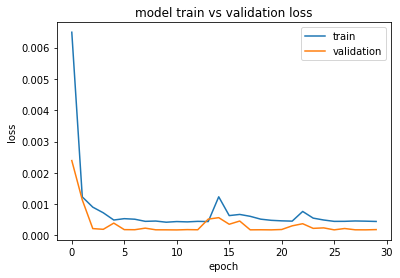

(Stacked LSTM) Fit Model for Delta Pct Change Close. Interval =  10
Model Summary
Model: "sequential_348"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_464 (LSTM)             (None, 10, 100)           40800     
                                                                 
 lstm_465 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_218 (Dropout)       (None, 100)               0         
                                                                 
 dense_527 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


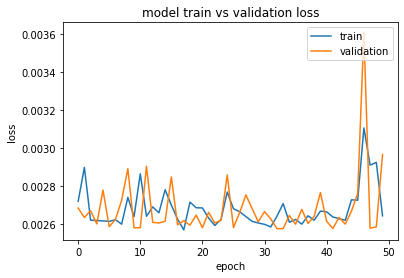

(CNN-LSTM) Fit Model for Close. Interval =  10
Model Summary
Model: "sequential_349"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_114 (Conv1D)         (None, 8, 8)              32        
                                                                 
 lstm_466 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_219 (Dropout)       (None, 100)               0         
                                                                 
 dense_528 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


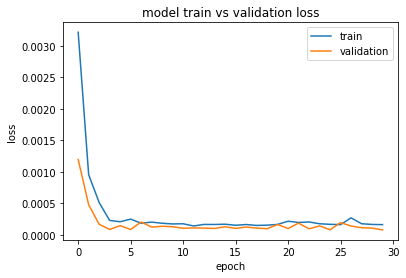

(CNN-LSTM) Fit Model for Delta Close. Interval =  10
Model Summary
Model: "sequential_350"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_115 (Conv1D)         (None, 8, 8)              32        
                                                                 
 lstm_467 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_220 (Dropout)       (None, 100)               0         
                                                                 
 dense_529 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


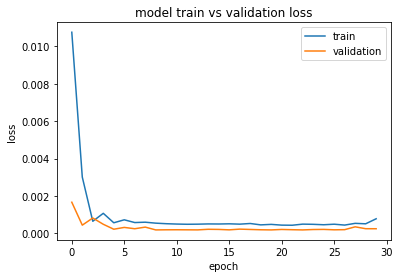

(CNN-LSTM) Fit Model for Delta Pct Change Close. Interval =  10
Model Summary
Model: "sequential_351"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_116 (Conv1D)         (None, 8, 8)              32        
                                                                 
 lstm_468 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_221 (Dropout)       (None, 100)               0         
                                                                 
 dense_530 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


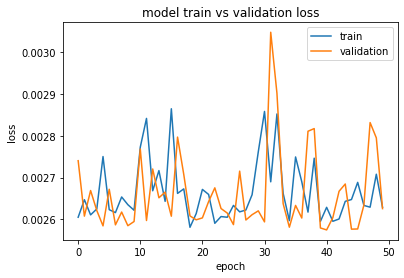

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.059737      366.730011     341.651642
1  0.058398      360.401001     348.676117
2  0.062681      380.652008     354.015442
3  0.068924      410.165985     361.444092
4  0.082619      474.911011     372.682709
5  0.080792      466.276001     393.310791
6  0.081861      471.329987     412.826050
7  0.083770      480.355011     430.843262
8  0.082194      472.902008     447.231140
9  0.072595      427.523010     459.296356

Test


y_test  y_test_actual  test_predict
0  0.219397    1121.570923   1292.853149
1  0.243709    1236.512207   1284.928467
2  0.242541    1230.990601   1284.355347
3  0.276515    1391.609375   1279.761841
4  0.262302    1324.414795   1299.429810
5  0.269207    1357.058105   1312.632812
6  0.247236    1253.187134   1328.813843
7  0.264011    1332.492188   1327.241821
8  0.274593    1382.522827   1333.768433
9  0.273238    1376.115479   1347.201904

RMSE Train = 45.63960364581251
RMSE Test = 238.57583821657795
MAPE Train = 0.06677920861086603
MAPE Test = 0.06590247373886443
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


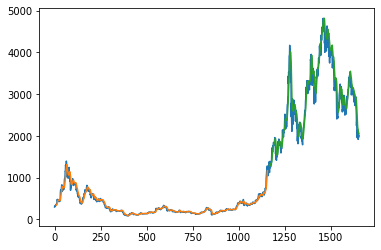

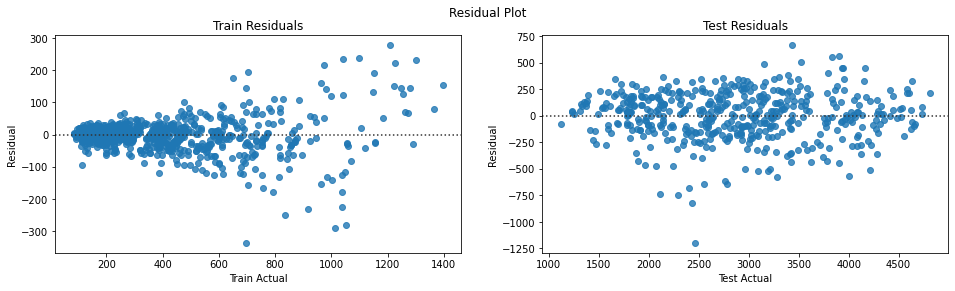

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.141072       12.344025       8.162034
1  0.128224       -6.329010       8.978279
2  0.146512       20.251007       8.609606
3  0.152885       29.513977       9.144521
4  0.177126       64.745026      10.100932
5  0.126637       -8.635010      12.470705
6  0.136056        5.053986      13.427224
7  0.138788        9.025024      13.527671
8  0.127450       -7.453003      13.251345
9  0.101356      -45.378998      12.105907

Test


y_test  y_test_actual  test_predict
0 -0.046796    -260.703125     17.295015
1  0.211663     114.941284     11.276214
2  0.128779      -5.521606      9.490627
3  0.243091     160.618774      6.687080
4  0.086346     -67.194580     10.490202
5  0.155038      32.643310     11.846951
6  0.061111    -103.870971     11.853816
7  0.187144      79.305054      8.519186
8  0.167002      50.030639      8.518644
9  0.128170      -6.407348      8.927969

RMSE Train = 25.96732508277379
RMSE Test = 143.62701797007145
MAPE Train = 8.621505829739213
MAPE Test = 1.325482879083327
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


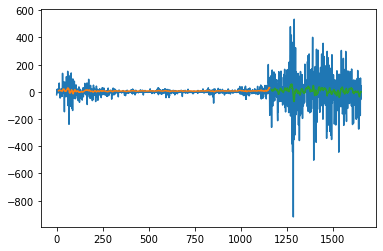

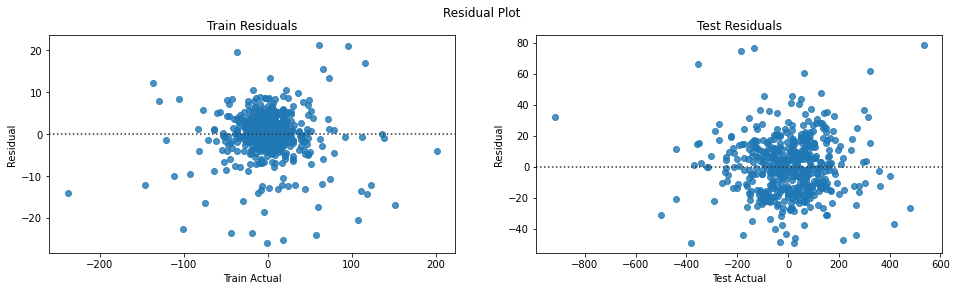

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.034832        0.034832       0.001014
1 -0.017258       -0.017258       0.001222
2  0.056190        0.056190       0.001857
3  0.077535        0.077535       0.000744
4  0.157851        0.157851       0.001504
5 -0.018182       -0.018182       0.003052
6  0.010839        0.010839       0.006764
7  0.019148        0.019148       0.005308
8 -0.015516       -0.015516       0.003607
9 -0.095959       -0.095959       0.002597

Test


y_test  y_test_actual  test_predict
0 -0.188605      -0.188605      0.003285
1  0.102482       0.102482      0.003345
2 -0.004465      -0.004465     -0.003259
3  0.130479       0.130479     -0.001386
4 -0.048286      -0.048286     -0.001058
5  0.024647       0.024647      0.002765
6 -0.076541      -0.076541      0.001578
7  0.063283       0.063283      0.001584
8  0.037547       0.037547     -0.001235
9 -0.004635      -0.004635     -0.000044

RMSE Train = 0.050940509495357514
RMSE Test = 0.05077704268249324
MAPE Train = 1.2631129645362513
MAPE Test = 1.0333190151665521
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


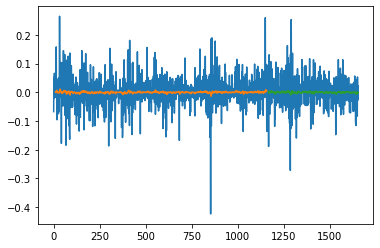

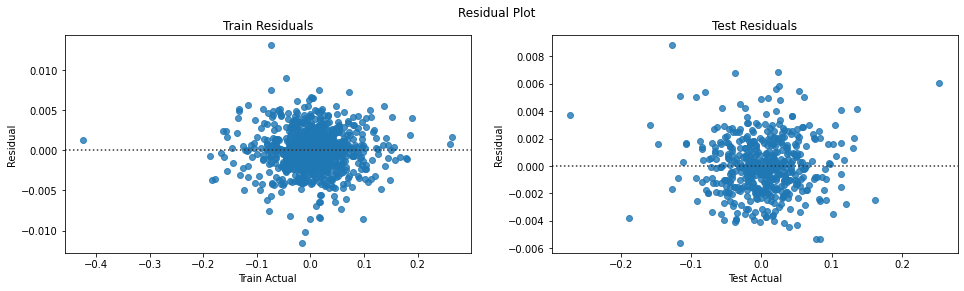

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.059737      366.730011     333.473297
1  0.058398      360.401001     339.664856
2  0.062681      380.652008     345.058441
3  0.068924      410.165985     351.640411
4  0.082619      474.911011     360.921967
5  0.080792      466.276001     376.983124
6  0.081861      471.329987     394.904846
7  0.083770      480.355011     412.500854
8  0.082194      472.902008     428.886597
9  0.072595      427.523010     441.995270

Test


y_test  y_test_actual  test_predict
0  0.219397    1121.570923   1213.580933
1  0.243709    1236.512207   1220.398193
2  0.242541    1230.990601   1222.437256
3  0.276515    1391.609375   1219.394653
4  0.262302    1324.414795   1229.756348
5  0.269207    1357.058105   1241.772827
6  0.247236    1253.187134   1255.551147
7  0.264011    1332.492188   1259.388794
8  0.274593    1382.522827   1264.548950
9  0.273238    1376.115479   1273.830688

RMSE Train = 50.50172811515397
RMSE Test = 280.80263407249146
MAPE Train = 0.07444027338595453
MAPE Test = 0.07749333311177323
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


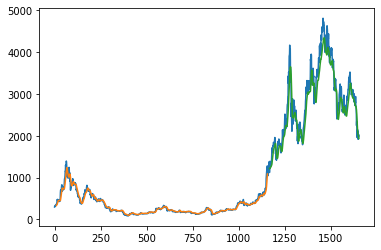

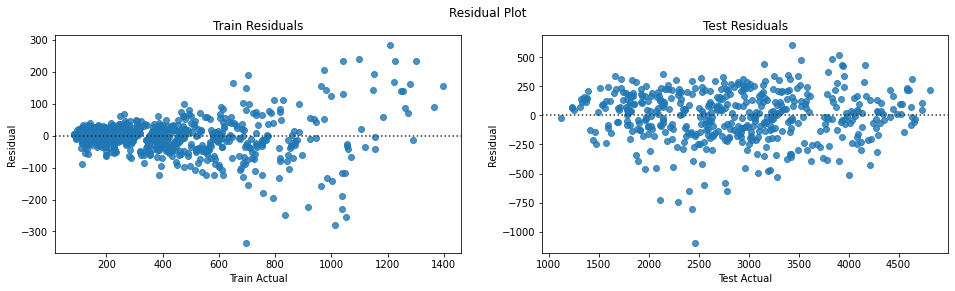

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.141072       12.344025      -0.850533
1  0.128224       -6.329010      -0.371796
2  0.146512       20.251007      -0.600910
3  0.152885       29.513977      -0.272952
4  0.177126       64.745026       0.281130
5  0.126637       -8.635010       1.639243
6  0.136056        5.053986       2.143925
7  0.138788        9.025024       2.208984
8  0.127450       -7.453003       2.079494
9  0.101356      -45.378998       1.429491

Test


y_test  y_test_actual  test_predict
0 -0.046796    -260.703125      4.311547
1  0.211663     114.941284      0.720559
2  0.128779      -5.521606      0.047902
3  0.243091     160.618774     -1.560635
4  0.086346     -67.194580      0.605775
5  0.155038      32.643310      1.250558
6  0.061111    -103.870971      1.237650
7  0.187144      79.305054     -0.723339
8  0.167002      50.030639     -0.595019
9  0.128170      -6.407348     -0.395035

RMSE Train = 25.345591083143553
RMSE Test = 142.80615268392248
MAPE Train = 3.1701285543110704
MAPE Test = 1.1220544855550243
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


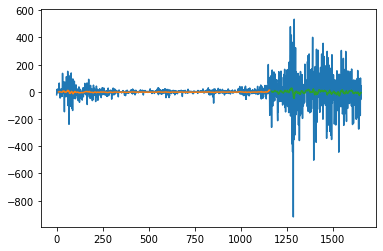

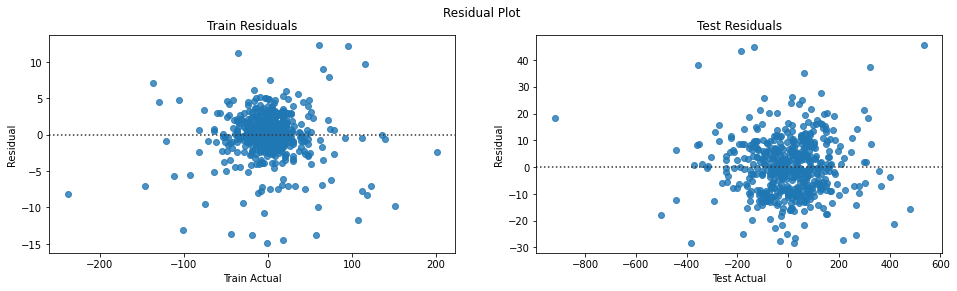

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.034832        0.034832      -0.011607
1 -0.017258       -0.017258      -0.011441
2  0.056190        0.056190      -0.011803
3  0.077535        0.077535      -0.011480
4  0.157851        0.157851      -0.010634
5 -0.018182       -0.018182      -0.008723
6  0.010839        0.010839      -0.009199
7  0.019148        0.019148      -0.009996
8 -0.015516       -0.015516      -0.010660
9 -0.095959       -0.095959      -0.011552

Test


y_test  y_test_actual  test_predict
0 -0.188605      -0.188605     -0.010581
1  0.102482       0.102482     -0.013629
2 -0.004465      -0.004465     -0.013243
3  0.130479       0.130479     -0.013014
4 -0.048286      -0.048286     -0.011181
5  0.024647       0.024647     -0.011582
6 -0.076541      -0.076541     -0.011563
7  0.063283       0.063283     -0.012810
8  0.037547       0.037547     -0.012409
9 -0.004635      -0.004635     -0.011769

RMSE Train = 0.053115101601948225
RMSE Test = 0.05286871767415529
MAPE Train = 3.948709951248029
MAPE Test = 1.6529941962518664
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


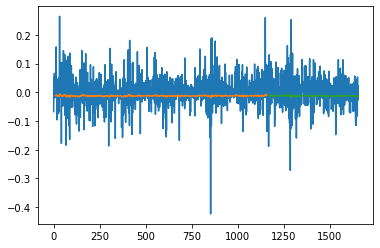

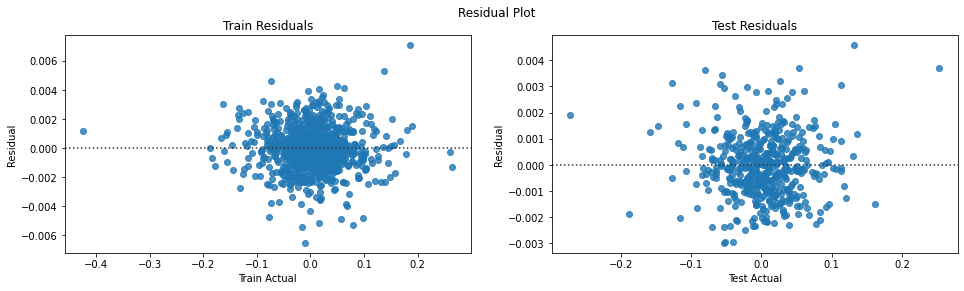

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.059737      366.730011     338.019989
1  0.058398      360.401001     344.702637
2  0.062681      380.652008     351.671997
3  0.068924      410.165985     357.369965
4  0.082619      474.911011     367.279968
5  0.080792      466.276001     384.858978
6  0.081861      471.329987     409.728210
7  0.083770      480.355011     428.840973
8  0.082194      472.902008     445.623444
9  0.072595      427.523010     459.305634

Test


y_test  y_test_actual  test_predict
0  0.219397    1121.570923   1295.761108
1  0.243709    1236.512207   1312.981812
2  0.242541    1230.990601   1288.307007
3  0.276515    1391.609375   1285.446167
4  0.262302    1324.414795   1291.080811
5  0.269207    1357.058105   1318.411987
6  0.247236    1253.187134   1331.525879
7  0.264011    1332.492188   1339.940186
8  0.274593    1382.522827   1333.264771
9  0.273238    1376.115479   1346.964966

RMSE Train = 47.01463816100926
RMSE Test = 238.97169132529083
MAPE Train = 0.06567878580740998
MAPE Test = 0.066336096860393
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


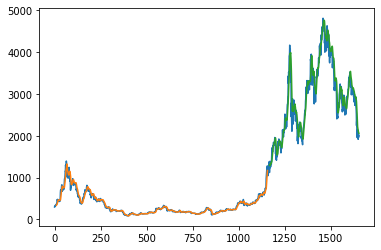

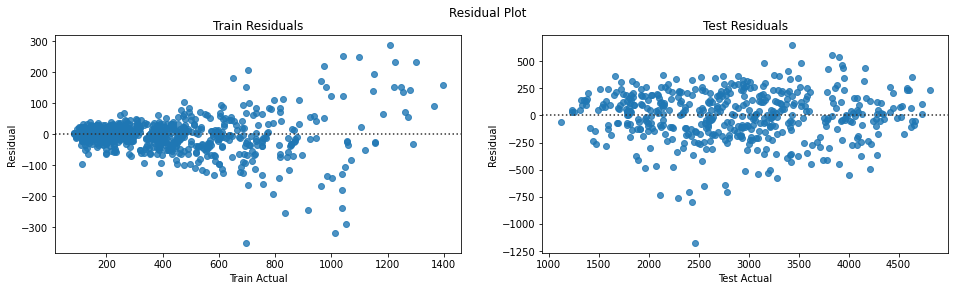

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.141072       12.344025      15.253396
1  0.128224       -6.329010      16.055433
2  0.146512       20.251007      16.234562
3  0.152885       29.513977      16.742687
4  0.177126       64.745026      16.601265
5  0.126637       -8.635010      18.240316
6  0.136056        5.053986      20.313902
7  0.138788        9.025024      23.428755
8  0.127450       -7.453003      23.192257
9  0.101356      -45.378998      22.104383

Test


y_test  y_test_actual  test_predict
0 -0.046796    -260.703125     25.632566
1  0.211663     114.941284     29.191025
2  0.128779      -5.521606     26.783678
3  0.243091     160.618774     11.328039
4  0.086346     -67.194580     12.943139
5  0.155038      32.643310     13.593770
6  0.061111    -103.870971     20.851568
7  0.187144      79.305054     18.310638
8  0.167002      50.030639     17.789583
9  0.128170      -6.407348     14.202991

RMSE Train = 28.52813161364809
RMSE Test = 144.6985741953395
MAPE Train = 18.064119838577994
MAPE Test = 1.5100256669278231
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


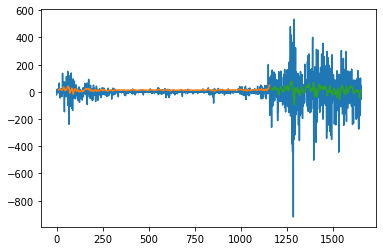

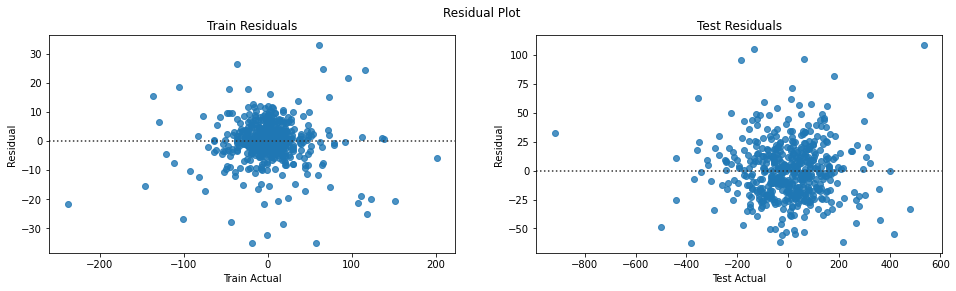

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.034832        0.034832       0.000490
1 -0.017258       -0.017258       0.001244
2  0.056190        0.056190       0.001119
3  0.077535        0.077535       0.000093
4  0.157851        0.157851       0.000591
5 -0.018182       -0.018182       0.003128
6  0.010839        0.010839       0.005584
7  0.019148        0.019148       0.003544
8 -0.015516       -0.015516      -0.000991
9 -0.095959       -0.095959      -0.001994

Test


y_test  y_test_actual  test_predict
0 -0.188605      -0.188605      0.002433
1  0.102482       0.102482      0.001481
2 -0.004465      -0.004465     -0.005165
3  0.130479       0.130479     -0.004426
4 -0.048286      -0.048286      0.001006
5  0.024647       0.024647      0.003475
6 -0.076541      -0.076541      0.003149
7  0.063283       0.063283     -0.000120
8  0.037547       0.037547     -0.001523
9 -0.004635      -0.004635     -0.000737

RMSE Train = 0.051011607900310445
RMSE Test = 0.05082819582484533
MAPE Train = 1.3264126188196323
MAPE Test = 1.0322763273044595
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


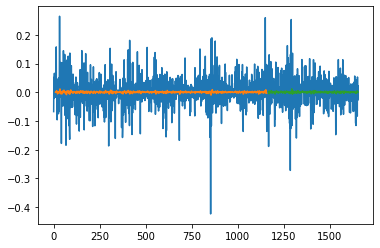

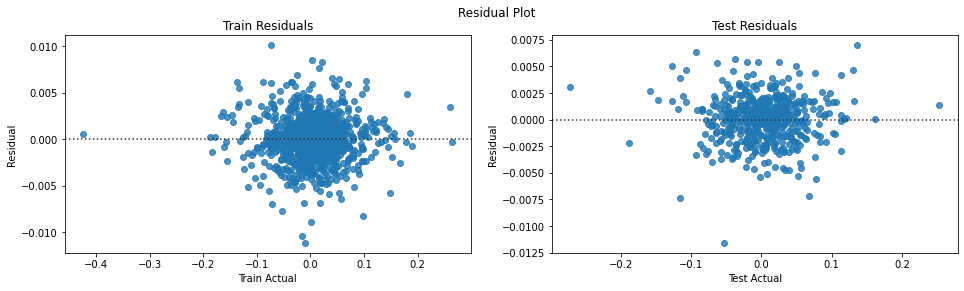

----------------------------


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   36.782684   
1           LSTM       3.0             Change in Close Price   25.946437   
2           LSTM       3.0  Percentage Change in Close Price    0.050812   
3   Stacked LSTM       3.0                             Close   44.299485   
4   Stacked LSTM       3.0             Change in Close Price   25.278860   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050912   
6       CNN-LSTM       3.0                             Close   32.459728   
7       CNN-LSTM       3.0             Change in Close Price   25.273986   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050886   
9           LSTM       5.0                             Close   42.501238   
10          LSTM       5.0             Change in Close Price   25.360748   
11          LSTM       5.0  Percentage Change in Close Price    0.050928   
12  Stacked LSTM       5.0                             Close   44.900452   
13  Stacked LSTM       5.0             Change in Close Price   25.320905   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050919   
15      CNN-LSTM       5.0                             Close   42.056733   
16      CNN-LSTM       5.0             Change in Close Price   25.705853   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050842   
18          LSTM      10.0                             Close   45.639604   
19          LSTM      10.0             Change in Close Price   25.967325   
20          LSTM      10.0  Percentage Change in Close Price    0.050941   
21  Stacked LSTM      10.0                             Close   50.501728   
22  Stacked LSTM      10.0             Change in Close Price   25.345591   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.053115   
24      CNN-LSTM      10.0                             Close   47.014638   
25      CNN-LSTM      10.0             Change in Close Price   28.528132   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051012   

     rmse_test  mape_train  mape_test  
0   209.518671    0.053866   0.056631  
1   143.763998    8.473202   1.325717  
2     0.050898    1.592016   1.132648  
3   227.362449    0.086305   0.064811  
4   142.734854    3.574198   1.182992  
5     0.051100    1.610262   1.154530  
6   247.489891    0.045770   0.064773  
7   144.978738    2.601071   1.274973  
8     0.050976    1.724209   1.188668  
9   214.907497    0.061655   0.059544  
10  144.123031    2.116346   1.276927  
11    0.050956    1.516814   1.040987  
12  240.201218    0.061132   0.068191  
13  143.129380    2.796976   1.152159  
14    0.050925    2.015833   1.237432  
15  205.715589    0.057547   0.057843  
16  143.560613    5.614297   1.254181  
17    0.051104    1.668033   1.094543  
18  238.575838    0.066779   0.065902  
19  143.627018    8.621506   1.325483  
20    0.050777    1.263113   1.033319  
21  280.802634    0.074440   0.077493  
22  142.806153    3.170129   1.122054  
23    0.052869    3.948710   1.652994  
24  238.971691    0.065679   0.066336  
25  144.698574   18.064120   1.510026  
26    0.050828    1.326413   1.032276

################################################################
################## Executing for interval  20  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1138 477
Close train shape, test shape  (1138, 20, 1) (1138,)
Close test shape, test shape  (477, 20, 1) (477,)

Delta Close train, test length  1138 477
Close train shape, test shape  (1138, 20, 1) (1138,)
Close test shape, test shape  (477, 20, 1) (477,)

Delta Percentage Close train, test length  1138 477
Close train shape, test shape  (1138, 20, 1) 

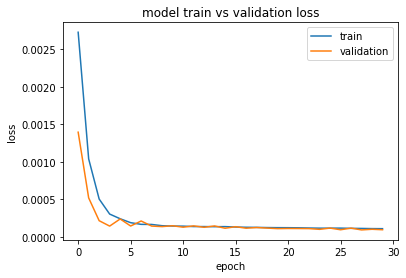

(LSTM) Fit Model for Delta Close. Interval =  20
Model Summary
Model: "sequential_353"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_470 (LSTM)             (None, 100)               40800     
                                                                 
 dense_532 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


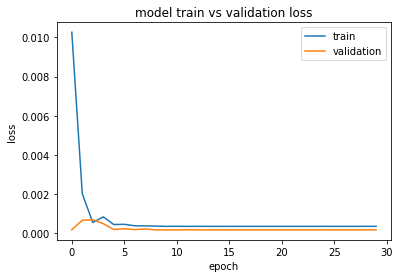

(LSTM) Fit Model for Delta Pct Change Close. Interval =  20
Model Summary
Model: "sequential_354"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_471 (LSTM)             (None, 100)               40800     
                                                                 
 dense_533 (Dense)           (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


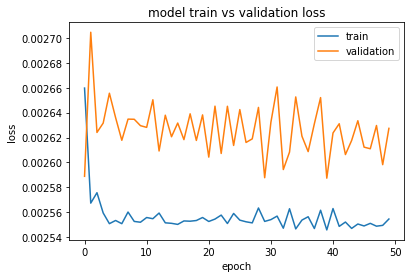

(Stacked LSTM) Fit Model for Close. Interval =  20
Model Summary
Model: "sequential_355"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_472 (LSTM)             (None, 20, 100)           40800     
                                                                 
 lstm_473 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_222 (Dropout)       (None, 100)               0         
                                                                 
 dense_534 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


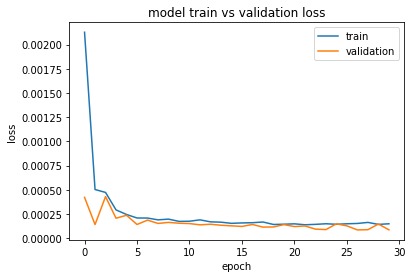

(Stacked LSTM) Fit Model for Delta Close. Interval =  20
Model Summary
Model: "sequential_356"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_474 (LSTM)             (None, 20, 100)           40800     
                                                                 
 lstm_475 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_223 (Dropout)       (None, 100)               0         
                                                                 
 dense_535 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


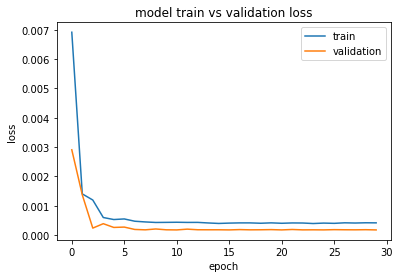

(Stacked LSTM) Fit Model for Delta Pct Change Close. Interval =  20
Model Summary
Model: "sequential_357"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_476 (LSTM)             (None, 20, 100)           40800     
                                                                 
 lstm_477 (LSTM)             (None, 100)               80400     
                                                                 
 dropout_224 (Dropout)       (None, 100)               0         
                                                                 
 dense_536 (Dense)           (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


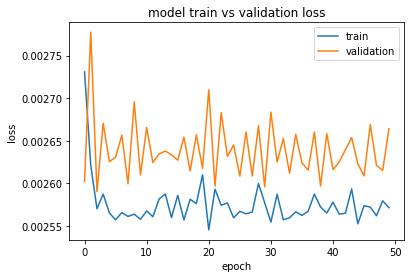

(CNN-LSTM) Fit Model for Close. Interval =  20
Model Summary
Model: "sequential_358"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_117 (Conv1D)         (None, 18, 8)             32        
                                                                 
 lstm_478 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_225 (Dropout)       (None, 100)               0         
                                                                 
 dense_537 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


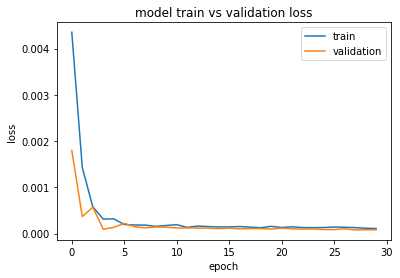

(CNN-LSTM) Fit Model for Delta Close. Interval =  20
Model Summary
Model: "sequential_359"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_118 (Conv1D)         (None, 18, 8)             32        
                                                                 
 lstm_479 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_226 (Dropout)       (None, 100)               0         
                                                                 
 dense_538 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


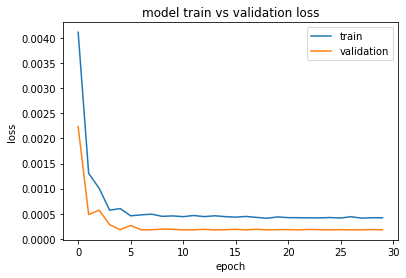

(CNN-LSTM) Fit Model for Delta Pct Change Close. Interval =  20
Model Summary
Model: "sequential_360"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_119 (Conv1D)         (None, 18, 8)             32        
                                                                 
 lstm_480 (LSTM)             (None, 100)               43600     
                                                                 
 dropout_227 (Dropout)       (None, 100)               0         
                                                                 
 dense_539 (Dense)           (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


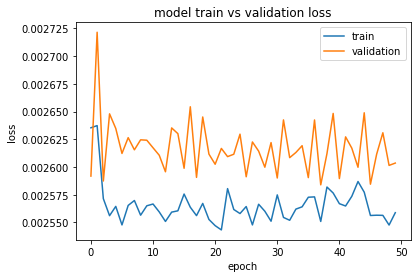

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.076739      447.114014     452.989716
1  0.080848      466.540009     455.756958
2  0.080194      463.449005     458.579590
3  0.080703      465.852997     460.261780
4  0.081623      470.204010     461.463074
5  0.080159      463.281006     462.724548
6  0.072821      428.588013     462.887512
7  0.074052      434.407990     458.470398
8  0.078625      456.031006     453.105194
9  0.082321      473.502014     450.051971

Test


y_test  y_test_actual  test_predict
0  0.260308    1314.986206   1314.592163
1  0.271741    1369.040527   1317.907715
2  0.302655    1515.193726   1324.072021
3  0.333476    1660.909546   1348.073608
4  0.319485    1594.762695   1394.615601
5  0.345689    1718.650879   1438.073975
6  0.337059    1677.846802   1493.352905
7  0.323602    1614.227783   1541.592285
8  0.351605    1746.616821   1574.568848
9  0.356135    1768.035034   1613.547119

RMSE Train = 48.11215677593319
RMSE Test = 236.93587110201048
MAPE Train = 0.06543744510348551
MAPE Test = 0.06665155099989178
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


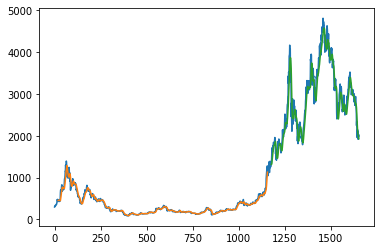

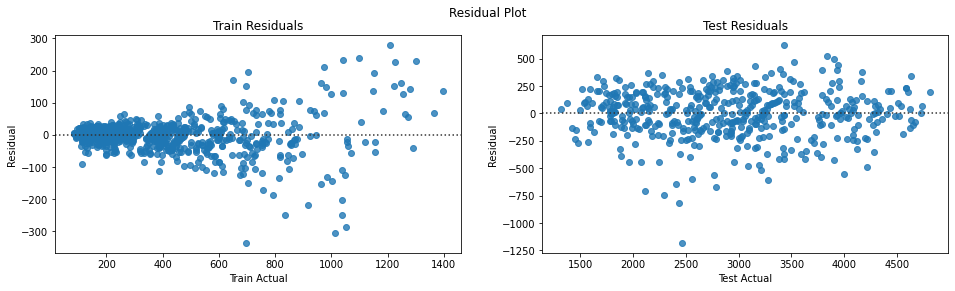

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.146058       19.591004       1.547784
1  0.145944       19.425995       0.304564
2  0.130452       -3.091004       0.061568
3  0.134233        2.403992      -0.012219
4  0.135572        4.351013      -0.172007
5  0.127815       -6.923004      -0.268382
6  0.108708      -34.692993      -0.483938
7  0.136583        5.819977      -1.366888
8  0.147456       21.623016      -2.134534
9  0.144599       17.471008      -2.035559

Test


y_test  y_test_actual  test_predict
0  0.090519     -61.129273      2.451828
1  0.169770      54.054321      1.457841
2  0.233138     146.153199      0.896265
3  0.232837     145.715820      3.552651
4  0.087067     -66.146851      8.757157
5  0.217819     123.888184     11.111119
6  0.104504     -40.804077     12.659319
7  0.088806     -63.619019     12.938677
8  0.223668     132.389038     10.269383
9  0.147315      21.418213      9.431892

RMSE Train = 25.28926293325649
RMSE Test = 143.55060841082914
MAPE Train = 2.8301735480909125
MAPE Test = 1.1728150054773006
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


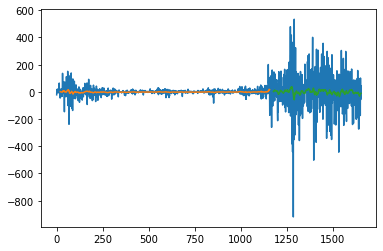

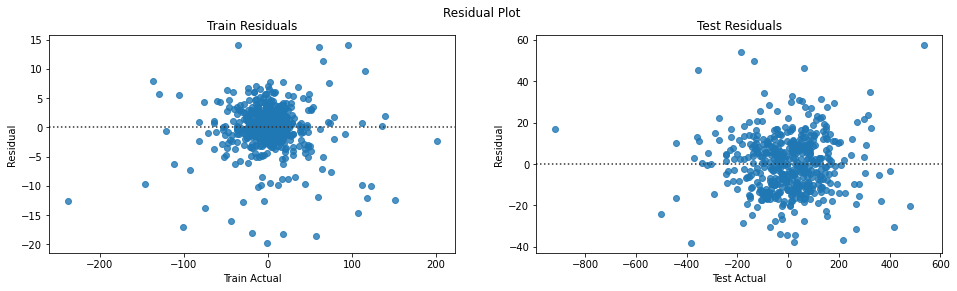

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.045824        0.045824       0.003323
1  0.043448        0.043448      -0.002804
2 -0.006625       -0.006625      -0.003001
3  0.005187        0.005187      -0.000023
4  0.009340        0.009340       0.000822
5 -0.014723       -0.014723       0.001116
6 -0.074885       -0.074885       0.001915
7  0.013579        0.013579       0.001858
8  0.049776        0.049776      -0.002015
9  0.038311        0.038311      -0.002771

Test


y_test  y_test_actual  test_predict
0 -0.044422      -0.044422      0.001428
1  0.041106       0.041106      0.002506
2  0.106756       0.106756     -0.000107
3  0.096170       0.096170     -0.000343
4 -0.039826      -0.039826      0.003653
5  0.077684       0.077684      0.009148
6 -0.023742      -0.023742      0.006432
7 -0.037917      -0.037917      0.007519
8  0.082014       0.082014      0.005067
9  0.012263       0.012263      0.000077

RMSE Train = 0.0507216023826022
RMSE Test = 0.04977318920676179
MAPE Train = 1.5538345984527853
MAPE Test = 1.0733308324133586
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


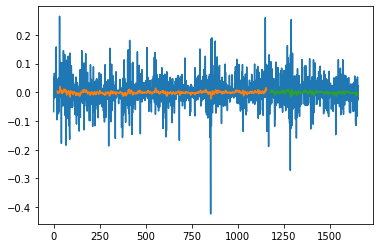

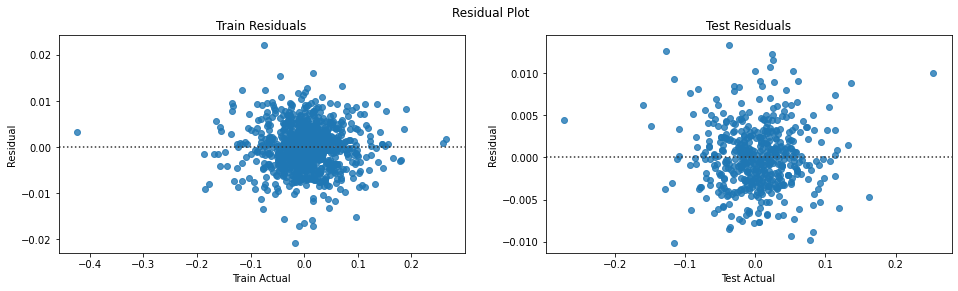

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.076739      447.114014     482.242523
1  0.080848      466.540009     485.077881
2  0.080194      463.449005     487.211975
3  0.080703      465.852997     488.316650
4  0.081623      470.204010     488.954590
5  0.080159      463.281006     489.707520
6  0.072821      428.588013     489.648041
7  0.074052      434.407990     485.538849
8  0.078625      456.031006     479.850159
9  0.082321      473.502014     475.963226

Test


y_test  y_test_actual  test_predict
0  0.260308    1314.986206   1347.233521
1  0.271741    1369.040527   1352.020996
2  0.302655    1515.193726   1357.650635
3  0.333476    1660.909546   1378.635254
4  0.319485    1594.762695   1421.999268
5  0.345689    1718.650879   1467.579468
6  0.337059    1677.846802   1522.885376
7  0.323602    1614.227783   1574.016724
8  0.351605    1746.616821   1610.760376
9  0.356135    1768.035034   1648.637329

RMSE Train = 50.458589175467935
RMSE Test = 251.43700073156253
MAPE Train = 0.10422850927775522
MAPE Test = 0.06929405130168703
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


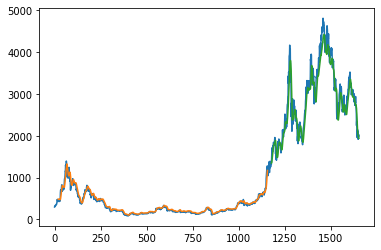

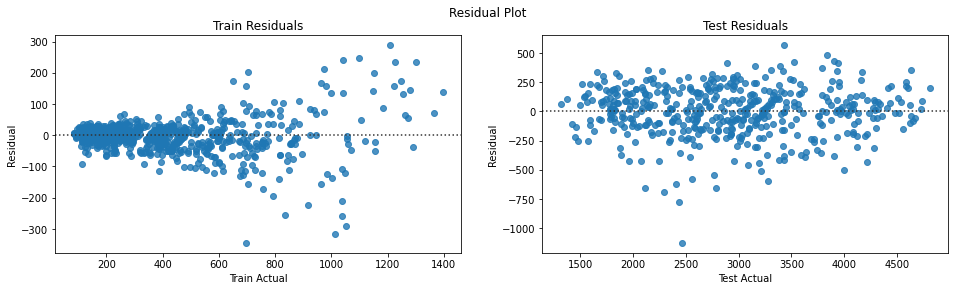

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.146058       19.591004       4.627853
1  0.145944       19.425995       3.880673
2  0.130452       -3.091004       3.716489
3  0.134233        2.403992       3.422252
4  0.135572        4.351013       3.178606
5  0.127815       -6.923004       3.026983
6  0.108708      -34.692993       2.695322
7  0.136583        5.819977       1.624278
8  0.147456       21.623016       1.104522
9  0.144599       17.471008       1.314642

Test


y_test  y_test_actual  test_predict
0  0.090519     -61.129273      5.667082
1  0.169770      54.054321      4.258551
2  0.233138     146.153199      4.427089
3  0.232837     145.715820      7.667055
4  0.087067     -66.146851     12.606605
5  0.217819     123.888184     13.433028
6  0.104504     -40.804077     15.986022
7  0.088806     -63.619019     15.698997
8  0.223668     132.389038     13.145310
9  0.147315      21.418213     13.869316

RMSE Train = 25.232648150747902
RMSE Test = 143.68748987285383
MAPE Train = 2.6717663599239043
MAPE Test = 1.203625171156353
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


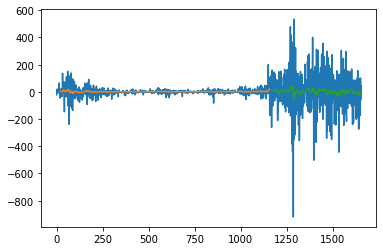

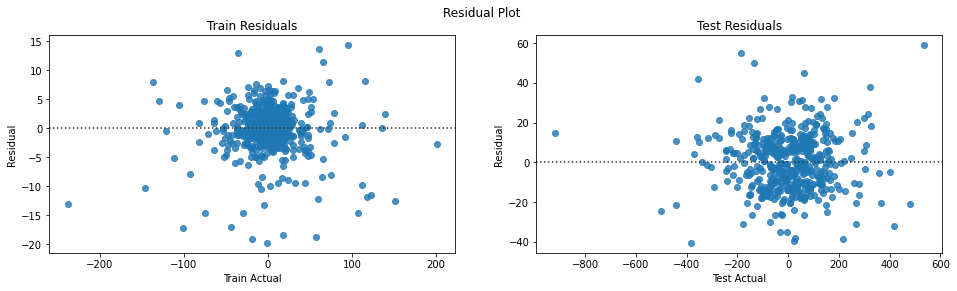

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.045824        0.045824      -0.000736
1  0.043448        0.043448      -0.001455
2 -0.006625       -0.006625      -0.001055
3  0.005187        0.005187      -0.001005
4  0.009340        0.009340      -0.001004
5 -0.014723       -0.014723      -0.000962
6 -0.074885       -0.074885      -0.001283
7  0.013579        0.013579      -0.002983
8  0.049776        0.049776      -0.003396
9  0.038311        0.038311      -0.002450

Test


y_test  y_test_actual  test_predict
0 -0.044422      -0.044422     -0.000335
1  0.041106       0.041106     -0.001272
2  0.106756       0.106756     -0.001050
3  0.096170       0.096170      0.000932
4 -0.039826      -0.039826      0.003371
5  0.077684       0.077684      0.003130
6 -0.023742      -0.023742      0.003764
7 -0.037917      -0.037917      0.002861
8  0.082014       0.082014      0.000993
9  0.012263       0.012263      0.001215

RMSE Train = 0.05090377984076845
RMSE Test = 0.0498932263377253
MAPE Train = 1.5118048976384386
MAPE Test = 1.0513716380232507
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


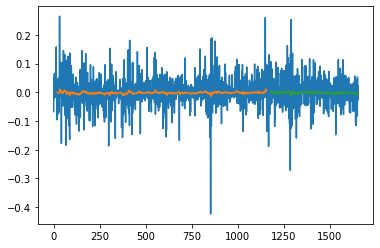

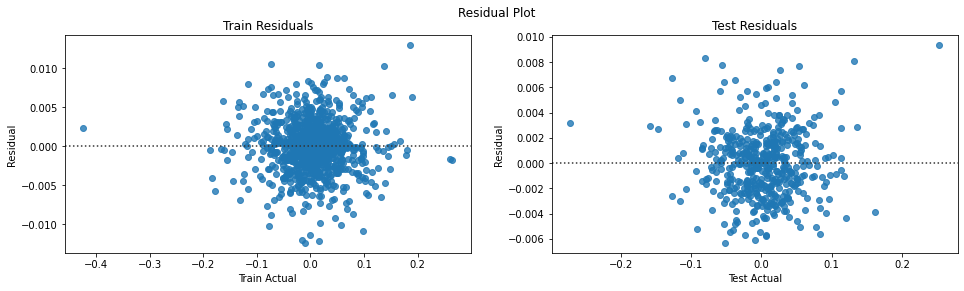

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.076739      447.114014     457.701813
1  0.080848      466.540009     456.685303
2  0.080194      463.449005     458.296539
3  0.080703      465.852997     459.742584
4  0.081623      470.204010     460.583984
5  0.080159      463.281006     461.849945
6  0.072821      428.588013     462.175781
7  0.074052      434.407990     457.121521
8  0.078625      456.031006     450.322235
9  0.082321      473.502014     447.536316

Test


y_test  y_test_actual  test_predict
0  0.260308    1314.986206   1324.417603
1  0.271741    1369.040527   1327.311523
2  0.302655    1515.193726   1331.447510
3  0.333476    1660.909546   1359.094604
4  0.319485    1594.762695   1415.315063
5  0.345689    1718.650879   1467.686401
6  0.337059    1677.846802   1523.574219
7  0.323602    1614.227783   1575.919189
8  0.351605    1746.616821   1603.902588
9  0.356135    1768.035034   1636.149292

RMSE Train = 44.89057592075915
RMSE Test = 218.1683938014368
MAPE Train = 0.061278700004047094
MAPE Test = 0.06129957387225934
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


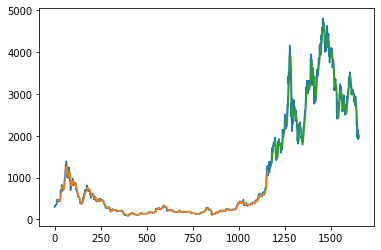

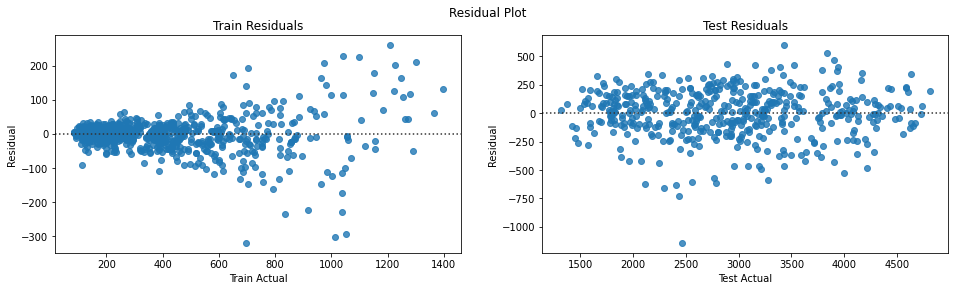

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.146058       19.591004       2.143037
1  0.145944       19.425995       2.902431
2  0.130452       -3.091004       1.460201
3  0.134233        2.403992       1.118686
4  0.135572        4.351013       1.548065
5  0.127815       -6.923004       1.273645
6  0.108708      -34.692993       0.541344
7  0.136583        5.819977      -1.561653
8  0.147456       21.623016      -1.043976
9  0.144599       17.471008      -1.078780

Test


y_test  y_test_actual  test_predict
0  0.090519     -61.129273      4.607149
1  0.169770      54.054321      2.017662
2  0.233138     146.153199      5.313179
3  0.232837     145.715820     10.386940
4  0.087067     -66.146851     17.729897
5  0.217819     123.888184     14.952207
6  0.104504     -40.804077     26.338531
7  0.088806     -63.619019     16.822886
8  0.223668     132.389038     15.060191
9  0.147315      21.418213     19.754927

RMSE Train = 25.29350728493578
RMSE Test = 144.75221899324913
MAPE Train = 2.0705432693313166
MAPE Test = 1.3295112925975023
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


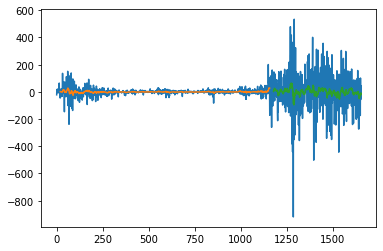

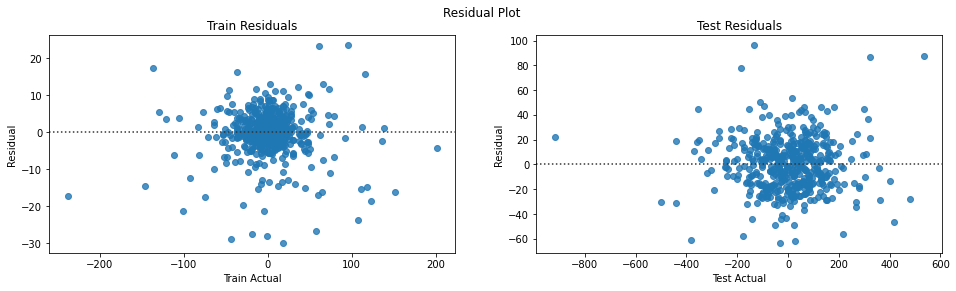

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.045824        0.045824       0.004708
1  0.043448        0.043448      -0.001984
2 -0.006625       -0.006625       0.001404
3  0.005187        0.005187       0.002873
4  0.009340        0.009340       0.001603
5 -0.014723       -0.014723       0.001705
6 -0.074885       -0.074885       0.001973
7  0.013579        0.013579       0.001178
8  0.049776        0.049776      -0.003167
9  0.038311        0.038311      -0.001407

Test


y_test  y_test_actual  test_predict
0 -0.044422      -0.044422      0.003680
1  0.041106       0.041106      0.002719
2  0.106756       0.106756     -0.000469
3  0.096170       0.096170      0.001788
4 -0.039826      -0.039826      0.006460
5  0.077684       0.077684      0.009835
6 -0.023742      -0.023742      0.004622
7 -0.037917      -0.037917      0.008632
8  0.082014       0.082014      0.004919
9  0.012263       0.012263      0.001469

RMSE Train = 0.05064859382721507
RMSE Test = 0.04967573647786863
MAPE Train = 1.4882061169137255
MAPE Test = 1.1015888540750656
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


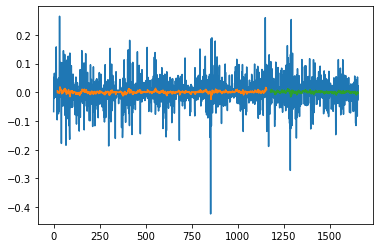

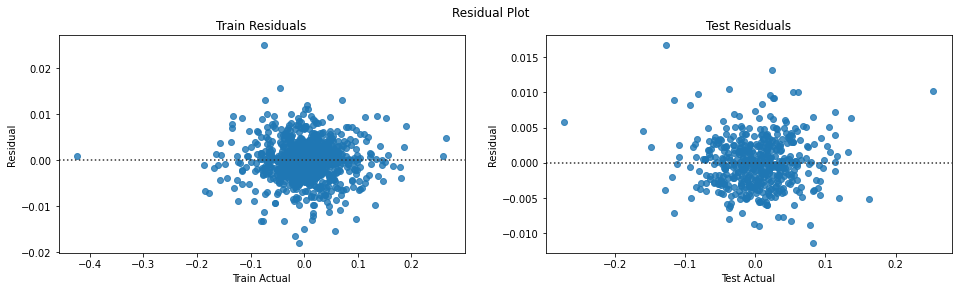

----------------------------


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   36.782684   
1           LSTM       3.0             Change in Close Price   25.946437   
2           LSTM       3.0  Percentage Change in Close Price    0.050812   
3   Stacked LSTM       3.0                             Close   44.299485   
4   Stacked LSTM       3.0             Change in Close Price   25.278860   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050912   
6       CNN-LSTM       3.0                             Close   32.459728   
7       CNN-LSTM       3.0             Change in Close Price   25.273986   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050886   
9           LSTM       5.0                             Close   42.501238   
10          LSTM       5.0             Change in Close Price   25.360748   
11          LSTM       5.0  Percentage Change in Close Price    0.050928   
12  Stacked LSTM       5.0                             Close   44.900452   
13  Stacked LSTM       5.0             Change in Close Price   25.320905   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050919   
15      CNN-LSTM       5.0                             Close   42.056733   
16      CNN-LSTM       5.0             Change in Close Price   25.705853   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050842   
18          LSTM      10.0                             Close   45.639604   
19          LSTM      10.0             Change in Close Price   25.967325   
20          LSTM      10.0  Percentage Change in Close Price    0.050941   
21  Stacked LSTM      10.0                             Close   50.501728   
22  Stacked LSTM      10.0             Change in Close Price   25.345591   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.053115   
24      CNN-LSTM      10.0                             Close   47.014638   
25      CNN-LSTM      10.0             Change in Close Price   28.528132   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051012   
27          LSTM      20.0                             Close   48.112157   
28          LSTM      20.0             Change in Close Price   25.289263   
29          LSTM      20.0  Percentage Change in Close Price    0.050722   
30  Stacked LSTM      20.0                             Close   50.458589   
31  Stacked LSTM      20.0             Change in Close Price   25.232648   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050904   
33      CNN-LSTM      20.0                             Close   44.890576   
34      CNN-LSTM      20.0             Change in Close Price   25.293507   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050649   

     rmse_test  mape_train  mape_test  
0   209.518671    0.053866   0.056631  
1   143.763998    8.473202   1.325717  
2     0.050898    1.592016   1.132648  
3   227.362449    0.086305   0.064811  
4   142.734854    3.574198   1.182992  
5     0.051100    1.610262   1.154530  
6   247.489891    0.045770   0.064773  
7   144.978738    2.601071   1.274973  
8     0.050976    1.724209   1.188668  
9   214.907497    0.061655   0.059544  
10  144.123031    2.116346   1.276927  
11    0.050956    1.516814   1.040987  
12  240.201218    0.061132   0.068191  
13  143.129380    2.796976   1.152159  
14    0.050925    2.015833   1.237432  
15  205.715589    0.057547   0.057843  
16  143.560613    5.614297   1.254181  
17    0.051104    1.668033   1.094543  
18  238.575838    0.066779   0.065902  
19  143.627018    8.621506   1.325483  
20    0.050777    1.263113   1.033319  
21  280.802634    0.074440   0.077493  
22  142.806153    3.170129   1.122054  
23    0.052869    3.948710   1.652994  
24  238.971691    0.065679   0.066336  
25  144.698574   18.064120   1.510026  
26    0.050828    1.326413   1.032276  
27  236.935871    0.065437   0.066652  
28  143.550608    2.830174   1.172815 

Total execution time (mins) =  10.765425185362497


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   36.782684   
15      CNN-LSTM       5.0                             Close   42.056733   
9           LSTM       5.0                             Close   42.501238   
33      CNN-LSTM      20.0                             Close   44.890576   
6       CNN-LSTM       3.0                             Close   32.459728   
3   Stacked LSTM       3.0                             Close   44.299485   
18          LSTM      10.0                             Close   45.639604   
24      CNN-LSTM      10.0                             Close   47.014638   
27          LSTM      20.0                             Close   48.112157   
12  Stacked LSTM       5.0                             Close   44.900452   
30  Stacked LSTM      20.0                             Close   50.458589   
21  Stacked LSTM      10.0                             Close   50.501728   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051012   
20          LSTM      10.0  Percentage Change in Close Price    0.050941   
11          LSTM       5.0  Percentage Change in Close Price    0.050928   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050904   
29          LSTM      20.0  Percentage Change in Close Price    0.050722   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050842   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050649   
22  Stacked LSTM      10.0             Change in Close Price   25.345591   
2           LSTM       3.0  Percentage Change in Close Price    0.050812   
13  Stacked LSTM       5.0             Change in Close Price   25.320905   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050912   
28          LSTM      20.0             Change in Close Price   25.289263   
4   Stacked LSTM       3.0             Change in Close Price   25.278860   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050886   
31  Stacked LSTM      20.0             Change in Close Price   25.232648   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050919   
16      CNN-LSTM       5.0             Change in Close Price   25.705853   
7       CNN-LSTM       3.0             Change in Close Price   25.273986   
10          LSTM       5.0             Change in Close Price   25.360748   
19          LSTM      10.0             Change in Close Price   25.967325   
1           LSTM       3.0             Change in Close Price   25.946437   
34      CNN-LSTM      20.0             Change in Close Price   25.293507   
25      CNN-LSTM      10.0             Change in Close Price   28.528132   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.053115   

     rmse_test  mape_train  mape_test  
0   209.518671    0.053866   0.056631  
15  205.715589    0.057547   0.057843  
9   214.907497    0.061655   0.059544  
33  218.168394    0.061279   0.061300  
6   247.489891    0.045770   0.064773  
3   227.362449    0.086305   0.064811  
18  238.575838    0.066779   0.065902  
24  238.971691    0.065679   0.066336  
27  236.935871    0.065437   0.066652  
12  240.201218    0.061132   0.068191  
30  251.437001    0.104229   0.069294  
21  280.802634    0.074440   0.077493  
26    0.050828    1.326413   1.032276  
20    0.050777    1.263113   1.033319  
11    0.050956    1.516814   1.040987  
32    0.049893    1.511805   1.051372  
29    0.049773    1.553835   1.073331  
17    0.051104    1.668033   1.094543  
35    0.049676    1.488206   1.101589  
22  142.806153    3.170129   1.122054  
2     0.050898    1.592016   1.132648  
13  143.129380    2.796976   1.152159  
5     0.051100    1.610262   1.154530  
28  143.550608    2.830174   1.172815  
4   142.734854    3.574198   1.182992  
8     0.050976    1.724209   1.188668  
31  143.687490    2.671766   1.203625  
14    0.050925    2.015833   1.237432  
16  143.560613    5.614297   1.254181 

In [609]:
import time

start=time.time()

ibm = IntervalBasedModel(df_close, df_deltaClose, df_deltaPctClose)
ibm.execute_all_intervals()

end=time.time()
total_execution_time = end-start
print("Total execution time (mins) = ", total_execution_time/60)

metrics_df = ibm.get_metrics_df()

metrics_df.sort_values(by=['mape_test'], ascending=True)

## Evaluate Models

In [610]:
metrics_df.sort_values(by=['mape_test'], ascending=True)

model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   36.782684   
15      CNN-LSTM       5.0                             Close   42.056733   
9           LSTM       5.0                             Close   42.501238   
33      CNN-LSTM      20.0                             Close   44.890576   
6       CNN-LSTM       3.0                             Close   32.459728   
3   Stacked LSTM       3.0                             Close   44.299485   
18          LSTM      10.0                             Close   45.639604   
24      CNN-LSTM      10.0                             Close   47.014638   
27          LSTM      20.0                             Close   48.112157   
12  Stacked LSTM       5.0                             Close   44.900452   
30  Stacked LSTM      20.0                             Close   50.458589   
21  Stacked LSTM      10.0                             Close   50.501728   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051012   
20          LSTM      10.0  Percentage Change in Close Price    0.050941   
11          LSTM       5.0  Percentage Change in Close Price    0.050928   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050904   
29          LSTM      20.0  Percentage Change in Close Price    0.050722   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050842   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050649   
22  Stacked LSTM      10.0             Change in Close Price   25.345591   
2           LSTM       3.0  Percentage Change in Close Price    0.050812   
13  Stacked LSTM       5.0             Change in Close Price   25.320905   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050912   
28          LSTM      20.0             Change in Close Price   25.289263   
4   Stacked LSTM       3.0             Change in Close Price   25.278860   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050886   
31  Stacked LSTM      20.0             Change in Close Price   25.232648   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050919   
16      CNN-LSTM       5.0             Change in Close Price   25.705853   
7       CNN-LSTM       3.0             Change in Close Price   25.273986   
10          LSTM       5.0             Change in Close Price   25.360748   
19          LSTM      10.0             Change in Close Price   25.967325   
1           LSTM       3.0             Change in Close Price   25.946437   
34      CNN-LSTM      20.0             Change in Close Price   25.293507   
25      CNN-LSTM      10.0             Change in Close Price   28.528132   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.053115   

     rmse_test  mape_train  mape_test  
0   209.518671    0.053866   0.056631  
15  205.715589    0.057547   0.057843  
9   214.907497    0.061655   0.059544  
33  218.168394    0.061279   0.061300  
6   247.489891    0.045770   0.064773  
3   227.362449    0.086305   0.064811  
18  238.575838    0.066779   0.065902  
24  238.971691    0.065679   0.066336  
27  236.935871    0.065437   0.066652  
12  240.201218    0.061132   0.068191  
30  251.437001    0.104229   0.069294  
21  280.802634    0.074440   0.077493  
26    0.050828    1.326413   1.032276  
20    0.050777    1.263113   1.033319  
11    0.050956    1.516814   1.040987  
32    0.049893    1.511805   1.051372  
29    0.049773    1.553835   1.073331  
17    0.051104    1.668033   1.094543  
35    0.049676    1.488206   1.101589  
22  142.806153    3.170129   1.122054  
2     0.050898    1.592016   1.132648  
13  143.129380    2.796976   1.152159  
5     0.051100    1.610262   1.154530  
28  143.550608    2.830174   1.172815  
4   142.734854    3.574198   1.182992  
8     0.050976    1.724209   1.188668  
31  143.687490    2.671766   1.203625  
14    0.050925    2.015833   1.237432  
16  143.560613    5.614297   1.254181 

### Evaluate By MAPE and RMSE

In [611]:
metrics_df.sort_values(by=['mape_test'], ascending=True)

model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   36.782684   
15      CNN-LSTM       5.0                             Close   42.056733   
9           LSTM       5.0                             Close   42.501238   
33      CNN-LSTM      20.0                             Close   44.890576   
6       CNN-LSTM       3.0                             Close   32.459728   
3   Stacked LSTM       3.0                             Close   44.299485   
18          LSTM      10.0                             Close   45.639604   
24      CNN-LSTM      10.0                             Close   47.014638   
27          LSTM      20.0                             Close   48.112157   
12  Stacked LSTM       5.0                             Close   44.900452   
30  Stacked LSTM      20.0                             Close   50.458589   
21  Stacked LSTM      10.0                             Close   50.501728   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051012   
20          LSTM      10.0  Percentage Change in Close Price    0.050941   
11          LSTM       5.0  Percentage Change in Close Price    0.050928   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050904   
29          LSTM      20.0  Percentage Change in Close Price    0.050722   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050842   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050649   
22  Stacked LSTM      10.0             Change in Close Price   25.345591   
2           LSTM       3.0  Percentage Change in Close Price    0.050812   
13  Stacked LSTM       5.0             Change in Close Price   25.320905   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050912   
28          LSTM      20.0             Change in Close Price   25.289263   
4   Stacked LSTM       3.0             Change in Close Price   25.278860   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050886   
31  Stacked LSTM      20.0             Change in Close Price   25.232648   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050919   
16      CNN-LSTM       5.0             Change in Close Price   25.705853   
7       CNN-LSTM       3.0             Change in Close Price   25.273986   
10          LSTM       5.0             Change in Close Price   25.360748   
19          LSTM      10.0             Change in Close Price   25.967325   
1           LSTM       3.0             Change in Close Price   25.946437   
34      CNN-LSTM      20.0             Change in Close Price   25.293507   
25      CNN-LSTM      10.0             Change in Close Price   28.528132   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.053115   

     rmse_test  mape_train  mape_test  
0   209.518671    0.053866   0.056631  
15  205.715589    0.057547   0.057843  
9   214.907497    0.061655   0.059544  
33  218.168394    0.061279   0.061300  
6   247.489891    0.045770   0.064773  
3   227.362449    0.086305   0.064811  
18  238.575838    0.066779   0.065902  
24  238.971691    0.065679   0.066336  
27  236.935871    0.065437   0.066652  
12  240.201218    0.061132   0.068191  
30  251.437001    0.104229   0.069294  
21  280.802634    0.074440   0.077493  
26    0.050828    1.326413   1.032276  
20    0.050777    1.263113   1.033319  
11    0.050956    1.516814   1.040987  
32    0.049893    1.511805   1.051372  
29    0.049773    1.553835   1.073331  
17    0.051104    1.668033   1.094543  
35    0.049676    1.488206   1.101589  
22  142.806153    3.170129   1.122054  
2     0.050898    1.592016   1.132648  
13  143.129380    2.796976   1.152159  
5     0.051100    1.610262   1.154530  
28  143.550608    2.830174   1.172815  
4   142.734854    3.574198   1.182992  
8     0.050976    1.724209   1.188668  
31  143.687490    2.671766   1.203625  
14    0.050925    2.015833   1.237432  
16  143.560613    5.614297   1.254181 

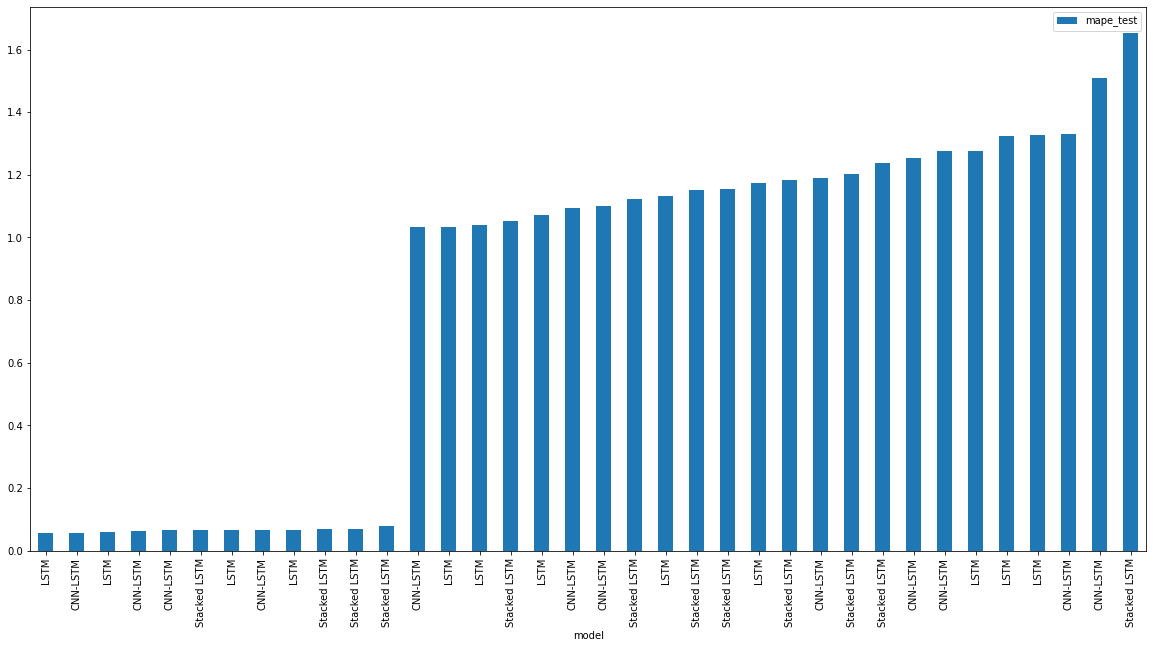

In [612]:
metrics_df.sort_values(by=['mape_test'], ascending=True).plot.bar(x='model', y='mape_test', figsize=(20,10))
plt.show()

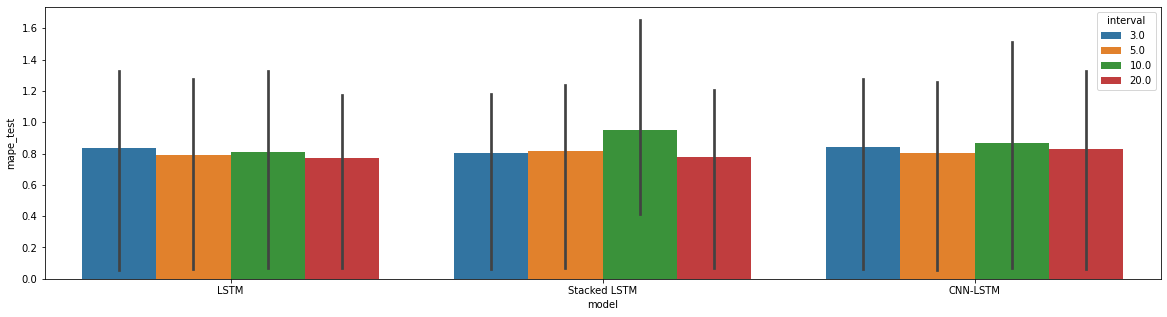

In [613]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="model", y="mape_test", hue="interval", data=metrics_df)
plt.show()

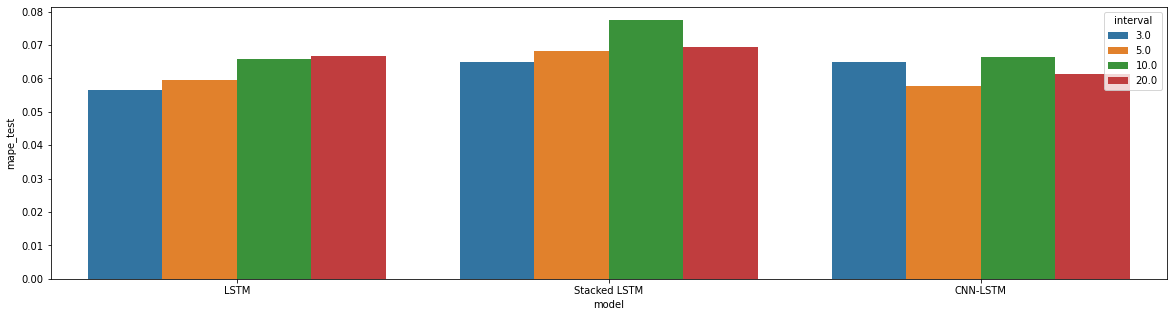

In [614]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="model", y="mape_test", hue="interval", data=metrics_df[metrics_df.target=="Close"])
plt.show()

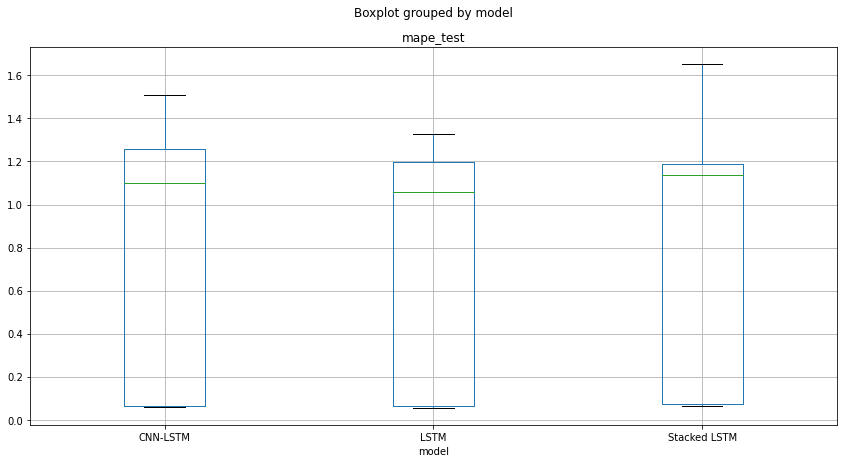

In [615]:
metrics_df.boxplot(column=['mape_test'], by='model', figsize=(14, 7))
plt.show()

In [638]:
metrics_df.groupby(by='model')['mape_test'].agg(['mean', 'min', 'max'])

mean       min       max
model                                     
CNN-LSTM      0.836335  0.057843  1.510026
LSTM          0.802496  0.056631  1.325717
Stacked LSTM  0.836412  0.064811  1.652994

In [617]:
metrics_df.groupby(by='model')['mape_test'].agg('mean')

model
CNN-LSTM        0.836335
LSTM            0.802496
Stacked LSTM    0.836412
Name: mape_test, dtype: float64

In [618]:
for model in ['LSTM', 'Stacked LSTM', 'CNN-LSTM']:
  print(f"Best Performing {model} model")
  df = metrics_df[metrics_df.model == model].sort_values(by=['mape_test'], ascending=True)
  display(df)

Best Performing LSTM model


model  interval                            target  rmse_train   rmse_test  \
0   LSTM       3.0                             Close   36.782684  209.518671   
9   LSTM       5.0                             Close   42.501238  214.907497   
18  LSTM      10.0                             Close   45.639604  238.575838   
27  LSTM      20.0                             Close   48.112157  236.935871   
20  LSTM      10.0  Percentage Change in Close Price    0.050941    0.050777   
11  LSTM       5.0  Percentage Change in Close Price    0.050928    0.050956   
29  LSTM      20.0  Percentage Change in Close Price    0.050722    0.049773   
2   LSTM       3.0  Percentage Change in Close Price    0.050812    0.050898   
28  LSTM      20.0             Change in Close Price   25.289263  143.550608   
10  LSTM       5.0             Change in Close Price   25.360748  144.123031   
19  LSTM      10.0             Change in Close Price   25.967325  143.627018   
1   LSTM       3.0             Change in Close Price   25.946437  143.763998   

    mape_train  mape_test  
0     0.053866   0.056631  
9     0.061655   0.059544  
18    0.066779   0.065902  
27    0.065437   0.066652  
20    1.263113   1.033319  
11    1.516814   1.040987  
29    1.553835   1.073331  
2     1.592016   1.132648  
28    2.830174   1.172815  
10    2.116346   1.276927  
19    8.621506   1.325483  
1     8.473202   1.325717

Best Performing Stacked LSTM model


model  interval                            target  rmse_train  \
3   Stacked LSTM       3.0                             Close   44.299485   
12  Stacked LSTM       5.0                             Close   44.900452   
30  Stacked LSTM      20.0                             Close   50.458589   
21  Stacked LSTM      10.0                             Close   50.501728   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050904   
22  Stacked LSTM      10.0             Change in Close Price   25.345591   
13  Stacked LSTM       5.0             Change in Close Price   25.320905   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050912   
4   Stacked LSTM       3.0             Change in Close Price   25.278860   
31  Stacked LSTM      20.0             Change in Close Price   25.232648   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050919   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.053115   

     rmse_test  mape_train  mape_test  
3   227.362449    0.086305   0.064811  
12  240.201218    0.061132   0.068191  
30  251.437001    0.104229   0.069294  
21  280.802634    0.074440   0.077493  
32    0.049893    1.511805   1.051372  
22  142.806153    3.170129   1.122054  
13  143.129380    2.796976   1.152159  
5     0.051100    1.610262   1.154530  
4   142.734854    3.574198   1.182992  
31  143.687490    2.671766   1.203625  
14    0.050925    2.015833   1.237432  
23    0.052869    3.948710   1.652994

Best Performing CNN-LSTM model


model  interval                            target  rmse_train  \
15  CNN-LSTM       5.0                             Close   42.056733   
33  CNN-LSTM      20.0                             Close   44.890576   
6   CNN-LSTM       3.0                             Close   32.459728   
24  CNN-LSTM      10.0                             Close   47.014638   
26  CNN-LSTM      10.0  Percentage Change in Close Price    0.051012   
17  CNN-LSTM       5.0  Percentage Change in Close Price    0.050842   
35  CNN-LSTM      20.0  Percentage Change in Close Price    0.050649   
8   CNN-LSTM       3.0  Percentage Change in Close Price    0.050886   
16  CNN-LSTM       5.0             Change in Close Price   25.705853   
7   CNN-LSTM       3.0             Change in Close Price   25.273986   
34  CNN-LSTM      20.0             Change in Close Price   25.293507   
25  CNN-LSTM      10.0             Change in Close Price   28.528132   

     rmse_test  mape_train  mape_test  
15  205.715589    0.057547   0.057843  
33  218.168394    0.061279   0.061300  
6   247.489891    0.045770   0.064773  
24  238.971691    0.065679   0.066336  
26    0.050828    1.326413   1.032276  
17    0.051104    1.668033   1.094543  
35    0.049676    1.488206   1.101589  
8     0.050976    1.724209   1.188668  
16  143.560613    5.614297   1.254181  
7   144.978738    2.601071   1.274973  
34  144.752219    2.070543   1.329511  
25  144.698574   18.064120   1.510026

[]

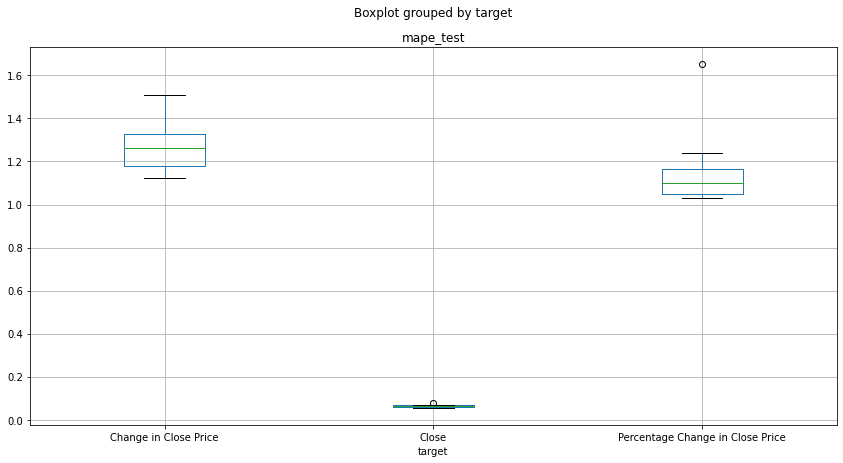

In [619]:
metrics_df.boxplot(column=['mape_test'], by='target', figsize=(14, 7))
plt.plot()

[]

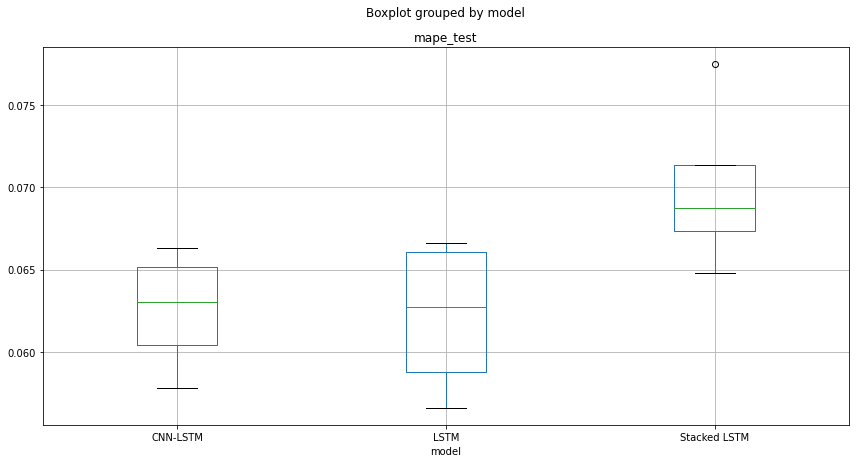

In [620]:
metrics_df[metrics_df.target == 'Close'].boxplot(column=['mape_test'], by='model', figsize=(14, 7))
plt.plot()

In [621]:
# Display best performing model on Close price
metrics_df[metrics_df.target == 'Close'].sort_values(by=['mape_test'], ascending=True)

model  interval target  rmse_train   rmse_test  mape_train  \
0           LSTM       3.0  Close   36.782684  209.518671    0.053866   
15      CNN-LSTM       5.0  Close   42.056733  205.715589    0.057547   
9           LSTM       5.0  Close   42.501238  214.907497    0.061655   
33      CNN-LSTM      20.0  Close   44.890576  218.168394    0.061279   
6       CNN-LSTM       3.0  Close   32.459728  247.489891    0.045770   
3   Stacked LSTM       3.0  Close   44.299485  227.362449    0.086305   
18          LSTM      10.0  Close   45.639604  238.575838    0.066779   
24      CNN-LSTM      10.0  Close   47.014638  238.971691    0.065679   
27          LSTM      20.0  Close   48.112157  236.935871    0.065437   
12  Stacked LSTM       5.0  Close   44.900452  240.201218    0.061132   
30  Stacked LSTM      20.0  Close   50.458589  251.437001    0.104229   
21  Stacked LSTM      10.0  Close   50.501728  280.802634    0.074440   

    mape_test  
0    0.056631  
15   0.057843  
9    0.059544  
33   0.061300  
6    0.064773  
3    0.064811  
18   0.065902  
24   0.066336  
27   0.066652  
12   0.068191  
30   0.069294  
21   0.077493

### Evaluate By Window Size

[]

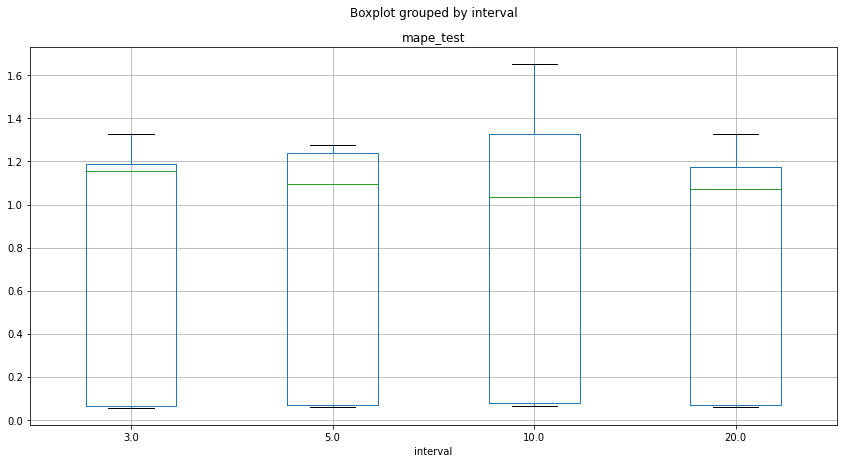

In [622]:
metrics_df.boxplot(column=['mape_test'], by='interval', figsize=(14, 7))
plt.plot()

[]

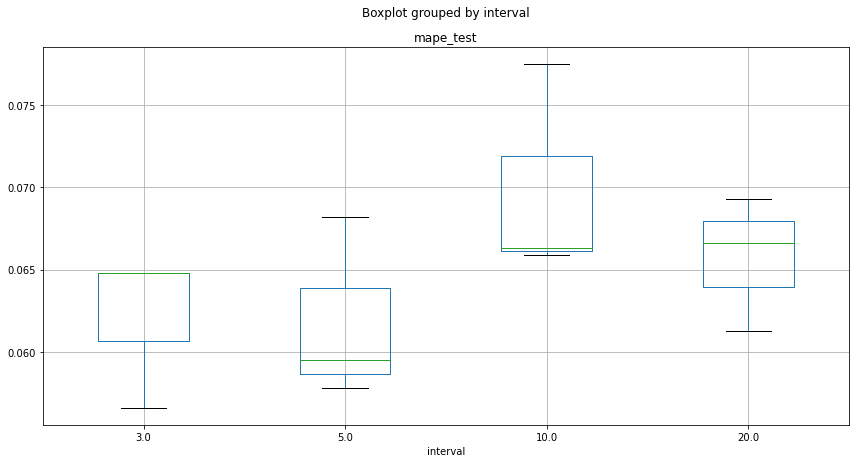

In [623]:
metrics_df[metrics_df.target=="Close"].boxplot(column=['mape_test'], by='interval', figsize=(14, 7))
plt.plot()

In [624]:
# metrics_df[metrics_df.target=="Close"]
metrics_df[metrics_df.interval=="Close"]

Empty DataFrame
Columns: [model, interval, target, rmse_train, rmse_test, mape_train, mape_test]
Index: []

In [625]:
# Display best performing model on Close price
for i in [3,5,10,20]:
  display(metrics_df[metrics_df.interval==i].sort_values(by=['mape_test'], ascending=True))

model  interval                            target  rmse_train  \
0          LSTM       3.0                             Close   36.782684   
6      CNN-LSTM       3.0                             Close   32.459728   
3  Stacked LSTM       3.0                             Close   44.299485   
2          LSTM       3.0  Percentage Change in Close Price    0.050812   
5  Stacked LSTM       3.0  Percentage Change in Close Price    0.050912   
4  Stacked LSTM       3.0             Change in Close Price   25.278860   
8      CNN-LSTM       3.0  Percentage Change in Close Price    0.050886   
7      CNN-LSTM       3.0             Change in Close Price   25.273986   
1          LSTM       3.0             Change in Close Price   25.946437   

    rmse_test  mape_train  mape_test  
0  209.518671    0.053866   0.056631  
6  247.489891    0.045770   0.064773  
3  227.362449    0.086305   0.064811  
2    0.050898    1.592016   1.132648  
5    0.051100    1.610262   1.154530  
4  142.734854    3.574198   1.182992  
8    0.050976    1.724209   1.188668  
7  144.978738    2.601071   1.274973  
1  143.763998    8.473202   1.325717

model  interval                            target  rmse_train  \
15      CNN-LSTM       5.0                             Close   42.056733   
9           LSTM       5.0                             Close   42.501238   
12  Stacked LSTM       5.0                             Close   44.900452   
11          LSTM       5.0  Percentage Change in Close Price    0.050928   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050842   
13  Stacked LSTM       5.0             Change in Close Price   25.320905   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050919   
16      CNN-LSTM       5.0             Change in Close Price   25.705853   
10          LSTM       5.0             Change in Close Price   25.360748   

     rmse_test  mape_train  mape_test  
15  205.715589    0.057547   0.057843  
9   214.907497    0.061655   0.059544  
12  240.201218    0.061132   0.068191  
11    0.050956    1.516814   1.040987  
17    0.051104    1.668033   1.094543  
13  143.129380    2.796976   1.152159  
14    0.050925    2.015833   1.237432  
16  143.560613    5.614297   1.254181  
10  144.123031    2.116346   1.276927

model  interval                            target  rmse_train  \
18          LSTM      10.0                             Close   45.639604   
24      CNN-LSTM      10.0                             Close   47.014638   
21  Stacked LSTM      10.0                             Close   50.501728   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.051012   
20          LSTM      10.0  Percentage Change in Close Price    0.050941   
22  Stacked LSTM      10.0             Change in Close Price   25.345591   
19          LSTM      10.0             Change in Close Price   25.967325   
25      CNN-LSTM      10.0             Change in Close Price   28.528132   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.053115   

     rmse_test  mape_train  mape_test  
18  238.575838    0.066779   0.065902  
24  238.971691    0.065679   0.066336  
21  280.802634    0.074440   0.077493  
26    0.050828    1.326413   1.032276  
20    0.050777    1.263113   1.033319  
22  142.806153    3.170129   1.122054  
19  143.627018    8.621506   1.325483  
25  144.698574   18.064120   1.510026  
23    0.052869    3.948710   1.652994

model  interval                            target  rmse_train  \
33      CNN-LSTM      20.0                             Close   44.890576   
27          LSTM      20.0                             Close   48.112157   
30  Stacked LSTM      20.0                             Close   50.458589   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.050904   
29          LSTM      20.0  Percentage Change in Close Price    0.050722   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050649   
28          LSTM      20.0             Change in Close Price   25.289263   
31  Stacked LSTM      20.0             Change in Close Price   25.232648   
34      CNN-LSTM      20.0             Change in Close Price   25.293507   

     rmse_test  mape_train  mape_test  
33  218.168394    0.061279   0.061300  
27  236.935871    0.065437   0.066652  
30  251.437001    0.104229   0.069294  
32    0.049893    1.511805   1.051372  
29    0.049773    1.553835   1.073331  
35    0.049676    1.488206   1.101589  
28  143.550608    2.830174   1.172815  
31  143.687490    2.671766   1.203625  
34  144.752219    2.070543   1.329511

In [626]:
metrics_df['mape_test'].mean()

0.8250812001177631

In [627]:
# metrics_df[metrics_df.interval==i].sort_values(by=['mape_test'], ascending=True)
print("Interval mean MAPE")
print(metrics_df.groupby(by='interval')['mape_test'].mean())
print("Interval min MAPE")
print(metrics_df.groupby(by='interval')['mape_test'].min())
print("Interval max MAPE")
print(metrics_df.groupby(by='interval')['mape_test'].max())

Interval mean MAPE
interval
3.0     0.827305
5.0     0.804645
10.0    0.876209
20.0    0.792165
Name: mape_test, dtype: float64
Interval min MAPE
interval
3.0     0.056631
5.0     0.057843
10.0    0.065902
20.0    0.061300
Name: mape_test, dtype: float64
Interval max MAPE
interval
3.0     1.325717
5.0     1.276927
10.0    1.652994
20.0    1.329511
Name: mape_test, dtype: float64


In [628]:
interval_group_df = metrics_df.groupby(by='interval')['mape_test'].agg(['mean', 'min', 'max'])

In [629]:
display(interval_group_df.sort_values(by='mean', ascending=True))
display(interval_group_df.sort_values(by='min', ascending=True))
display(interval_group_df.sort_values(by='max', ascending=False))

mean       min       max
interval                              
20.0      0.792165  0.061300  1.329511
5.0       0.804645  0.057843  1.276927
3.0       0.827305  0.056631  1.325717
10.0      0.876209  0.065902  1.652994

mean       min       max
interval                              
3.0       0.827305  0.056631  1.325717
5.0       0.804645  0.057843  1.276927
20.0      0.792165  0.061300  1.329511
10.0      0.876209  0.065902  1.652994

mean       min       max
interval                              
10.0      0.876209  0.065902  1.652994
20.0      0.792165  0.061300  1.329511
3.0       0.827305  0.056631  1.325717
5.0       0.804645  0.057843  1.276927

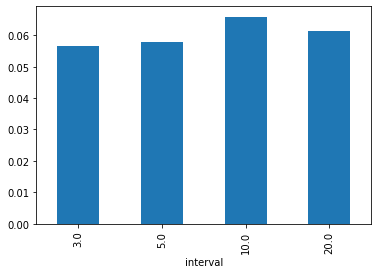

In [630]:
interval_group_df['min'].plot.bar()

mape_test    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

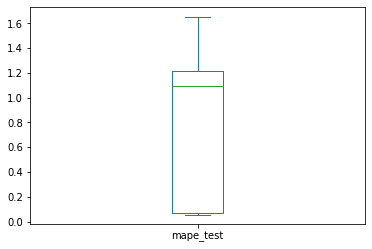

In [631]:
# metrics_df.groupby(by=['model','interval'])['mape_test'].plot.box(subplots=True)
metrics_df['mape_test'].plot.box(subplots=True)

## Best model for Close prediction

In [640]:
close_metrics_df = metrics_df[metrics_df.target=='Close']
close_metrics_df

model  interval target  rmse_train   rmse_test  mape_train  \
0           LSTM       3.0  Close   36.782684  209.518671    0.053866   
3   Stacked LSTM       3.0  Close   44.299485  227.362449    0.086305   
6       CNN-LSTM       3.0  Close   32.459728  247.489891    0.045770   
9           LSTM       5.0  Close   42.501238  214.907497    0.061655   
12  Stacked LSTM       5.0  Close   44.900452  240.201218    0.061132   
15      CNN-LSTM       5.0  Close   42.056733  205.715589    0.057547   
18          LSTM      10.0  Close   45.639604  238.575838    0.066779   
21  Stacked LSTM      10.0  Close   50.501728  280.802634    0.074440   
24      CNN-LSTM      10.0  Close   47.014638  238.971691    0.065679   
27          LSTM      20.0  Close   48.112157  236.935871    0.065437   
30  Stacked LSTM      20.0  Close   50.458589  251.437001    0.104229   
33      CNN-LSTM      20.0  Close   44.890576  218.168394    0.061279   

    mape_test  
0    0.056631  
3    0.064811  
6    0.064773  
9    0.059544  
12   0.068191  
15   0.057843  
18   0.065902  
21   0.077493  
24   0.066336  
27   0.066652  
30   0.069294  
33   0.061300

In [641]:
close_metrics_df.sort_values(by="mape_test")

model  interval target  rmse_train   rmse_test  mape_train  \
0           LSTM       3.0  Close   36.782684  209.518671    0.053866   
15      CNN-LSTM       5.0  Close   42.056733  205.715589    0.057547   
9           LSTM       5.0  Close   42.501238  214.907497    0.061655   
33      CNN-LSTM      20.0  Close   44.890576  218.168394    0.061279   
6       CNN-LSTM       3.0  Close   32.459728  247.489891    0.045770   
3   Stacked LSTM       3.0  Close   44.299485  227.362449    0.086305   
18          LSTM      10.0  Close   45.639604  238.575838    0.066779   
24      CNN-LSTM      10.0  Close   47.014638  238.971691    0.065679   
27          LSTM      20.0  Close   48.112157  236.935871    0.065437   
12  Stacked LSTM       5.0  Close   44.900452  240.201218    0.061132   
30  Stacked LSTM      20.0  Close   50.458589  251.437001    0.104229   
21  Stacked LSTM      10.0  Close   50.501728  280.802634    0.074440   

    mape_test  
0    0.056631  
15   0.057843  
9    0.059544  
33   0.061300  
6    0.064773  
3    0.064811  
18   0.065902  
24   0.066336  
27   0.066652  
12   0.068191  
30   0.069294  
21   0.077493

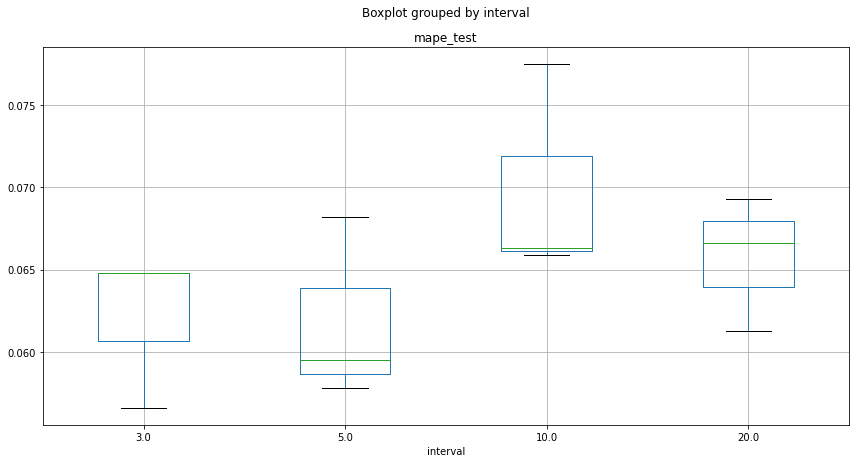

In [642]:
close_metrics_df.boxplot(column=['mape_test'], by='interval', figsize=(14, 7))

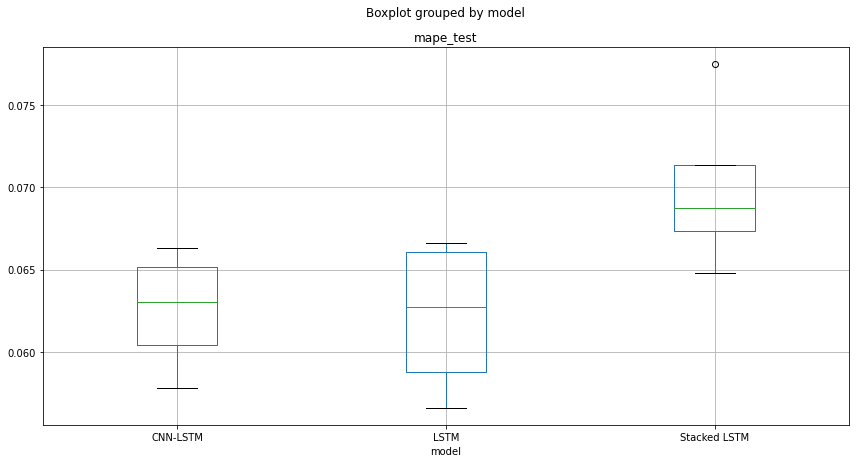

In [643]:
close_metrics_df.boxplot(column=['mape_test'], by='model', figsize=(14, 7))

## End